# PROJET MACHINE LEARNING : Global Data on Sustainable Energy


*Auteurs :*

## 1. Introduction

Les données sont issues du site du concours KAGGLE; il s'agit du jeu de données "Global Data on Sustainable Energy" (2000-2020) disponible [ici](https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy).

Le jeu de données comprend 3649 observations et 21 variables qui représentent diverses caractéristiques liées à la consommation énergétique et à la géographie de 176 pays du monde au cours des années 2000 à 2020. Les variables sont les suivantes:

- **Entity**: Nom du pays ou de la région pour lequel les données sont rapportées.
- **Year**: Année pour laquelle les données sont communiquées entre 2000 et 2020.
- **Access to electricity (% of population)**: Pourcentage de la population ayant accès à l’électricité.
- **Access to clean fuels for cooking (% of population)**: Pourcentage de la population qui utilise principalement des combustibles propres.
- **Renewable-electricity-generating-capacity-per-capita**: Capacité installée d’énergie renouvelable par personne.
- **Financial flows to developing countries (US Dollars)**: Aide et assistance des pays développés pour les projets d’énergie propre.
- **Renewable energy share in total final energy consumption (%)**: Pourcentage d’énergie renouvelable dans la consommation d’énergie finale.
- **Electricity from fossil fuels (TWh)**: Électricité produite à partir de combustibles fossiles (charbon, pétrole, gaz) en térawattheures.
- **Electricity from nuclear (TWh)**: Électricité produite à partir de l’énergie nucléaire en térawattheures.
- **Electricity from renewables (TWh)**: Électricité produite à partir de sources renouvelables (hydroélectricité, énergie solaire, énergie éolienne, etc.) en térawattheures.
- **Low-carbon electricity (% electricity)**: Pourcentage d’électricité provenant de sources à faible teneur en carbone (nucléaire et énergies renouvelables).
- **Primary energy consumption per capita (kWh/person)**: Consommation d’énergie par personne en kilowattheures.
- **Energy intensity level of primary energy (MJ/2011 PPP GDP)**: Consommation d’énergie par unité de PIB à parité de pouvoir d’achat.
- **Value-co2-emissions (metric tons per capita)**: Émissions de dioxyde de carbone par personne en tonnes métriques.
- **Renewables (% equivalent primary energy)**: Équivalent énergie primaire provenant de sources renouvelables.
- **GDP growth (annual %)**: Taux de croissance annuel du PIB en monnaie locale constante.
- **GDP per capita**: Produit intérieur brut (PIB) par personne.
- **Density (P/Km2)**: Densité de population en personnes par kilomètre carré.
- **Land Area (Km2)**: Surface terrestre totale en kilomètres carrés.
- **Latitude**: Latitude du centroïde du pays en degrés décimaux.
- **Longitude**: Longitude du centroïde du pays en degrés décimaux.

L’objectif est de prédire la variable `Value-co2-emissions` à partir des autres variables. 

In [1]:
defefefre

ERROR: Error in eval(expr, envir, enclos): objet 'defefefre' introuvable


On importe les librairies nécessaires pour ce projet : 

In [1]:
library(knitr)
library(reticulate)
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)

library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attachement du package : ‘gridExtra’


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attachement du package : ‘plotly’


L'objet suivant est masqué depuis ‘package:ggplot2’:

    last_plot


L'objet suivant est masqué depuis ‘package:stats’:

    filter


L'objet suivant est masqué depuis ‘package:graphics’:

    layout


corrplot 0.92 loaded


Attachement du package : ‘reshape2’


L'objet sui

## 2. Prise en charge des données

In [2]:
path <- ""
data <- read.table(paste(path, "global-data-on-sustainable-energy.csv", sep = ""),
                    sep = ",", header = TRUE)

In [3]:
head(data)

Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.electricity.generating.capacity.per.capita
1 9.22                                                
2 8.86                                                
3 8.47                                                
4 8.09                                                
5 7.75                                                
6 7.51                                                
  Financial.flows.to.developing.countries..US...
1    20000                                      
2   130000                                      
3  3950000                                      
4 25970000                                      
5       NA                                      
6  9830000                                      
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. ⋯
1 0.31                              ⋯
2 0.50                              ⋯
3 0.56                              ⋯
4 0.63                              ⋯
5 0.56                              ⋯
6 0.59                              ⋯
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country Renewables....equivalent.primary.energy.
1  760                              NA                                      
2  730                              NA                                      
3 1030                              NA                                      
4 1220                              NA                                      
5 1030                              NA                                      
6 1550                              NA                                      
  gdp_growth gdp_per_capita Density.n.P.Km2. La

In [4]:
str(data)

'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclear.


On convertit la variable Year en variable qualitative et on convertit Density.n.P.Km2. en variable numérique : 

In [7]:
data$Year <- as.factor(data$Year)
data$Entity = as.factor(data$Entity)

data$Density.n.P.Km2. <- as.numeric(gsub(",", ".", data$`Density.n.P.Km2.`))


On va calculer le taux de valeurs manquantes pour chaque variable : 

In [8]:
# Calculer le taux de valeurs manquantes pour chaque variable
missing_rates <- colMeans(is.na(data))

# Afficher les taux de valeurs manquantes
print(missing_rates)

                                                          Entity 
                                                    0.0000000000 
                                                            Year 
                                                    0.0000000000 
                         Access.to.electricity....of.population. 
                                                    0.0027404768 
                               Access.to.clean.fuels.for.cooking 
                                                    0.0463140586 
            Renewable.electricity.generating.capacity.per.capita 
                                                    0.2551383941 
                  Financial.flows.to.developing.countries..US... 
                                                    0.5724856125 
Renewable.energy.share.in.the.total.final.energy.consumption.... 
                                                    0.0531652508 
                             Electricity.from.fossil.fuels..TWh. 
          

On remarque que les variables Renewable-electricity-generating-capacity-per-capita, Financial flows to developing countries (US Dollars) 
et Renewables (% equivalent primary energy) ont un taux de données manquantes très important. Nous allons donc les retirer de notre jeu de données.

In [9]:
print(dim(data))

# Supprimer les variables avec un taux de données manquantes très important
                        #"Renewable-electricity-generating-capacity-per-capita",
                         #"Financial flows to developing countries (US Dollars)",
                         #"Renewables (% equivalent primary energy)")

# Supprimer les variables avec un taux de données manquantes très important
data <- data[, c("Entity", "Year", "Access.to.electricity....of.population.",
                 "Access.to.clean.fuels.for.cooking",
                 "Renewable.energy.share.in.the.total.final.energy.consumption....",
                 "Electricity.from.fossil.fuels..TWh.",
                 "Electricity.from.nuclear..TWh.",
                 "Electricity.from.renewables..TWh.",
                 "Low.carbon.electricity....electricity.",
                 "Primary.energy.consumption.per.capita..kWh.person.",
                 "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.",
                 "Value_co2_emissions_kt_by_country",
                 "gdp_growth",
                 "gdp_per_capita",
                 "Density.n.P.Km2.",
                 "Land.Area.Km2.",
                 "Latitude",
                 "Longitude")]

# Afficher les dimensions du jeu de données après suppression des variables
print(dim(data))


[1] 3649   21
[1] 3649   18


Maintenant, nous allons uniquement garder les individus complets pour la suite du projet.

In [10]:
# Créer un nouveau jeu de données avec seulement les individus complets
data <- data[complete.cases(data), ]

# Afficher les dimensions du nouveau jeu de données
print(dim(data))


[1] 2868   18


## 3. Analyse Descriptive Unidimensionnelle des Données

In [11]:
summary(data)

                 Entity          Year     
 Algeria            :  20   2014   : 147  
 Angola             :  20   2015   : 147  
 Antigua and Barbuda:  20   2016   : 146  
 Argentina          :  20   2017   : 146  
 Armenia            :  20   2018   : 146  
 Australia          :  20   2019   : 146  
 (Other)            :2748   (Other):1990  
 Access.to.electricity....of.population. Access.to.clean.fuels.for.cooking
 Min.   :  1.252                         Min.   :  0.00                   
 1st Qu.: 53.238                         1st Qu.: 22.07                   
 Median : 97.000                         Median : 81.55                   
 Mean   : 76.585                         Mean   : 62.17                   
 3rd Qu.:100.000                         3rd Qu.:100.00                   
 Max.   :100.000                         Max.   :100.00                   
                                                                          
 Renewable.energy.share.in.the.total.final.energy.consum

### 3.1 Transformation de Variables quantitatives

On représente la fréquence de chaque variable, afin de déterminer de possibles transformation de certaines variables quantitatives.

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


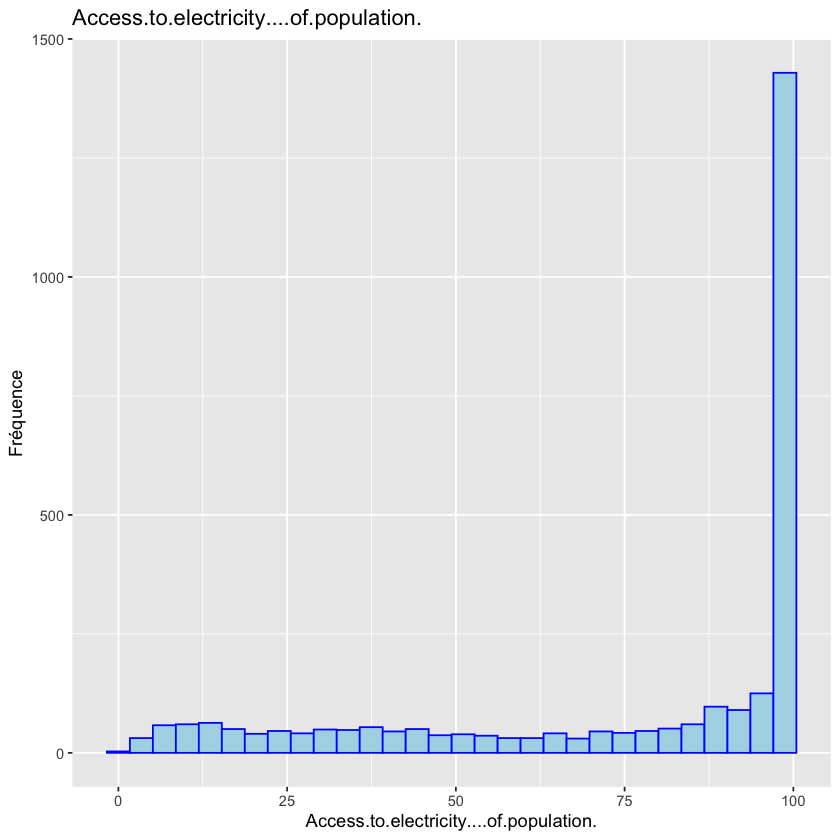

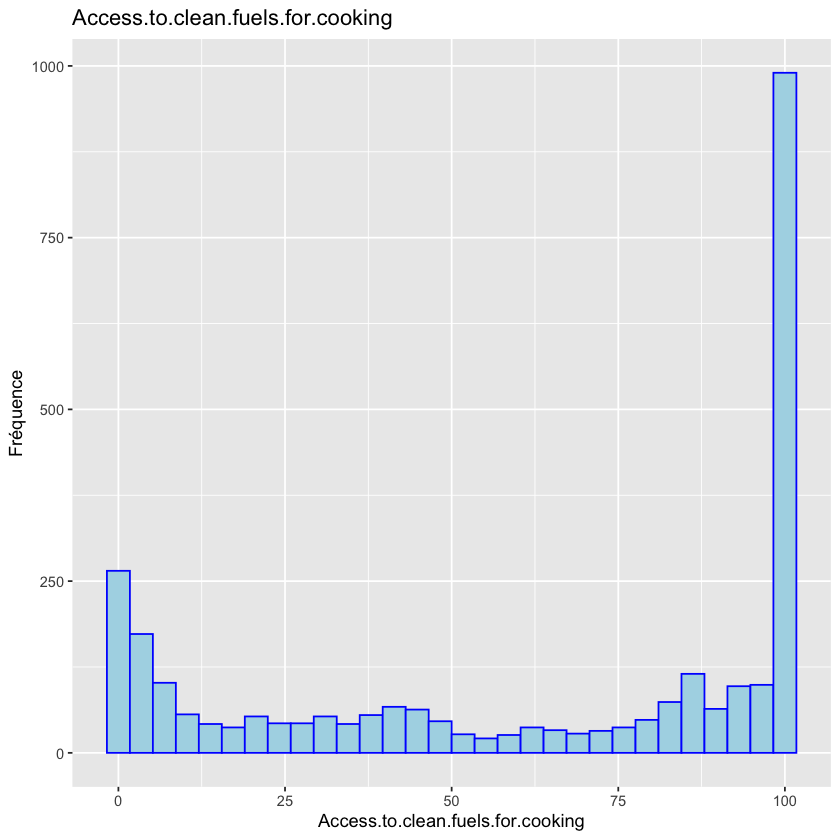

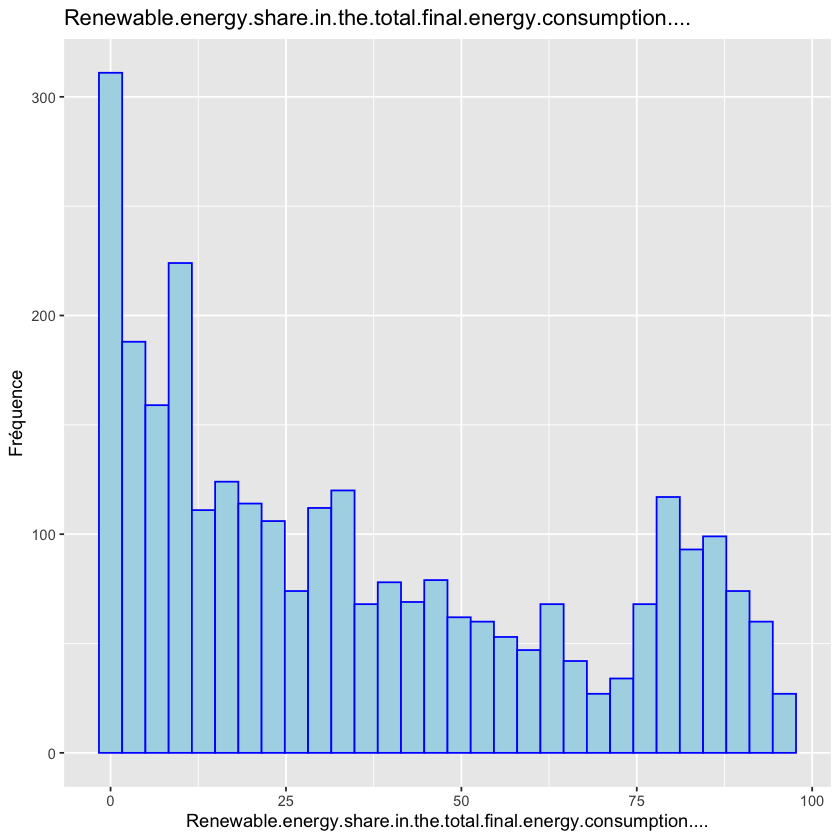

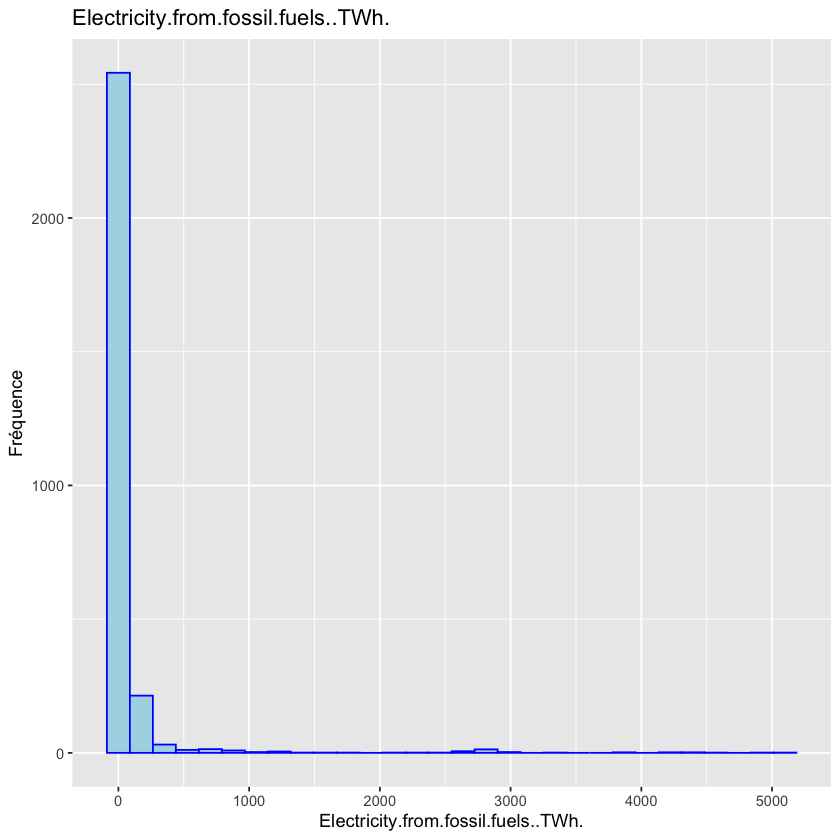

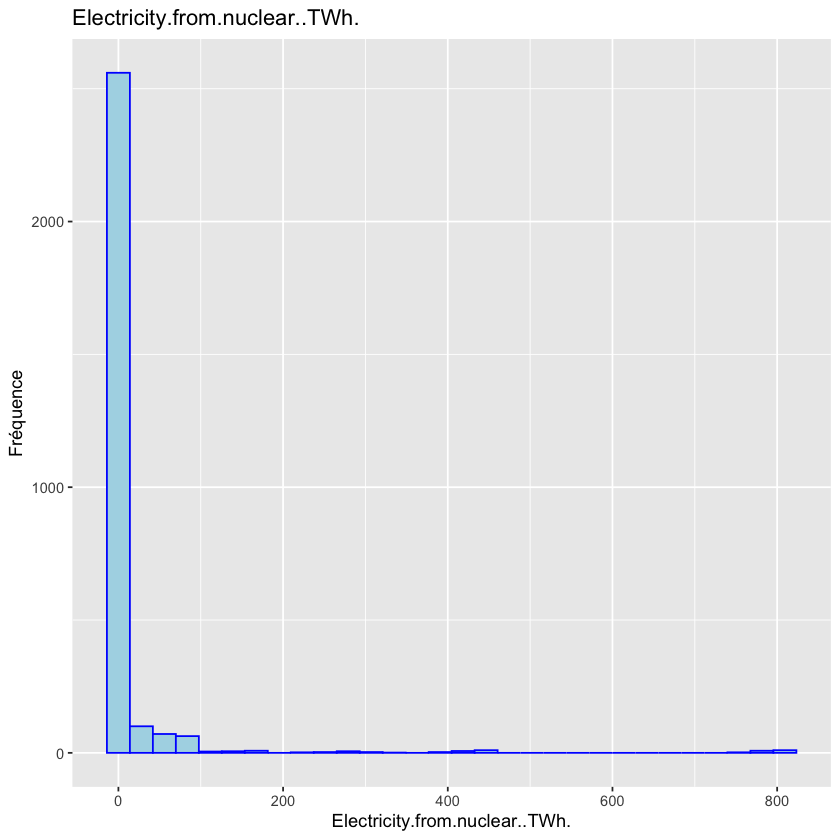

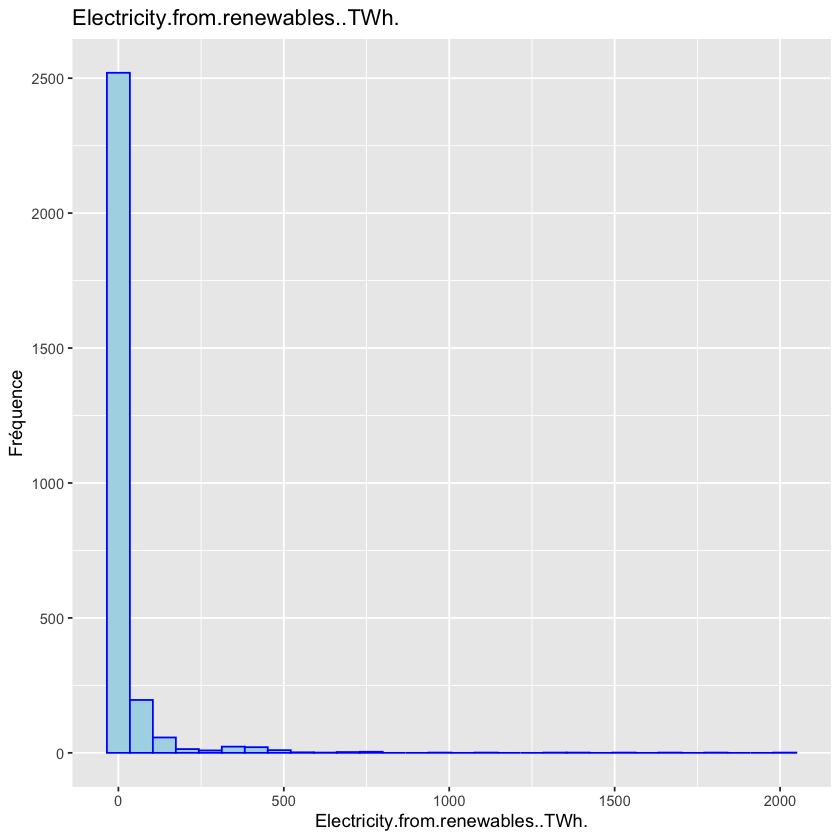

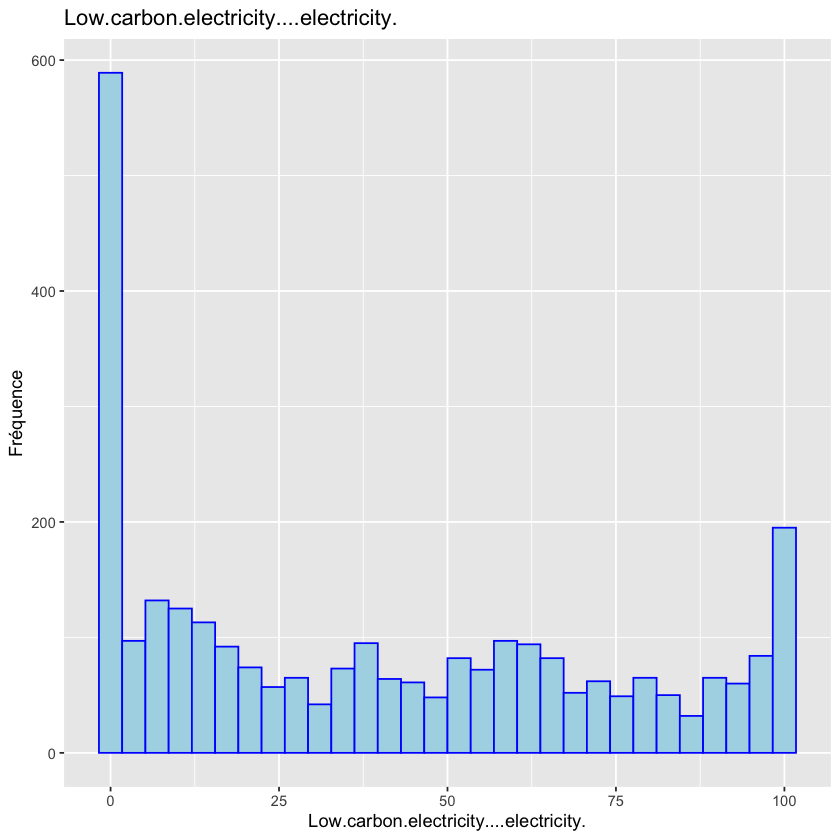

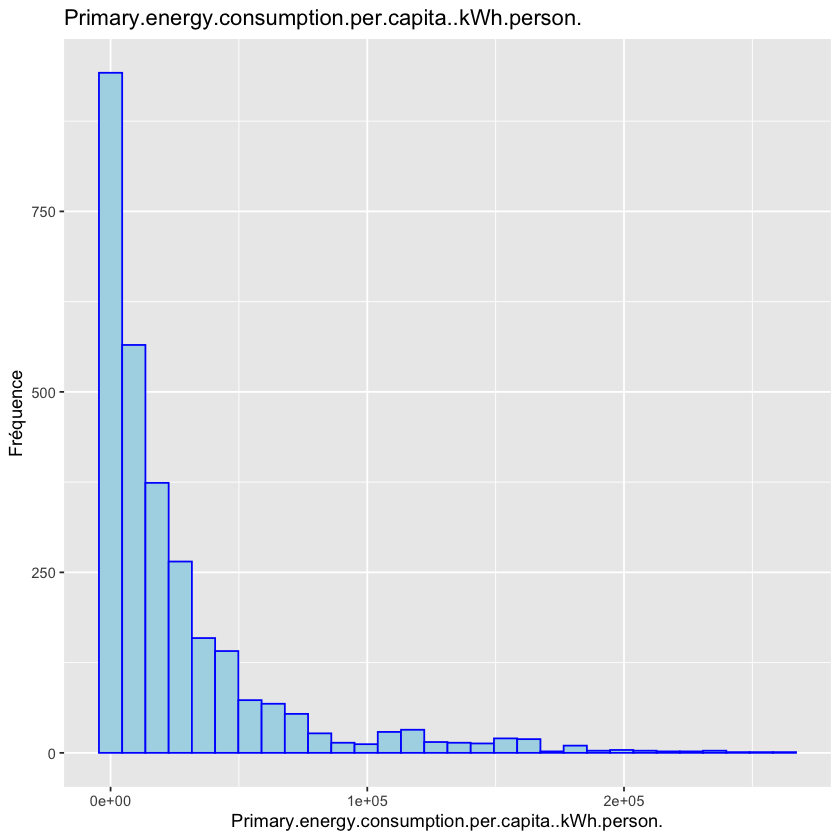

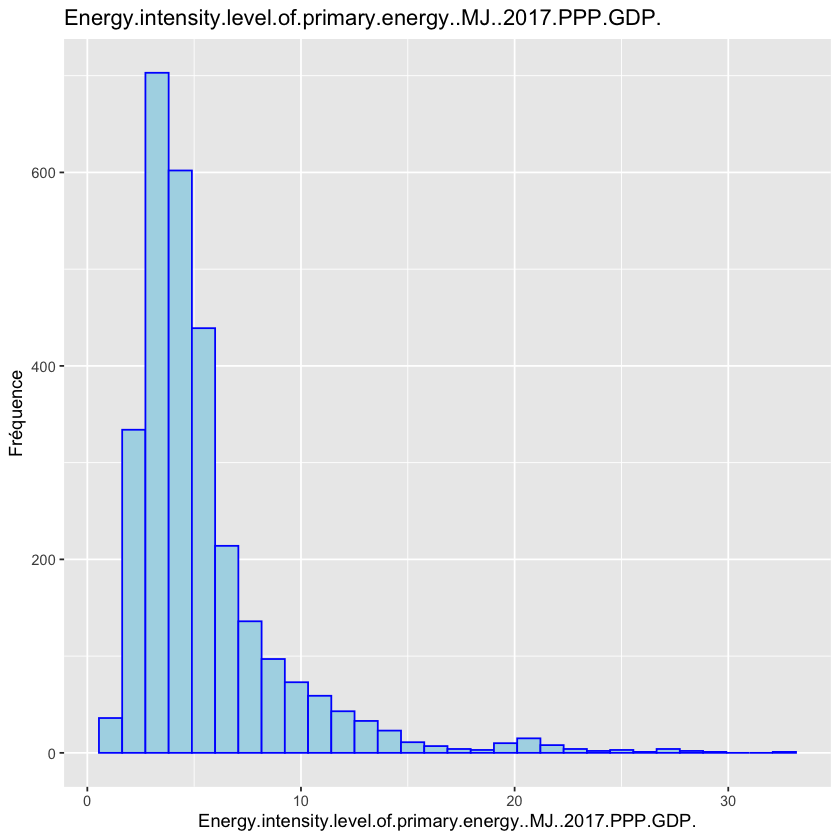

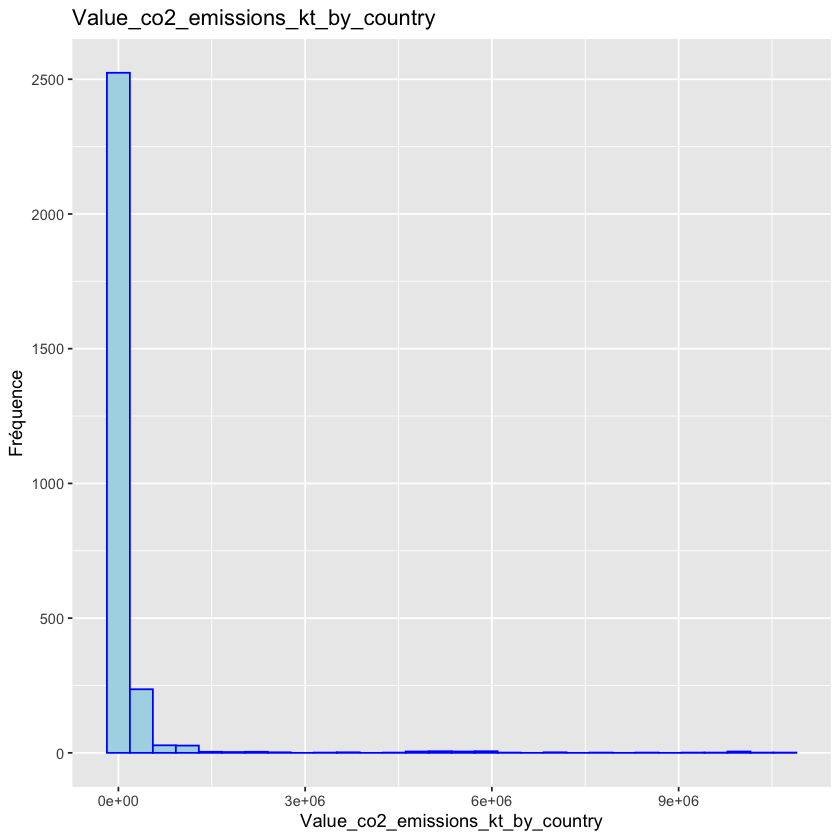

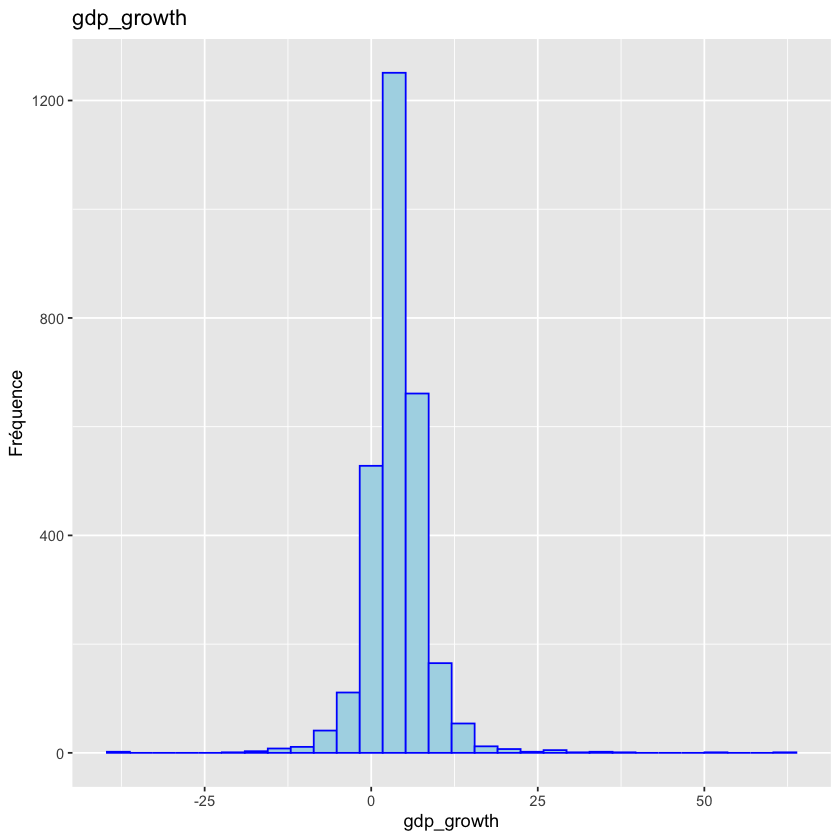

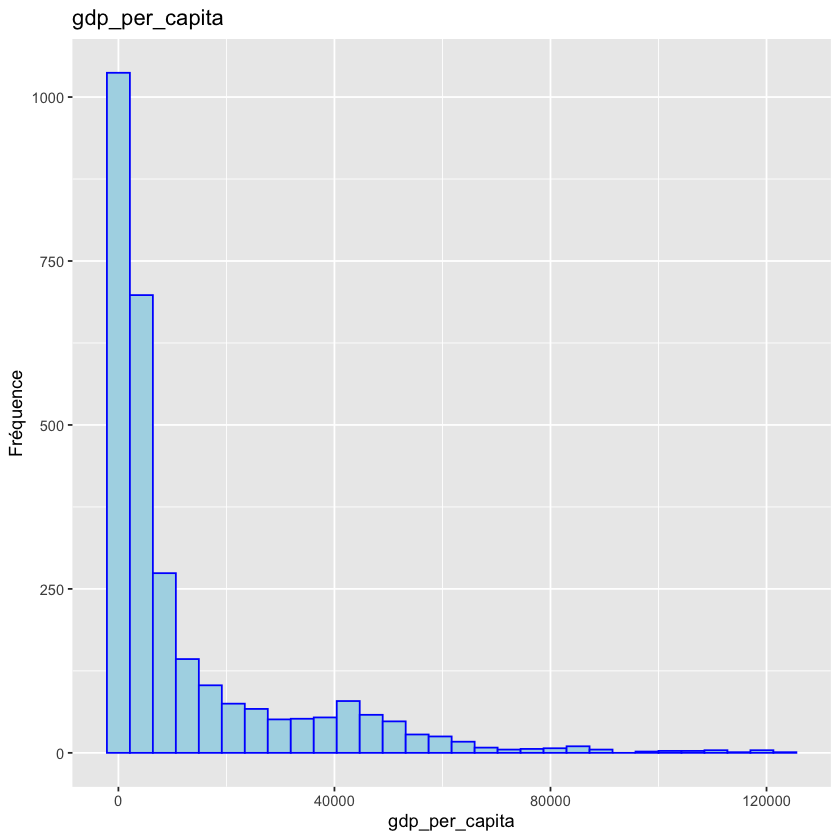

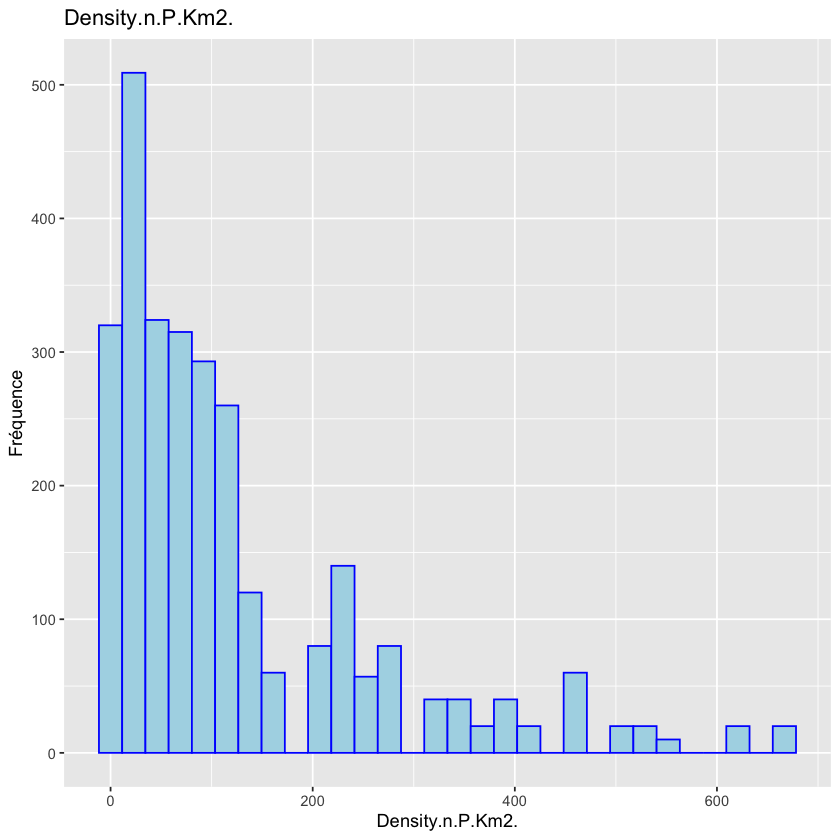

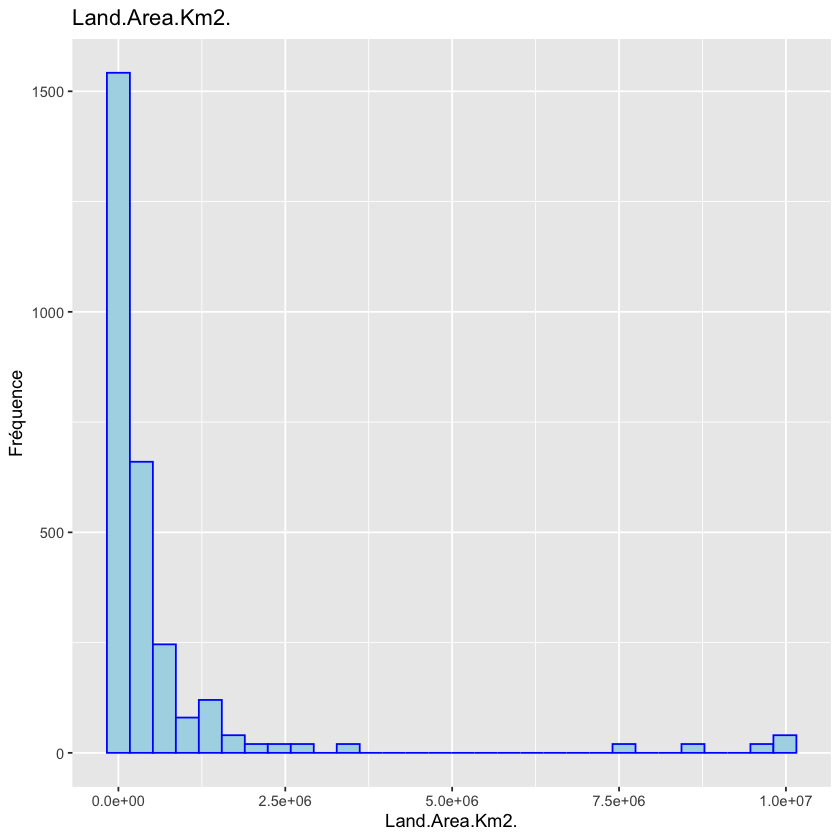

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]

[[12]]

[[13]]

[[14]]

[[15]]

[[16]]


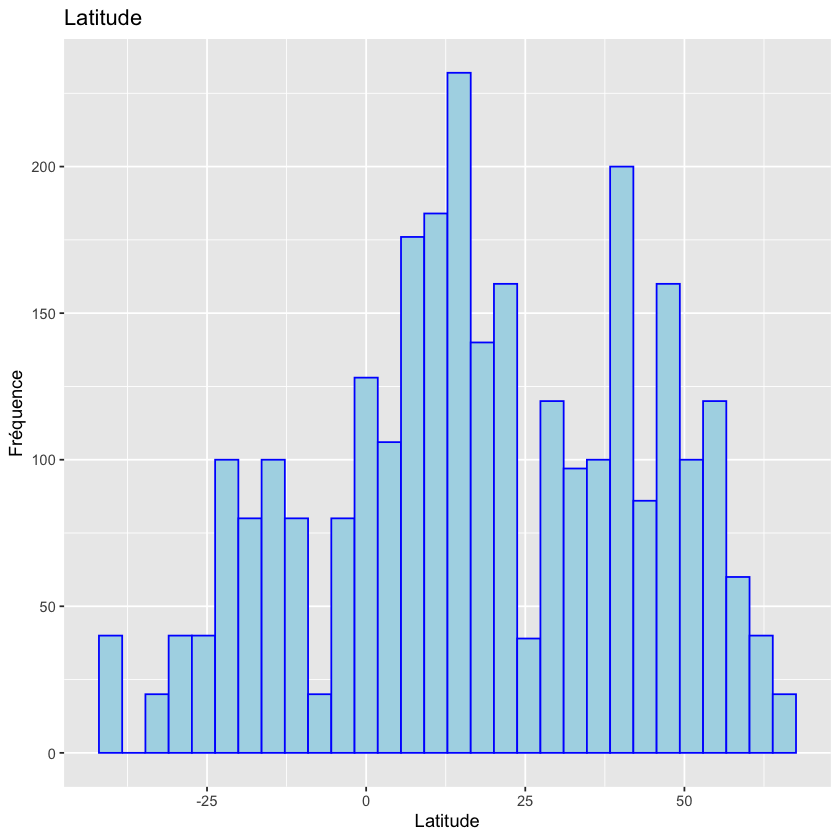

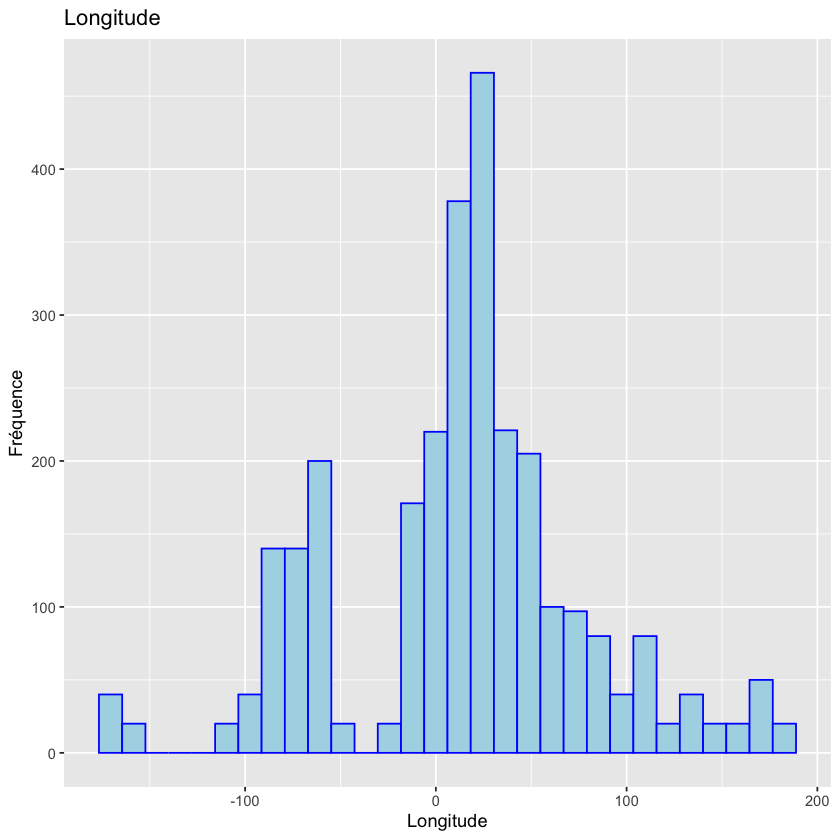

In [12]:
library(ggplot2)

# Sélectionner les variables quantitatives
variables_quantitatives <- sapply(data, is.numeric)

# Créer une liste de graphiques pour chaque variable quantitative
plots <- lapply(names(data)[variables_quantitatives], function(variable) {
  ggplot(data, aes_string(x = variable)) +
    geom_histogram(fill = "lightblue", color = "blue", bins = 30) +
    labs(title = variable, x = variable, y = "Fréquence")
})

# Afficher les graphiques
plots


On remaque que ****** donc on la transforme en *****
**A faire**

### 3.2 Hétérogénéité des émissions de CO2 entre les pays

On calcule la moyenne des émissions de CO2 pour chaque pays, ainsi on obtient : 

                      Entity Mean_CO2_Emissions
1                Afghanistan          4643.5294
2                    Algeria        119921.0001
3                     Angola         21689.4999
4        Antigua and Barbuda           513.0000
5                  Argentina        160462.0019
6                    Armenia          4776.5000
7                  Australia        375537.9991
8                    Austria         67977.4998
9                 Azerbaijan         29517.5001
10                   Bahrain         24738.9999
11                Bangladesh         50723.4999
12                  Barbados          1590.0000
13                   Belarus         56955.9998
14                   Belgium        103018.4997
15                    Belize           600.0000
16                     Benin          4343.5000
17                    Bhutan           529.0000
18    Bosnia and Herzegovina         19164.5000
19                  Botswana          4981.5000
20                    Brazil        3929

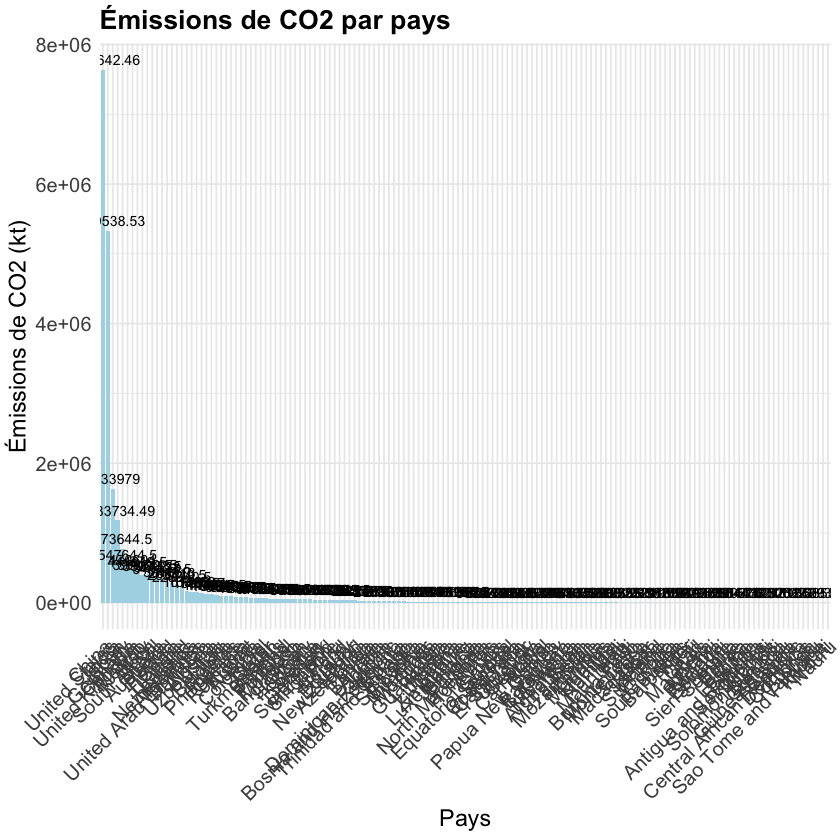

In [13]:
# Calculer la moyenne des émissions de CO2 pour chaque pays
co2_means <- aggregate(Value_co2_emissions_kt_by_country ~ Entity, data = data, FUN = mean)

# Renommer la colonne pour plus de clarté
colnames(co2_means)[2] <- "Mean_CO2_Emissions"

# Afficher les moyennes des émissions de CO2 pour chaque pays
print(co2_means)

# Trier les pays par ordre décroissant des émissions de CO2
top_5_emitters <- co2_means[order(co2_means$Mean_CO2_Emissions, decreasing = TRUE), ]

# Sélectionner les cinq premiers pays
top_5_emitters <- head(top_5_emitters, 5)

library(ggplot2)

# Créer un graphique à barres pour visualiser les émissions de CO2 par pays
ggplot(co2_means, aes(x = reorder(Entity, -Mean_CO2_Emissions), y = Mean_CO2_Emissions)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  labs(title = "Émissions de CO2 par pays",
   	x = "Pays",
   	y = "Émissions de CO2 (kt)") +
  theme_minimal() +  # Utiliser un thème minimal pour une apparence propre
  theme(axis.text.x = element_text(angle = 45, hjust = 1),  # Incliner les étiquettes de l'axe x pour une meilleure lisibilité
    	plot.title = element_text(size = 16, face = "bold"),  # Ajuster la taille et le style du titre du graphique
    	axis.title = element_text(size = 14),  # Ajuster la taille du texte des axes
    	axis.text = element_text(size = 12)) +  # Ajuster la taille du texte des étiquettes des axes
  geom_text(aes(label = round(Mean_CO2_Emissions, 2)), vjust = -0.5, size = 3)  # Ajouter les valeurs au-dessus des barres

# Tri des données par émissions de CO2 décroissantes
top_5_emitters <- co2_means[order(-co2_means$Mean_CO2_Emissions), ][1:5, ]

# Affichage des cinq premiers pays les plus émetteurs de CO2
print(top_5_emitters$Entity)



On remarque ainsi une grande hétérogéinité des émissions de CO2 entre chaque pays ; on constate notamment que les plus gros émetteurs de CO2 sont la Chine, les Etats-Unis, l'Inde, le Japon et l'Allemagne.

## 4. Analyse descriptive multidimensionnelle 

### 4.1 Nuages de points

On affiche GDP per capita en fonction de Value CO2 Emissions.

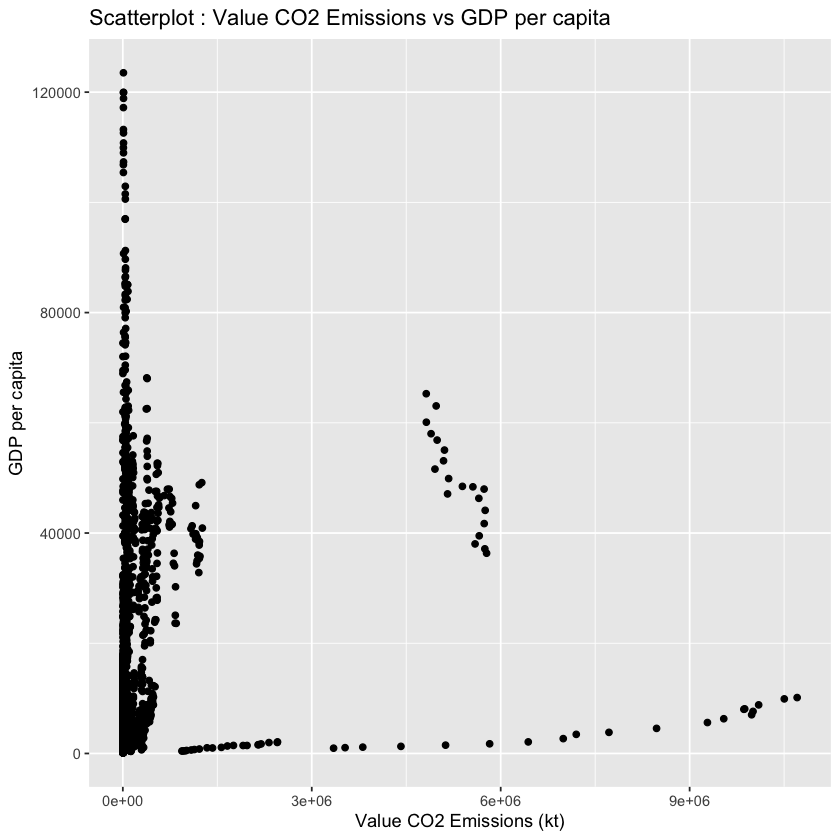

In [14]:
# Charger la bibliothèque ggplot2 pour la visualisation
library(ggplot2)

# Nuage de points entre deux variables quantitatives (par exemple, Value_co2_emissions_kt_by_country et gdp_per_capita)
ggplot(data, aes(x = Value_co2_emissions_kt_by_country, y = gdp_per_capita)) +
  geom_point() +
  labs(x = "Value CO2 Emissions (kt)", y = "GDP per capita") +
  ggtitle("Scatterplot : Value CO2 Emissions vs GDP per capita")

On a que etccc + **A faire**

### 4.2 Corrélations entre chaque variable

Etablissions la matrice de corrélation afin de déterminer corrélations entre chaque variable :

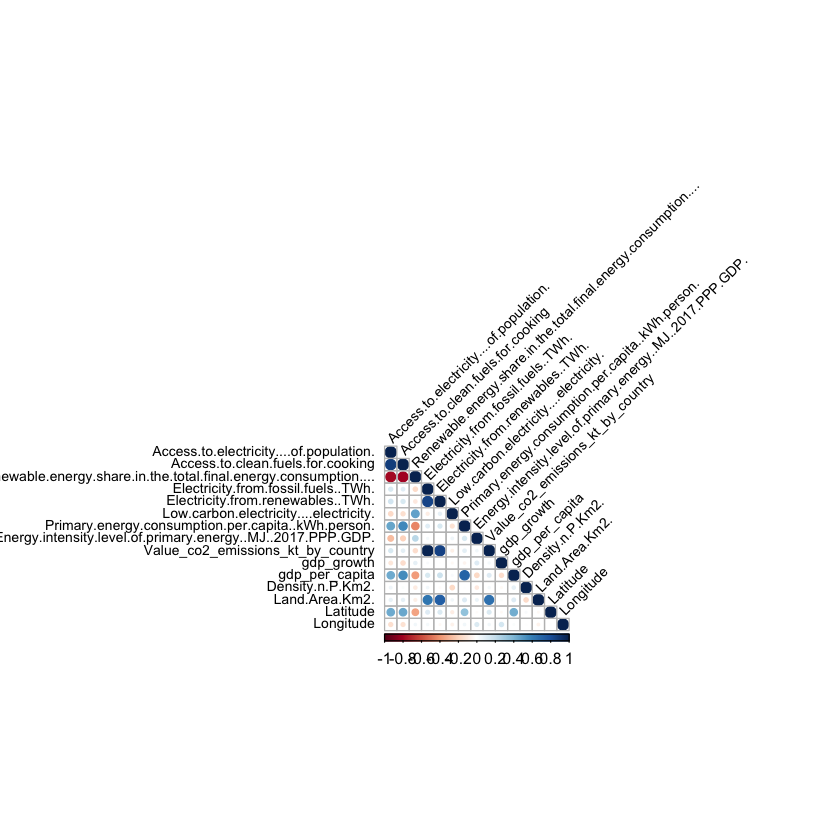

In [15]:
# Sélectionner les variables quantitatives
variables_quantitatives <- data[, c("Access.to.electricity....of.population.", "Access.to.clean.fuels.for.cooking",
                                    "Renewable.energy.share.in.the.total.final.energy.consumption....",
                                    "Electricity.from.fossil.fuels..TWh.", "Electricity.from.renewables..TWh.",
                                    "Low.carbon.electricity....electricity.",
                                    "Primary.energy.consumption.per.capita..kWh.person.",
                                    "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.",
                                    "Value_co2_emissions_kt_by_country", "gdp_growth", "gdp_per_capita",
                                    "Density.n.P.Km2.", "Land.Area.Km2.", "Latitude", "Longitude")]
library(corrplot)

# Calculer la matrice de corrélation
correlation_matrix <- cor(variables_quantitatives)

# Afficher le corrplot
# Afficher le corrplot avec une taille de texte réduite
corrplot(correlation_matrix, method = "circle", type = "lower", tl.col = "black", tl.srt = 45, tl.cex = 0.7)



On remarque que Value CO2 est très corrélée à Electricity from fossil fuel.

## 5. Analyse en compostantes principales des variables quantitatives

In [16]:
# Charger la bibliothèque ggplot2 pour la visualisation
library(ggplot2)

# Sélectionner les variables quantitatives
variables_quantitatives <- data[, c("Access.to.electricity....of.population.", "Access.to.clean.fuels.for.cooking",
                                    "Renewable.energy.share.in.the.total.final.energy.consumption....",
                                    "Electricity.from.fossil.fuels..TWh.", "Electricity.from.renewables..TWh.",
                                    "Low.carbon.electricity....electricity.",
                                    "Primary.energy.consumption.per.capita..kWh.person.",
                                    "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.",
                                    "Value_co2_emissions_kt_by_country", "gdp_growth", "gdp_per_capita",
                                    "Density.n.P.Km2.", "Land.Area.Km2.", "Latitude", "Longitude")]

# Créer toutes les combinaisons de paires de variables
combinations <- combn(names(variables_quantitatives), 2)

# Boucle pour créer les scatterplots pour chaque paire de variables
for (i in 1:ncol(combinations)) {
  var1 <- combinations[1, i]
  var2 <- combinations[2, i]
  
  # Créer le scatterplot pour la paire de variables actuelle
  plot_title <- paste("Scatterplot:", var1, "vs", var2)
  ggplot(data, aes_string(x = var1, y = var2)) +
    geom_point() +
    labs(x = var1, y = var2) +
    ggtitle(plot_title)
}


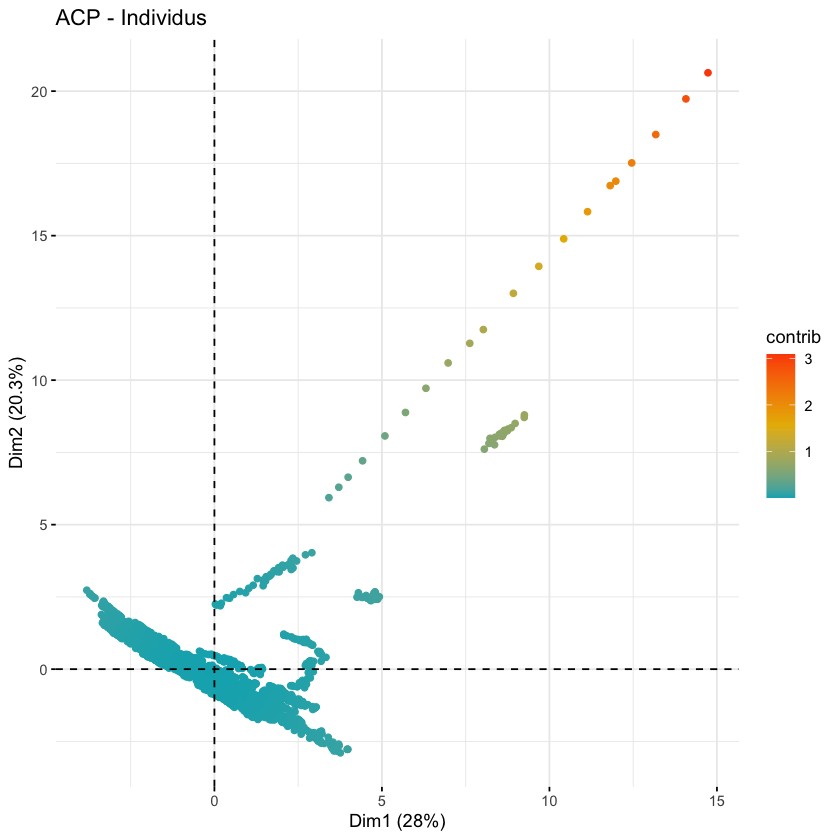

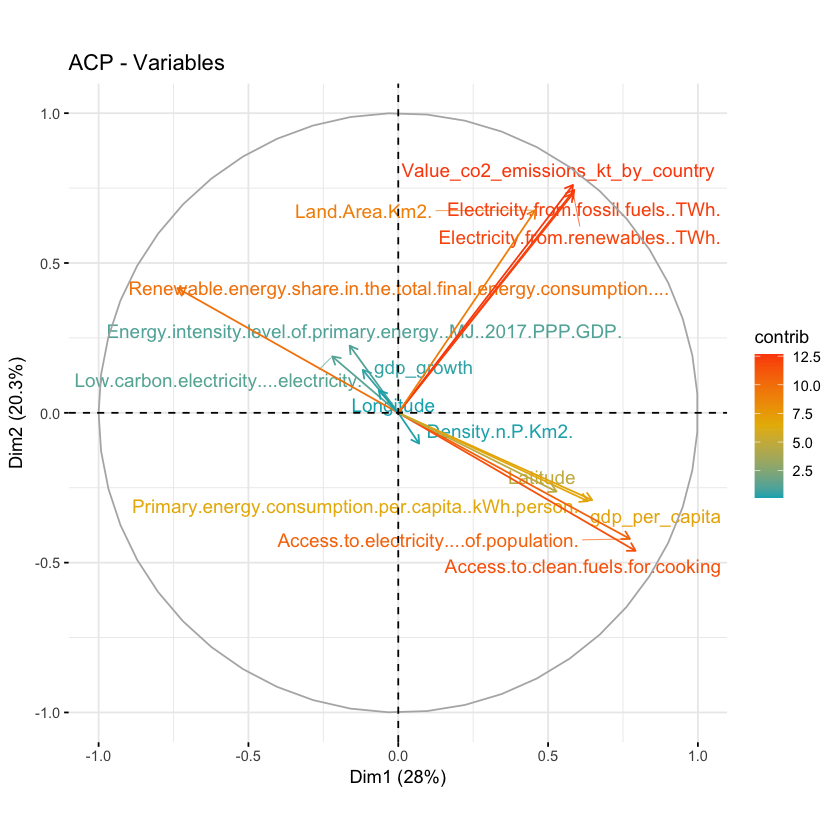

In [17]:
# Charger la librairie
library(factoextra)

# Sélectionner les variables quantitatives
variables_quantitatives <- data[, c("Access.to.electricity....of.population.", "Access.to.clean.fuels.for.cooking",
                                    "Renewable.energy.share.in.the.total.final.energy.consumption....",
                                    "Electricity.from.fossil.fuels..TWh.", "Electricity.from.renewables..TWh.",
                                    "Low.carbon.electricity....electricity.",
                                    "Primary.energy.consumption.per.capita..kWh.person.",
                                    "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.",
                                    "Value_co2_emissions_kt_by_country", "gdp_growth", "gdp_per_capita",
                                    "Density.n.P.Km2.", "Land.Area.Km2.", "Latitude", "Longitude")]

# Effectuer une ACP
acp <- prcomp(variables_quantitatives, scale = TRUE)

# Visualiser les résultats de l'ACP
fviz_pca_ind(acp, geom = "point", col.ind = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, # Pour éviter le chevauchement des noms des individus
             title = "ACP - Individus")

fviz_pca_var(acp, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, # Pour éviter le chevauchement des noms des variables
             title = "ACP - Variables")



**interprétation à faire**

## 6. Dépendance entre la variable Year et la variable à prédire

## 7. Construction des Datasets

Dans un premier temps, on génère les indices des lignes aléatoirement qui vont permettre la construction de chaque dataset. Nous allons prendre 20% des données pour le jeu de données de test et 80% pour le jeu de données d'entraînement.

Transformation des variables : 

In [18]:
data$Electricity.from.fossil.fuels..TWh. = log(data$Electricity.from.fossil.fuels..TWh. + 1)
data$Electricity.from.nuclear..TWh. = log(data$Electricity.from.nuclear..TWh. + 1)
data$Renewable.energy.share.in.the.total.final.energy.consumption.... = log(data$Renewable.energy.share.in.the.total.final.energy.consumption.... +1)
data$Low.carbon.electricity....electricity. = sqrt(data$Low.carbon.electricity....electricity. + 1)
data$Primary.energy.consumption.per.capita..kWh.person.	 = log(data$Primary.energy.consumption.per.capita..kWh.person. + 1)
data$Value_co2_emissions_kt_by_country = log(data$Value_co2_emissions_kt_by_country + 1)
data$Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. = log(data$Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. + 1)
data$gdp_per_capita = log(data$gdp_per_capita + 1)
data$Density.n.P.Km2. = log(data$Density.n.P.Km2. +  1)
data$Land.Area.Km2. = log(data$Land.Area.Km2. + 1)


On centre et réduit les données : 

In [19]:
# Charger la bibliothèque caret
library(caret)

# Sélectionner les colonnes numériques à centrer et réduire
numeric_cols <- sapply(data, is.numeric)

# Centrer et réduire les variables numériques
data[numeric_cols] <- scale(data[numeric_cols])

# Afficher les premières lignes du dataframe avec les variables centrées et réduites
head(data)


Le chargement a nécessité le package : lattice


Attachement du package : ‘caret’


L'objet suivant est masqué depuis ‘package:purrr’:

    lift




Entity      Year Access.to.electricity....of.population.
4 Afghanistan 2003 -1.962723                              
5 Afghanistan 2004 -1.793684                              
6 Afghanistan 2005 -1.624663                              
7 Afghanistan 2006 -1.455582                              
8 Afghanistan 2007 -1.286358                              
9 Afghanistan 2008 -1.084869                              
  Access.to.clean.fuels.for.cooking
4 -1.342305                        
5 -1.306625                        
6 -1.273495                        
7 -1.231444                        
8 -1.194491                        
9 -1.158812                        
  Renewable.energy.share.in.the.total.final.energy.consumption....
4 0.45446875                                                      
5 0.59568684                                                      
6 0.39541589                                                      
7 0.35017809                                                      
8 0.27368565                                                      
9 0.04643991                                                      
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
4 -0.8965837                          -0.4113497                    
5 -0.8885075                          -0.4113497                    
6 -0.8845148                          -0.4113497                    
7 -0.9433322                          -0.4113497                    
8 -0.9433322                          -0.4113497                    
9 -0.9477926                          -0.4113497                    
  Electricity.from.renewables..TWh. Low.carbon.electricity....electricity.
4 -0.2412979                        0.8586610                             
5 -0.2419482                        0.7786180                             
6 -0.2416695                        0.7888996                             
7 -0.2412050                        1.0293612                             
8 -0.2401831                        1.0786767                             
9 -0.2421340                        0.9890449                             
  Primary.energy.consumption.per.capita..kWh.person.
4 -2.257312                                         
5 -2.329154                                         
6 -2.201742                                         
7 -2.087403                                         
8 -1.995449                                         
9 -1.667905                                         
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
4 -2.032894                                                  
5 -2.234494                                                  
6 -2.023260                                                  
7 -1.938312                                                  
8 -1.910674                                                  
9 -1.562692                                                  
  Value_co2_emissions_kt_by_country gdp_growth   gdp_per_capita
4 -0.9326814                         1.062712614 -1.961378     
5 -1.0036459                        -0.534097141 -1.896534     
6 -0.8323107                         1.578777364 -1.811287     
7 -0.7790345                         0.314722045 -1.757197     
8 -0.7766587                         2.137714332 -1.561600     
9 -0.4835987                         0.006383943 -1.552945     
  Density.n.P.Km2. Land.Area.Km2. Latitude  Longitude
4 -0.03475675      0.7885953      0.6338505 0.8359896
5 -0.03475675      0.7885953      0.6338505 0.8359896
6 -0.03475675      0.7885953      0.6338505 0.8359896
7 -0.03475675      0.7885953      0.6338505 0.8359896
8 -0.03475675      0.7885953      0.6338505 0.8359896
9 -0.03475675      0.7885953      0.6338505 0.8359896

In [20]:
head(data)

Entity      Year Access.to.electricity....of.population.
4 Afghanistan 2003 -1.962723                              
5 Afghanistan 2004 -1.793684                              
6 Afghanistan 2005 -1.624663                              
7 Afghanistan 2006 -1.455582                              
8 Afghanistan 2007 -1.286358                              
9 Afghanistan 2008 -1.084869                              
  Access.to.clean.fuels.for.cooking
4 -1.342305                        
5 -1.306625                        
6 -1.273495                        
7 -1.231444                        
8 -1.194491                        
9 -1.158812                        
  Renewable.energy.share.in.the.total.final.energy.consumption....
4 0.45446875                                                      
5 0.59568684                                                      
6 0.39541589                                                      
7 0.35017809                                                      
8 0.27368565                                                      
9 0.04643991                                                      
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
4 -0.8965837                          -0.4113497                    
5 -0.8885075                          -0.4113497                    
6 -0.8845148                          -0.4113497                    
7 -0.9433322                          -0.4113497                    
8 -0.9433322                          -0.4113497                    
9 -0.9477926                          -0.4113497                    
  Electricity.from.renewables..TWh. Low.carbon.electricity....electricity.
4 -0.2412979                        0.8586610                             
5 -0.2419482                        0.7786180                             
6 -0.2416695                        0.7888996                             
7 -0.2412050                        1.0293612                             
8 -0.2401831                        1.0786767                             
9 -0.2421340                        0.9890449                             
  Primary.energy.consumption.per.capita..kWh.person.
4 -2.257312                                         
5 -2.329154                                         
6 -2.201742                                         
7 -2.087403                                         
8 -1.995449                                         
9 -1.667905                                         
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
4 -2.032894                                                  
5 -2.234494                                                  
6 -2.023260                                                  
7 -1.938312                                                  
8 -1.910674                                                  
9 -1.562692                                                  
  Value_co2_emissions_kt_by_country gdp_growth   gdp_per_capita
4 -0.9326814                         1.062712614 -1.961378     
5 -1.0036459                        -0.534097141 -1.896534     
6 -0.8323107                         1.578777364 -1.811287     
7 -0.7790345                         0.314722045 -1.757197     
8 -0.7766587                         2.137714332 -1.561600     
9 -0.4835987                         0.006383943 -1.552945     
  Density.n.P.Km2. Land.Area.Km2. Latitude  Longitude
4 -0.03475675      0.7885953      0.6338505 0.8359896
5 -0.03475675      0.7885953      0.6338505 0.8359896
6 -0.03475675      0.7885953      0.6338505 0.8359896
7 -0.03475675      0.7885953      0.6338505 0.8359896
8 -0.03475675      0.7885953      0.6338505 0.8359896
9 -0.03475675      0.7885953      0.6338505 0.8359896

In [21]:
##GENERE LES INDICES DES LIGNES ALEATOIREMENT POUR CHAQUE DATASET

set.seed(132) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(data) # nombre de lignes dans les données
nvar <- ncol(data) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 


In [22]:
##CONSTRUIT LES DATASET À PARTIR DES INDICES PRECEDENTS

# construction de l'échantillon d'apprentissage
datappr <- data[appri,-19] 
# construction de l'échantillon test
datestr <- data[testi,-19]  #-19 pour prendre toutes les colonnes (toutes les variables) (prend tous sauf la colonne 19)
# vérification
str(datappr)
str(datestr)
#summary(datappr) 


#data1=datappr[,-1]
#head(data1)


'data.frame':	2294 obs. of  18 variables:
 $ Entity                                                          : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 5 6 7 8 11 12 14 15 16 17 ...
 $ Access.to.electricity....of.population.                         : num  -1.79 -1.62 -1.46 -1.29 -1.08 ...
 $ Access.to.clean.fuels.for.cooking                               : num  -1.31 -1.27 -1.23 -1.19 -1.07 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  0.596 0.395 0.35 0.274 -0.198 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  -0.889 -0.885 -0.943 -0.943 -0.948 ...
 $ Electricity.from.nuclear..TWh.                                  : num  -0.411 -0.411 -0.411 -0.411 -0.411 ...
 $ Electricity.from.renewables..TWh.                               : num  -0.242 -0.242 -0.241 -0.24 -0.24 ...
 $ Low.carbon.electricity...

In [23]:
datappr1 <- datappr[, !(names(datappr) %in% c("Entity", "Electricity.from.fossil.fuels..TWh."))]


datestr1 <- datestr[, !(names(datappr) %in% c("Entity", "Electricity.from.fossil.fuels..TWh."))]




In [24]:
##FONCTION POUR TRACER LE GRAPHE DES RESIDUS
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+xlim(0, 250)+ylim(-150, 150)+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}


## 8. Prévision par modèle linéaire Gaussien

### 8.1 Sans sélection de variable

Pour cela, on va utiliser un modèle ANCOVA en prenant comme variable cible Value_co2_emissions_kt_by_country. Avec ce modèle on obtient le graphe des résidus suivant : 

In [25]:
#datappr1 <- datappr[, !(names(datappr) %in% c("Entity", "Electricity.from.fossil.fuels..TWh.","Year"))]


#datestr1 <- datestr[, !(names(datappr) %in% c("Entity", "Electricity.from.fossil.fuels..TWh.","Year"))]




In [26]:
library(ggplot2)


# Créer une formule pour inclure toutes les variables explicatives sauf CO2
formula <- as.formula(paste("Value_co2_emissions_kt_by_country ~ ."))

# Effectuer l'ANCOVA
ancova_model <- lm(Value_co2_emissions_kt_by_country ~ ., data = datappr1)


# Afficher un résumé du modèle
#summary(ancova_model)





coef(ancova_model)

(Intercept) 
                                                     0.014706917 
                                                        Year2001 
                                                    -0.013564573 
                                                        Year2002 
                                                    -0.026811886 
                                                        Year2003 
                                                    -0.035685935 
                                                        Year2004 
                                                    -0.023214986 
                                                        Year2005 
                                                    -0.030387507 
                                                        Year2006 
                                                    -0.043777214 
                                                        Year2007 
                                                    -0.032171412 
                                                        Year2008 
                                                    -0.044111491 
                                                        Year2009 
                                                    -0.021173480 
                                                        Year2010 
                                                    -0.026962456 
                                                        Year2011 
                                                     0.006069387 
                                                        Year2012 
                                                    -0.021432534 
                                                        Year2013 
                                                    -0.013384246 
                                                        Year2014 
                                                     0.005146113 
                                                        Year2015 
                                                     0.006486058 
                                                        Year2016 
                                                     0.005548968 
                                                        Year2017 
                                                     0.010710820 
                                                        Year2018 
                                                     0.008038288 
                                                        Year2019 
                                                    -0.016786247 
                         Access.to.electricity....of.population. 
                                                     0.156087835 
                               Access.to.clean.fuels.for.cooking 
                                                    -0.061179724 
Renewable.energy.share.in.the.total.final.energy.consumption.... 
                                                    -0.155609937 
                                  Electricity.from.nuclear..TWh. 
                                                     0.088170047 
                               Electricity.from.renewables..TWh. 
                                                     0.037406558 
                          Low.carbon.electricity....electricity. 
                                                    -0.079884546 
              Primary.energy.consumption.per.capita..kWh.person. 
                                                     0.361046412 
     Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
                                                    -0.060238319 
                                                      gdp_growth 
                                                     0.010959942 
                                                  gdp_per_capita 
                                                     0.059790625 
                                                Density.n.P.Km2. 
                           

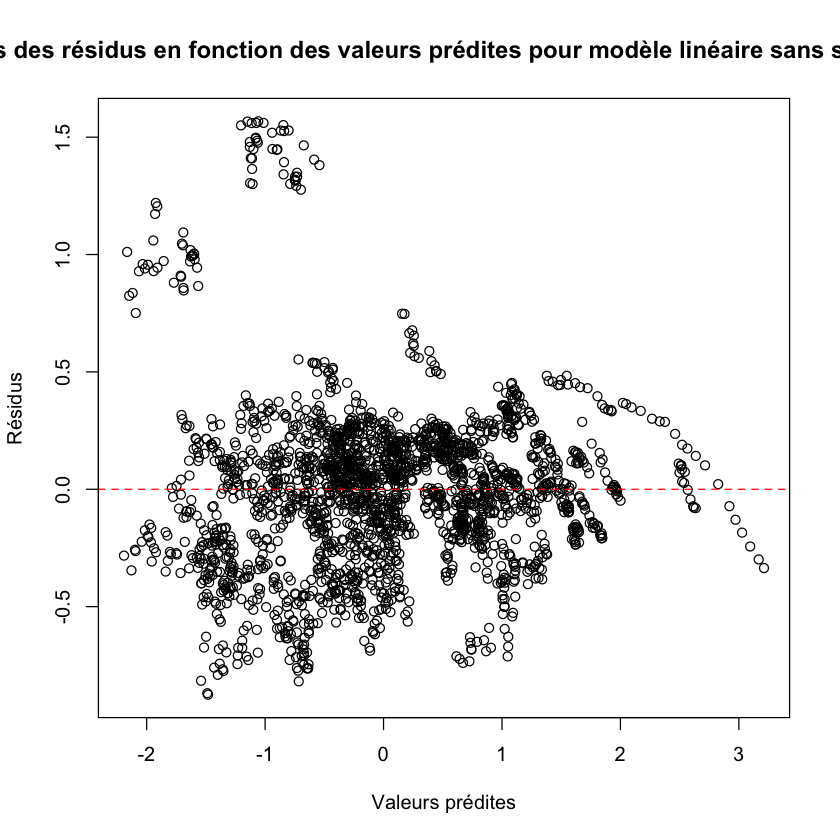

In [27]:
residuals <- resid(ancova_model)
fitted.values <- fitted(ancova_model)

# Créer un data frame pour le nuage de points
residuals_df <- data.frame(Residuals = residuals, Fitted_Values = fitted.values)

# Créer le nuage de points avec ggplot2
plot(fitted.values, residuals,
     xlab = "Valeurs prédites", ylab = "Résidus",
     main = "Nuage de points des résidus en fonction des valeurs prédites pour modèle linéaire sans sélection de variable")
abline(h = 0, lty = 2, col = "red")  # Ajouter la ligne y = 0 en rouge en pointillés




Les résidus semblent centrés mais de variance non constante. + interprétation des coefficients.

### 8.2 Avec sélection de variable : critère BIC

In [28]:
bic_model <- step(ancova_model, direction = "both", k = log(nrow(datappr)))

# Afficher le modèle sélectionné
dim(bic_model)

Start:  AIC=-4617.77
Value_co2_emissions_kt_by_country ~ Year + Access.to.electricity....of.population. + 
    Access.to.clean.fuels.for.cooking + Renewable.energy.share.in.the.total.final.energy.consumption.... + 
    Electricity.from.nuclear..TWh. + Electricity.from.renewables..TWh. + 
    Low.carbon.electricity....electricity. + Primary.energy.consumption.per.capita..kWh.person. + 
    Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. + 
    gdp_growth + gdp_per_capita + Density.n.P.Km2. + Land.Area.Km2. + 
    Latitude + Longitude

                                                                   Df Sum of Sq
- Year                                                             19      0.67
- gdp_growth                                                        1      0.22
- gdp_per_capita                                                    1      0.72
<none>                                                                         
- Access.to.clean.fuels.for.cooking             

NULL

In [328]:
# Nombre de coefficients du modèle initial
coeff_initial <- length(coef(ancova_model))

# Nombre de coefficients du modèle sélectionné avec BIC
coeff_bic <- length(coef(bic_model))

# Nombre de coefficients retirés
coeff_retires <- coeff_initial - coeff_bic

# Afficher le nombre de coefficients retirés
coeff_retires


[1] 20

Avec une sélection de variable avec critère BIC, on peut retirer 30 variables.

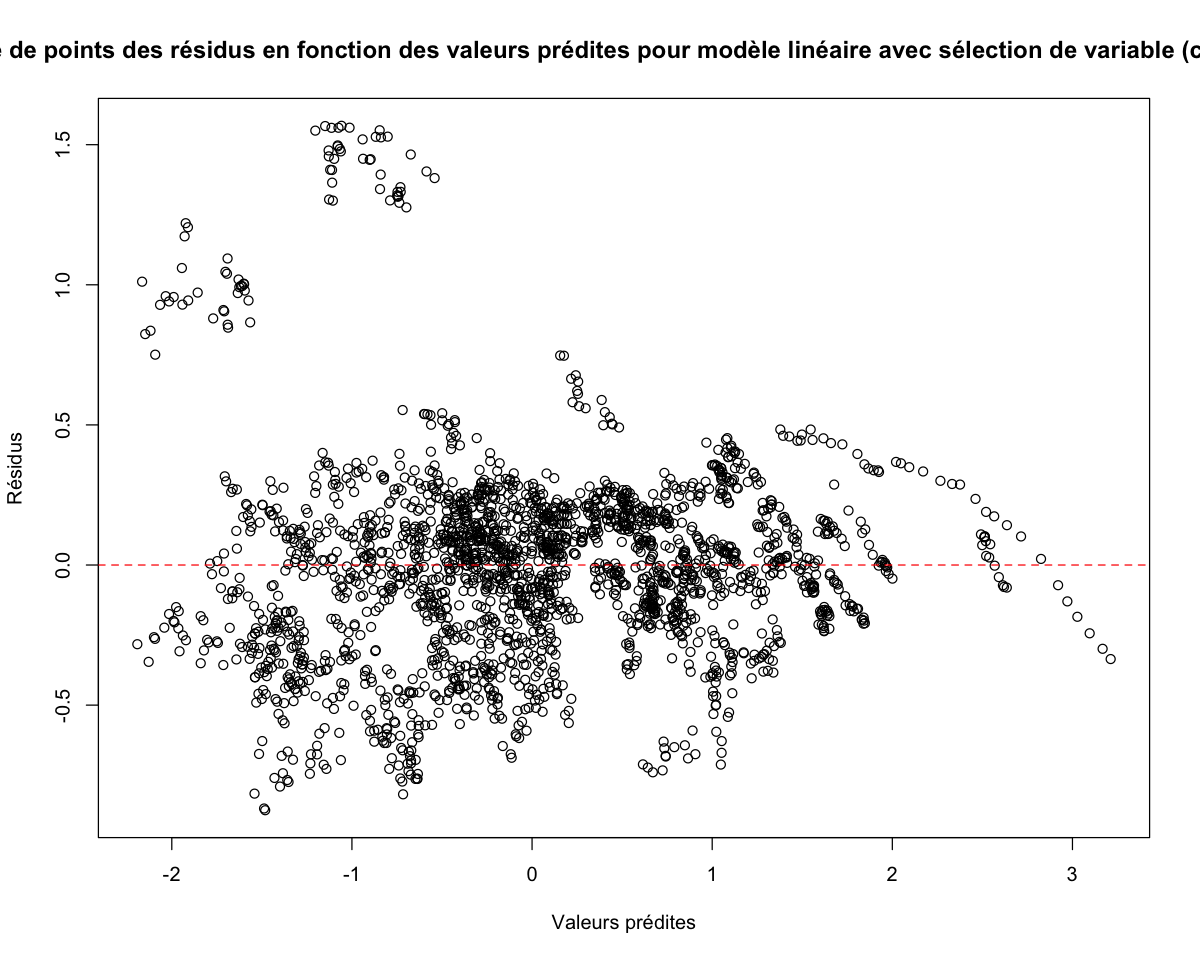

In [329]:
residuals_bic <- resid(bic_model)
fitted.values_bic <- fitted(bic_model)

# Créer un data frame pour le nuage de points
residuals_df <- data.frame(Residuals = residuals, Fitted_Values = fitted.values)

# Créer le nuage de points avec ggplot2
plot(fitted.values, residuals,
     xlab = "Valeurs prédites", ylab = "Résidus",
     main = "Nuage de points des résidus en fonction des valeurs prédites pour modèle linéaire avec sélection de variable (critère BIC)")
abline(h = 0, lty = 2, col = "red")  # Ajouter la ligne y = 0 en rouge en pointillés


### 8.3 Avec sélection de variable : régularisation L1 (LASSO)

In [330]:
head(datappr1)

Year Access.to.electricity....of.population.
5  2004 -1.793684                              
6  2005 -1.624663                              
7  2006 -1.455582                              
8  2007 -1.286358                              
11 2010 -1.075348                              
12 2011 -1.058782                              
   Access.to.clean.fuels.for.cooking
5  -1.306625                        
6  -1.273495                        
7  -1.231444                        
8  -1.194491                        
11 -1.074711                        
12 -1.028837                        
   Renewable.energy.share.in.the.total.final.energy.consumption....
5   0.5956868                                                      
6   0.3954159                                                      
7   0.3501781                                                      
8   0.2736857                                                      
11 -0.1975341                                                      
12 -0.3293050                                                      
   Electricity.from.nuclear..TWh. Electricity.from.renewables..TWh.
5  -0.4113497                     -0.2419482                       
6  -0.4113497                     -0.2416695                       
7  -0.4113497                     -0.2412050                       
8  -0.4113497                     -0.2401831                       
11 -0.4113497                     -0.2401831                       
12 -0.4113497                     -0.2415766                       
   Low.carbon.electricity....electricity.
5  0.7786180                             
6  0.7888996                             
7  1.0293612                             
8  1.0786767                             
11 1.0935306                             
12 1.0425510                             
   Primary.energy.consumption.per.capita..kWh.person.
5  -2.329154                                         
6  -2.201742                                         
7  -2.087403                                         
8  -1.995449                                         
11 -1.263510                                         
12 -1.145642                                         
   Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
5  -2.2344938                                                 
6  -2.0232599                                                 
7  -1.9383116                                                 
8  -1.9106739                                                 
11 -1.1853577                                                 
12 -0.7198072                                                 
   Value_co2_emissions_kt_by_country gdp_growth gdp_per_capita Density.n.P.Km2.
5  -1.00364589                       -0.5340971 -1.896534      -0.03475675     
6  -0.83231075                        1.5787774 -1.811287      -0.03475675     
7  -0.77903446                        0.3147220 -1.757197      -0.03475675     
8  -0.77665870                        2.1377143 -1.561600      -0.03475675     
11 -0.19343185                        2.2531183 -1.301385      -0.03475675     
12 -0.09782069                       -0.7467199 -1.248065      -0.03475675     
   Land.Area.Km2. Latitude  Longitude
5  0.7885953      0.6338505 0.8359896
6  0.7885953      0.6338505 0.8359896
7  0.7885953      0.6338505 0.8359896
8  0.7885953      0.6338505 0.8359896
11 0.7885953      0.6338505 0.8359896
12 0.7885953      0.6338505 0.8359896

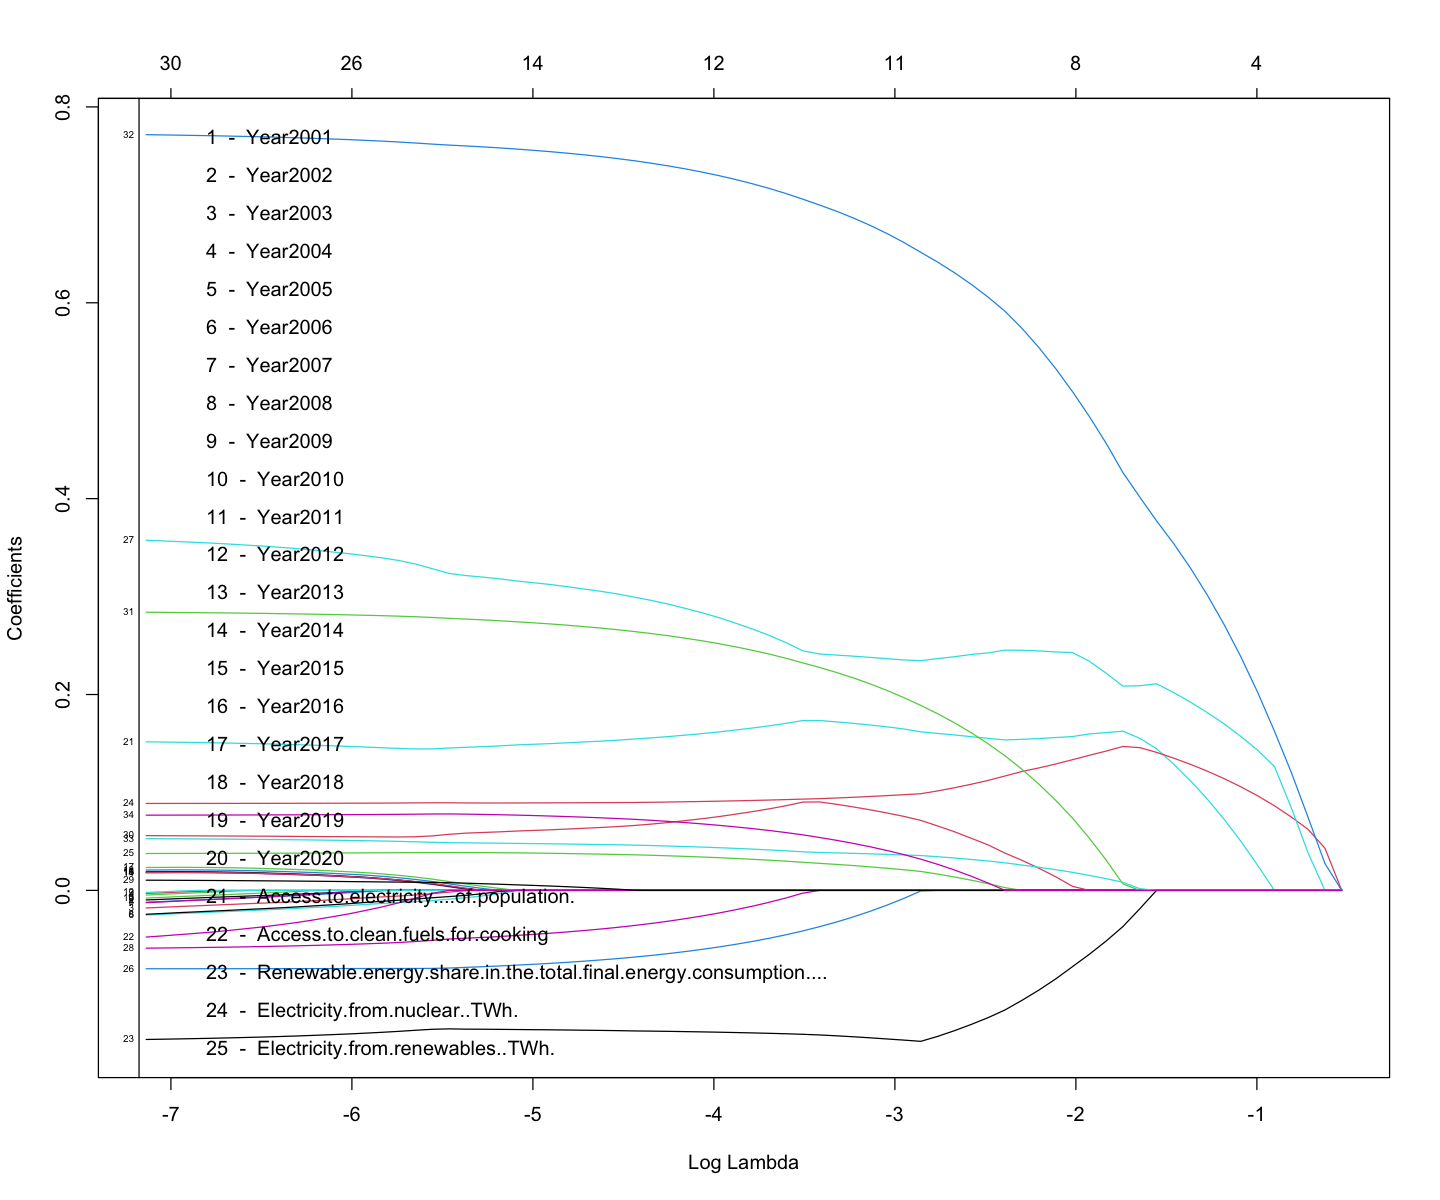

In [331]:


library(glmnet)
# avec des variables quantitatives seulement
#reg.lasso.quanti <- glmnet(y = datappr1$Value_co2_emissions_kt_by_country,
                      #     x = as.matrix(datappr1[, -c(2)]))
# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(Value_co2_emissions_kt_by_country ~ . , data = datappr1)[,-1]
reg.lasso <- glmnet(y = datappr1$Value_co2_emissions_kt_by_country, x = x.mat)
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE)
legend("topright", 
       legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))


In [332]:
y <- datappr1$Value_co2_emissions_kt_by_country
x <- model.matrix(Value_co2_emissions_kt_by_country ~ ., data = datappr1)[,-1]


In [333]:
reg.lasso <- glmnet(x, y, alpha = 1)

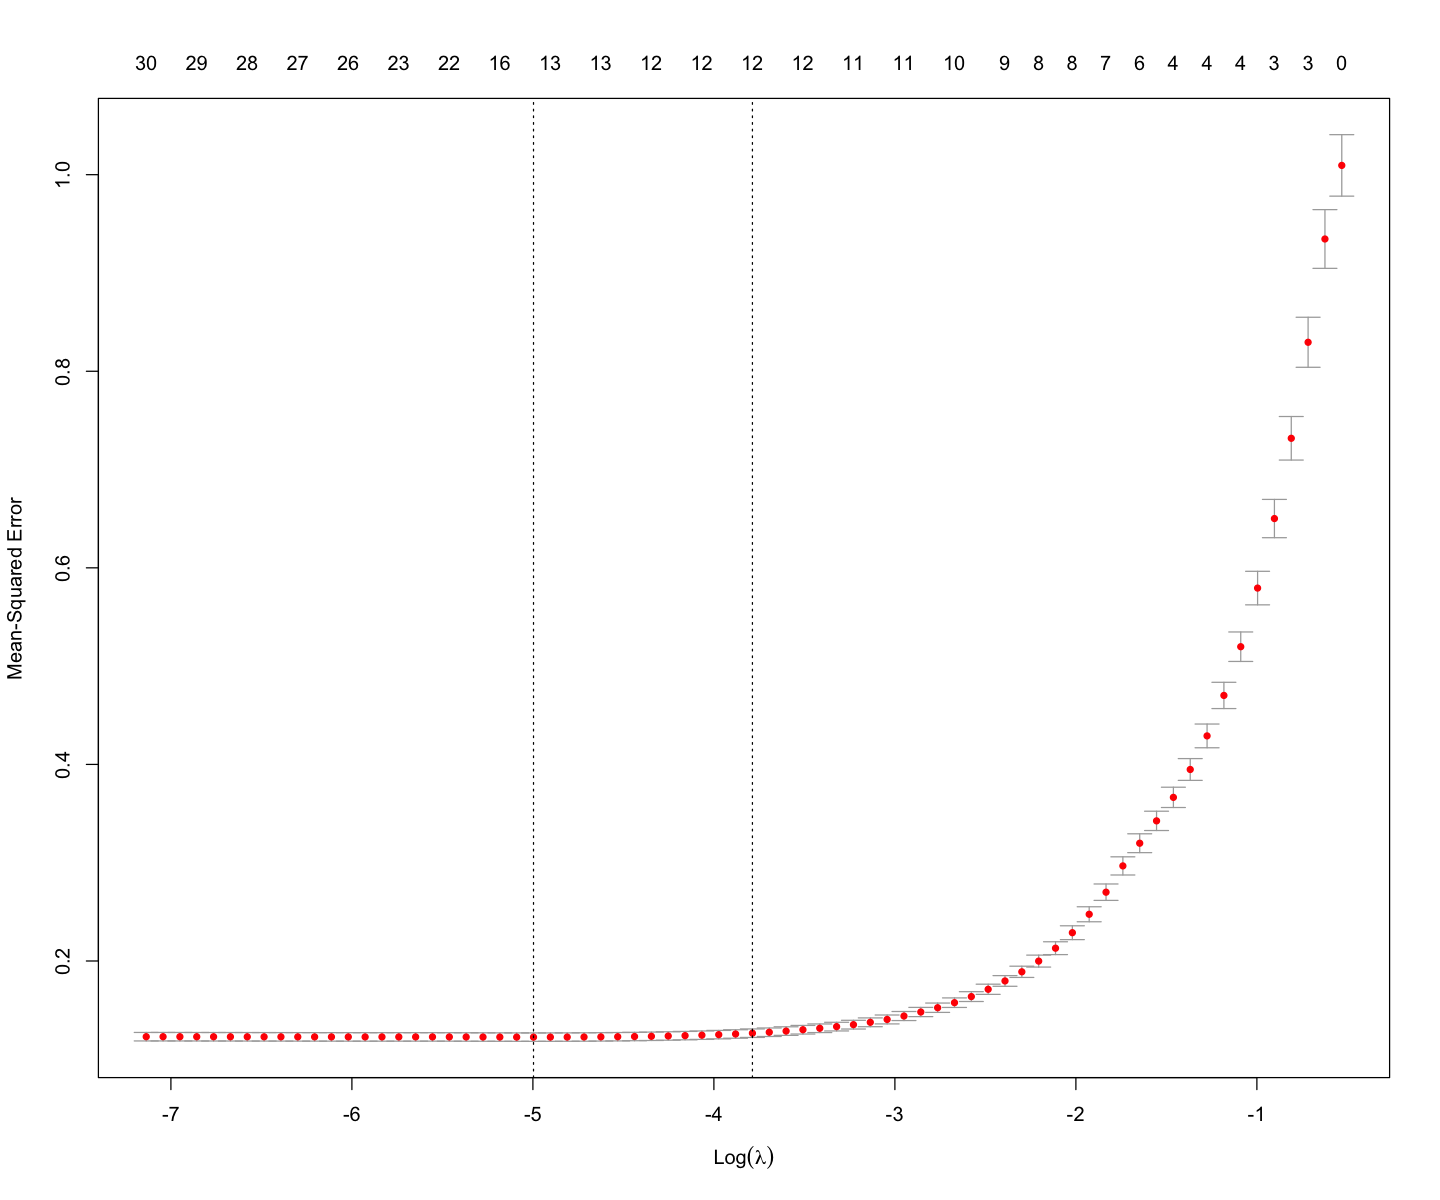

In [334]:

reg.lasso.cv <- cv.glmnet(x, y, alpha = 1)
plot(reg.lasso.cv)


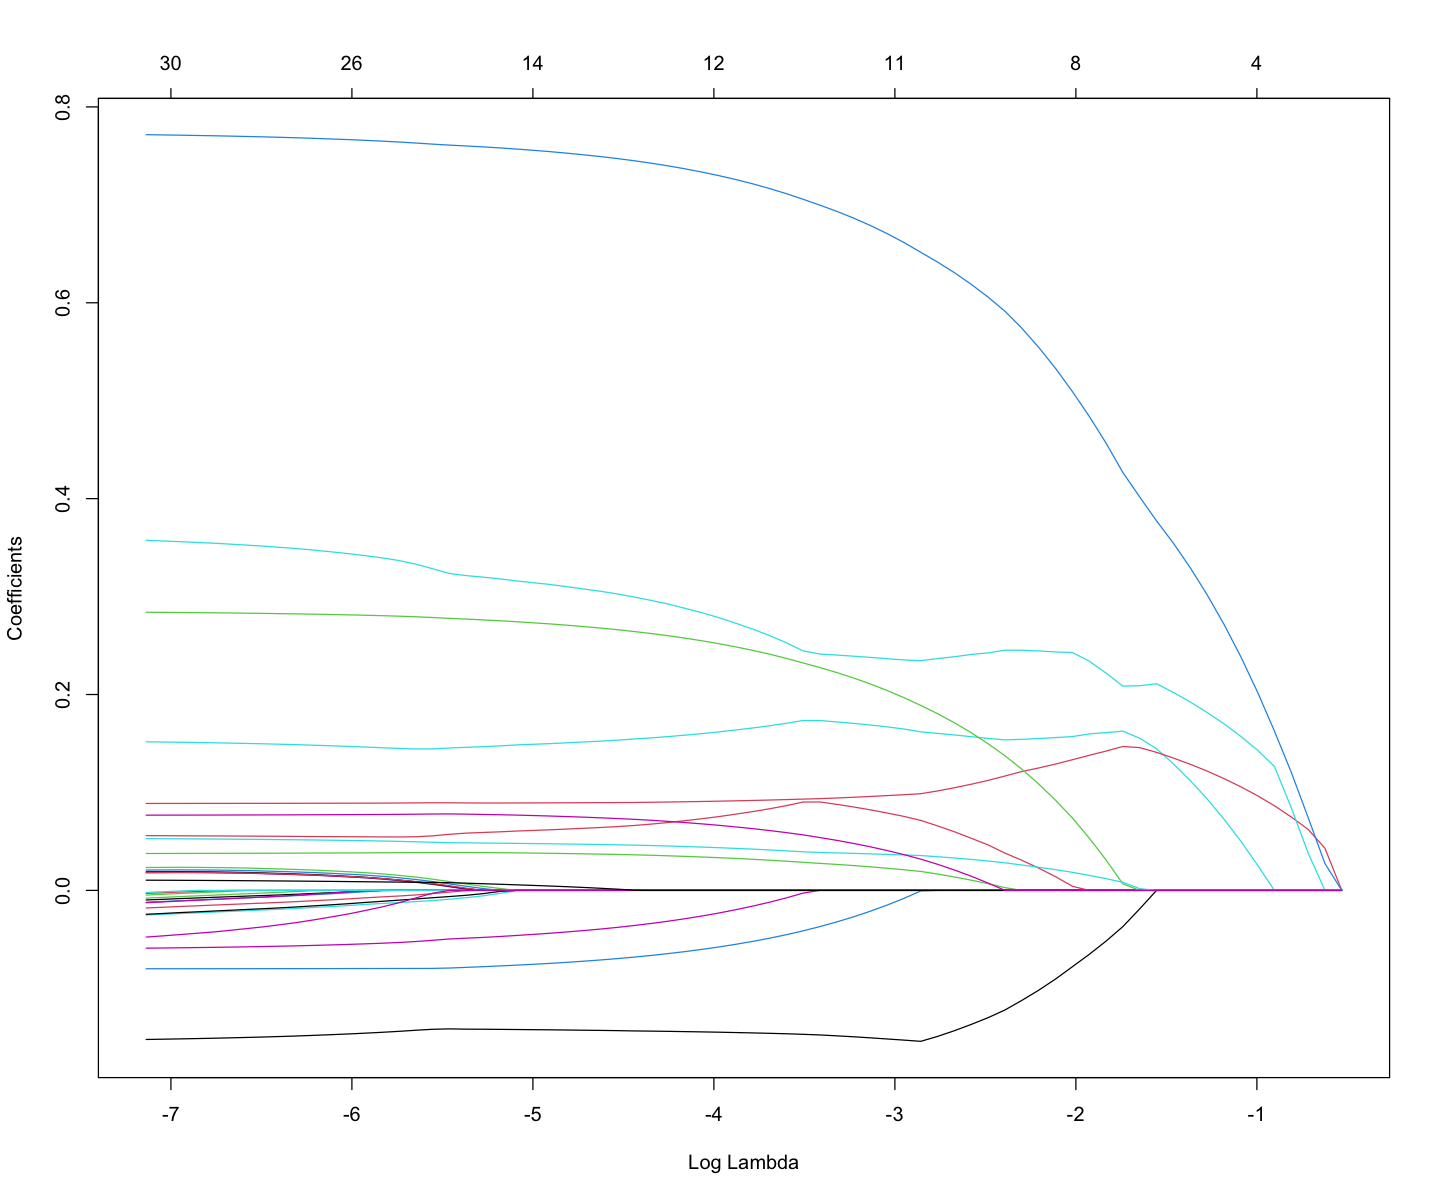

In [335]:
plot(reg.lasso.cv$glmnet.fit, xvar = "lambda")
abline(v = reg.lasso.cv$lambda.min, col = "red")


In [336]:
#coefficients_optimal <- coef(reg.lasso.cv, s = "lambda.min")
#print(coefficients_optimal)




# valeur estimée
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.min, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.min")


[1] "CV estimate of lambda : 0.007"

35 x 1 sparse Matrix of class "dgCMatrix"
                                                                            s1
(Intercept)                                                      -0.0006299315
Year2001                                                          .           
Year2002                                                          .           
Year2003                                                          .           
Year2004                                                          .           
Year2005                                                          .           
Year2006                                                          .           
Year2007                                                          .           
Year2008                                                          .           
Year2009                                                          .           
Year2010                                                          .           
Year2011  

Avec la pénalisation L1, on voit que les variables les plus importantes dans le modèle sont celles associées aux coefficients 35, 24, 30, 82 et 170. Les autres sont moins importantes.

Traçons les résidus en fonction des valeurs prédites avec LASSO (lambda.min) : 

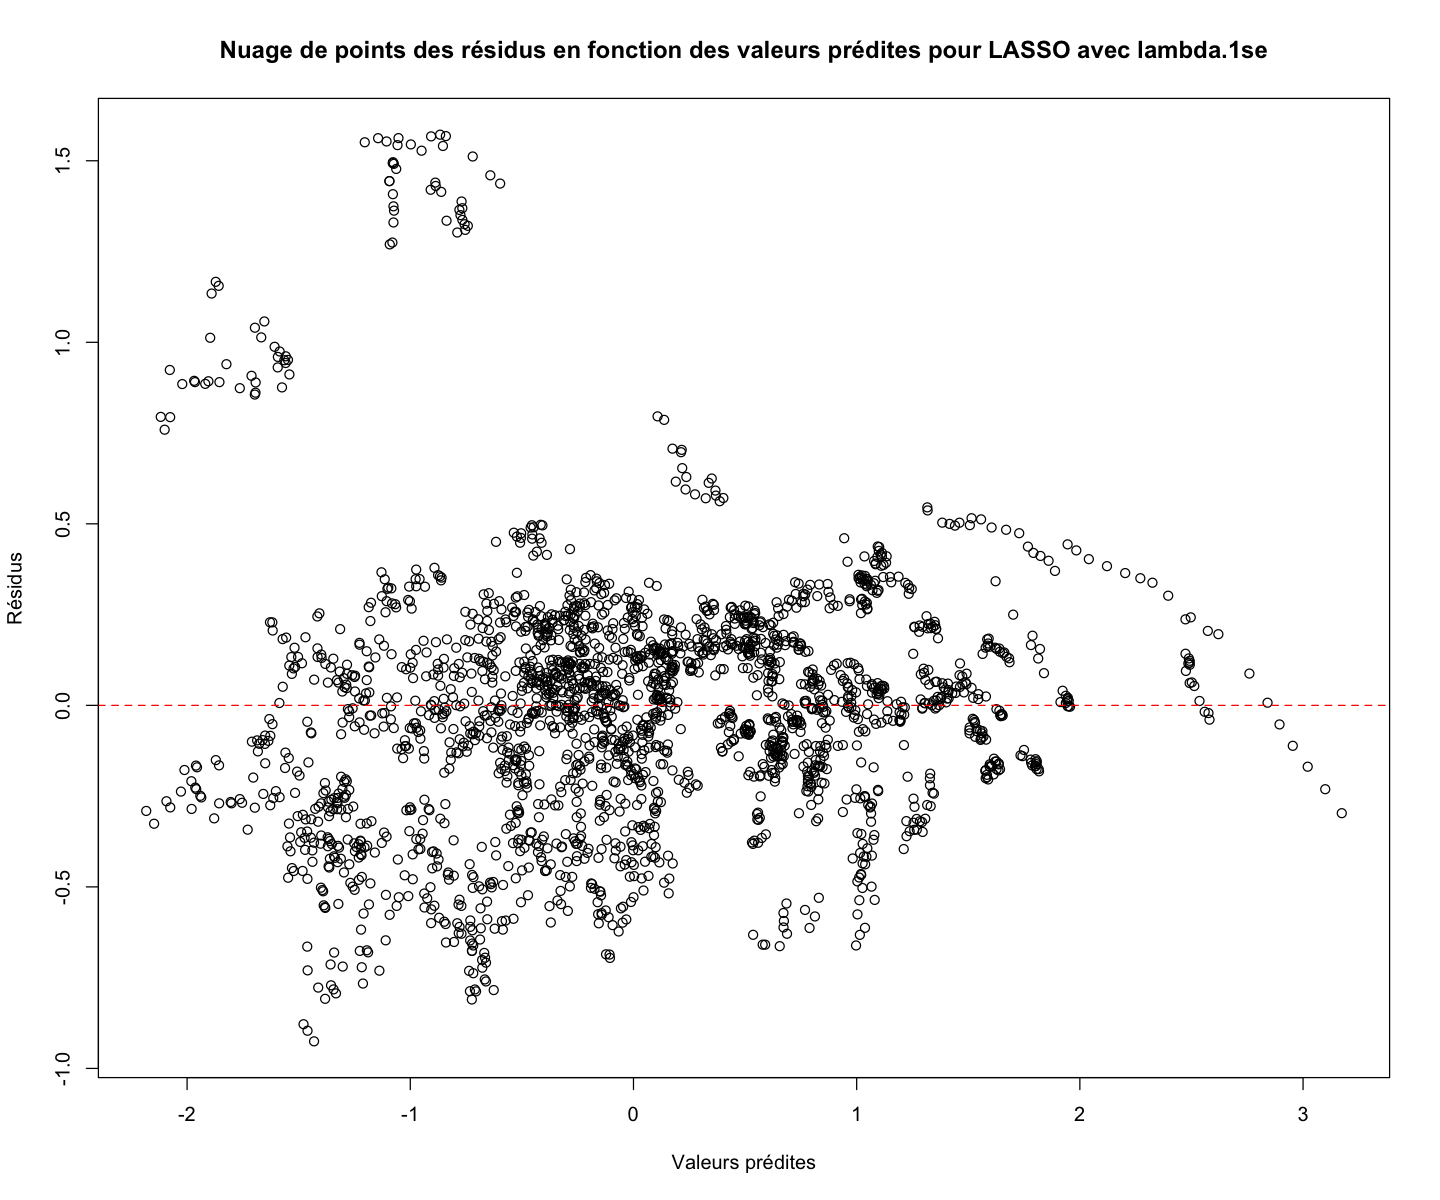

In [337]:
# Prédiction des valeurs ajustées pour le modèle LASSO avec lambda.1se
fitted.values_lasso_min <- predict(reg.lasso.cv, newx = x.mat, s = "lambda.min")

# Calcul des résidus
residuals_lasso_min <- datappr1$Value_co2_emissions_kt_by_country - fitted.values_lasso_min

# Tracer le graphique des résidus en fonction des valeurs prédites
plot(fitted.values_lasso_min, residuals_lasso_min,
     xlab = "Valeurs prédites", ylab = "Résidus",
     main = "Nuage de points des résidus en fonction des valeurs prédites pour LASSO avec lambda.1se")
abline(h = 0, lty = 2, col = "red")  # Ajouter la ligne y = 0 en rouge en pointillés


### 8.4 Comparaison des différentes méthodes

Afin de comparer ces différentes méthodes, nous allons tracer les résidus en fonction des valeurs à prédire :

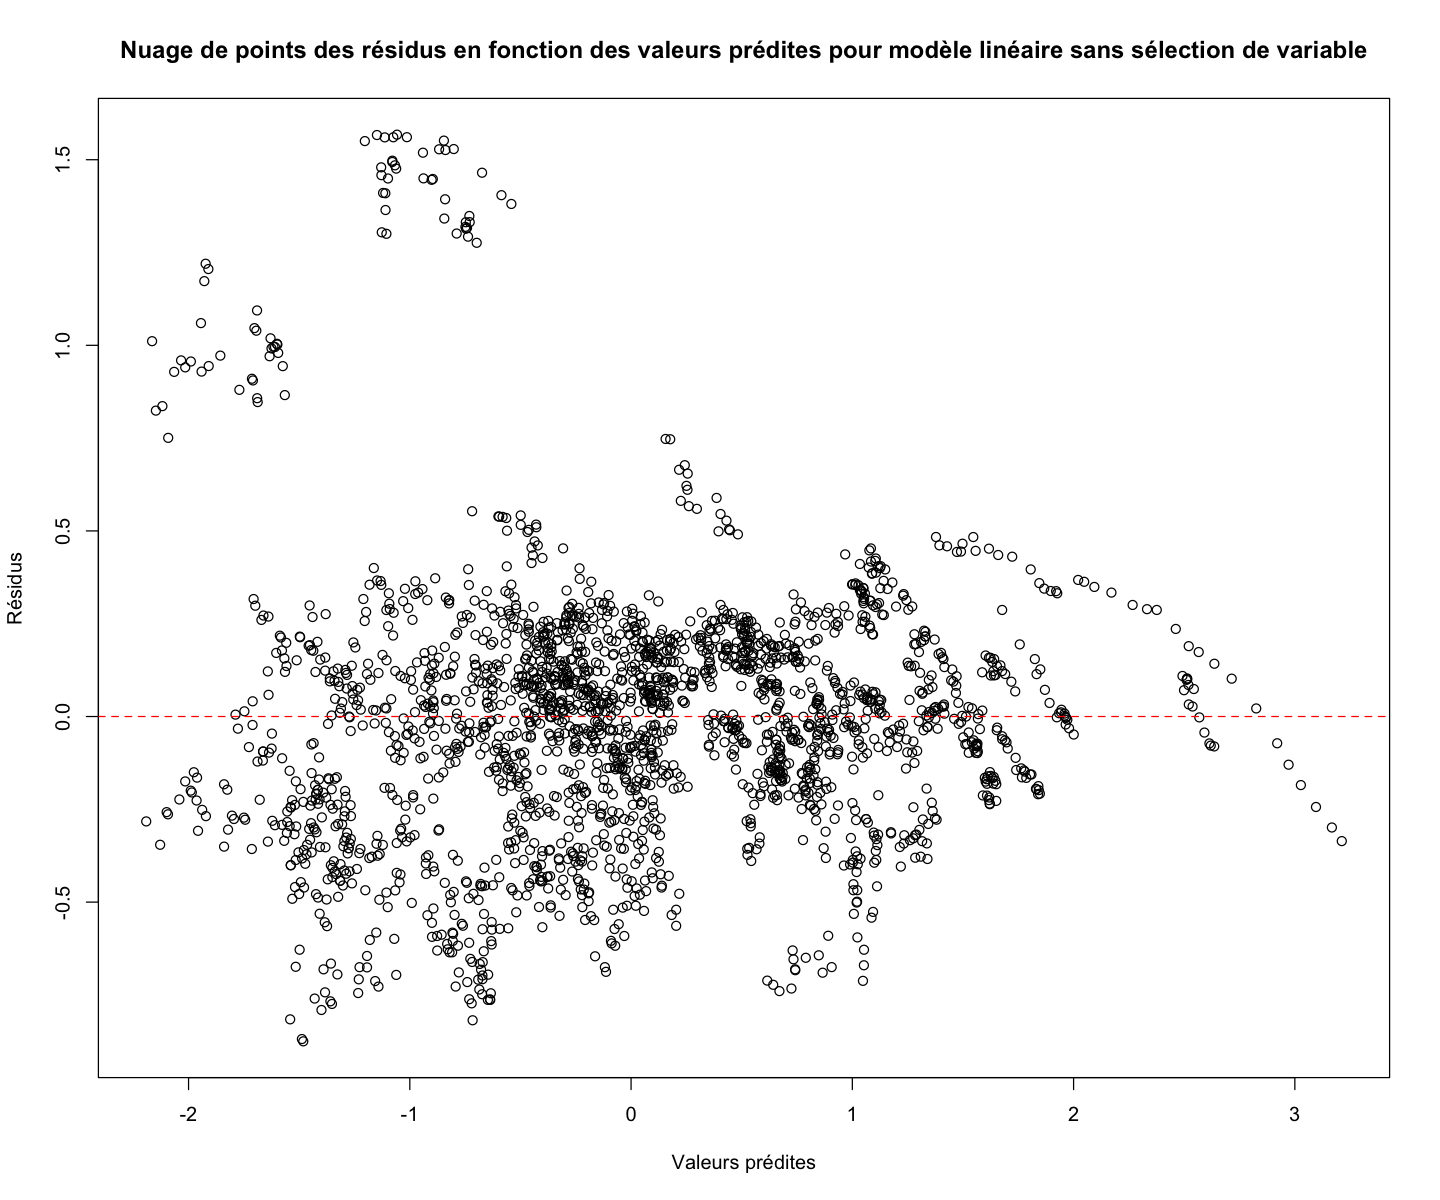

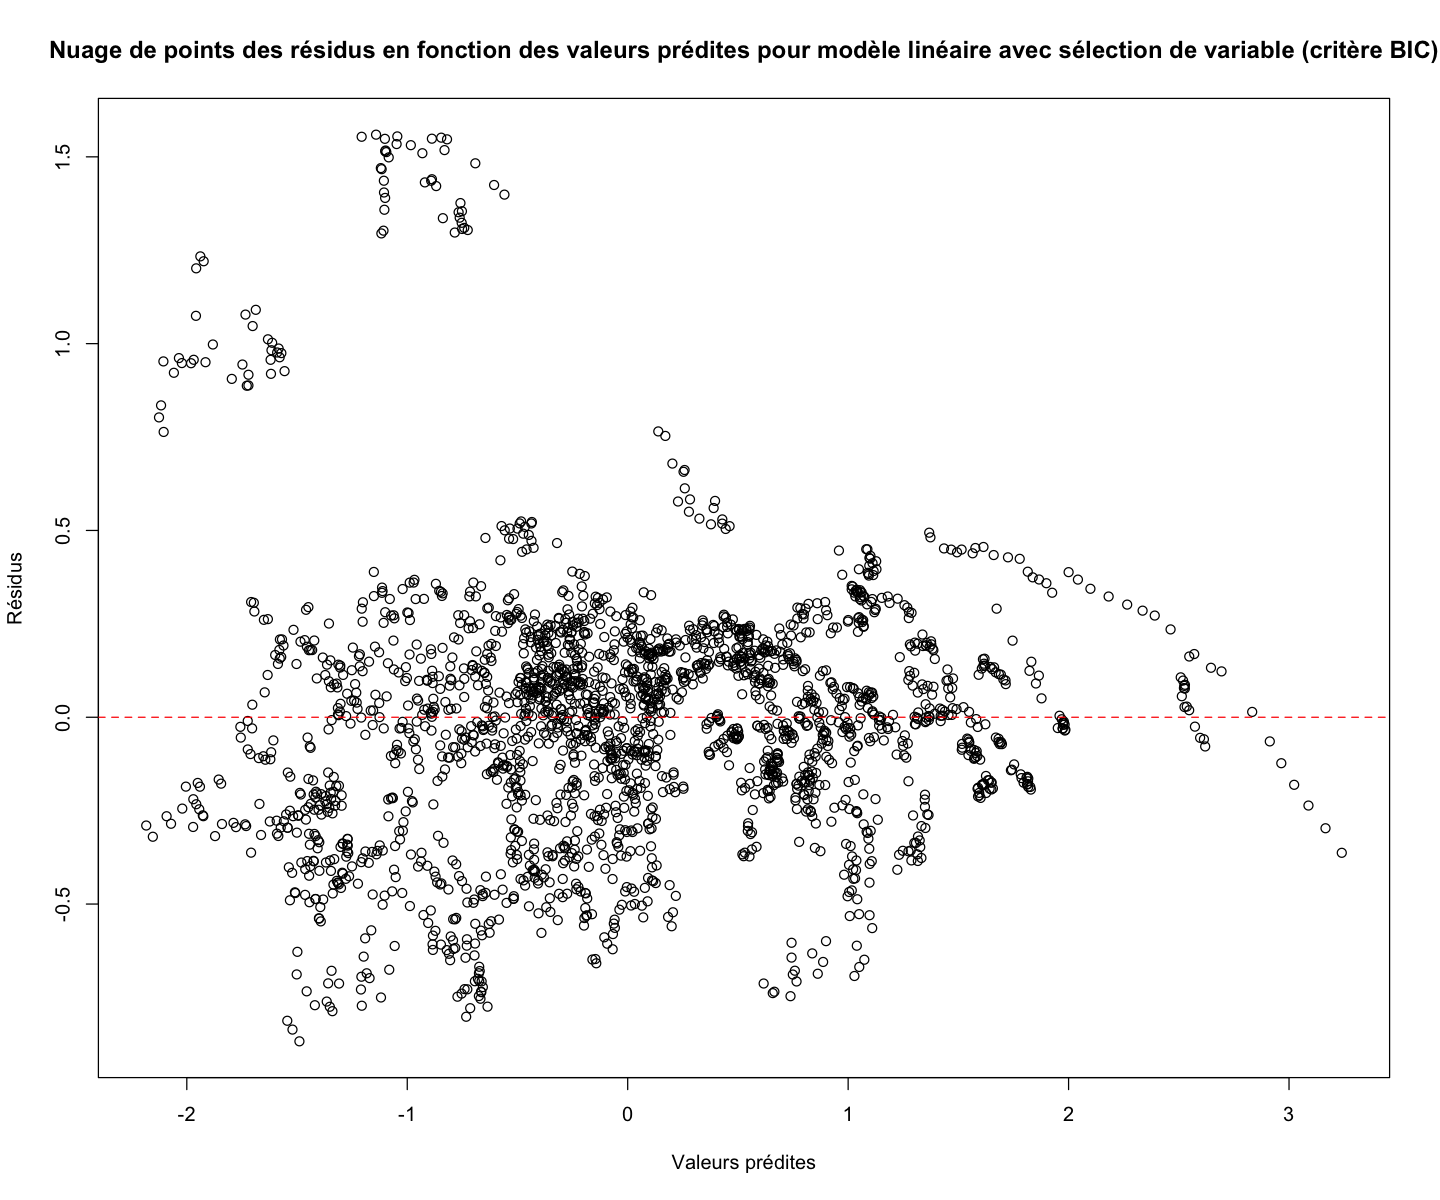

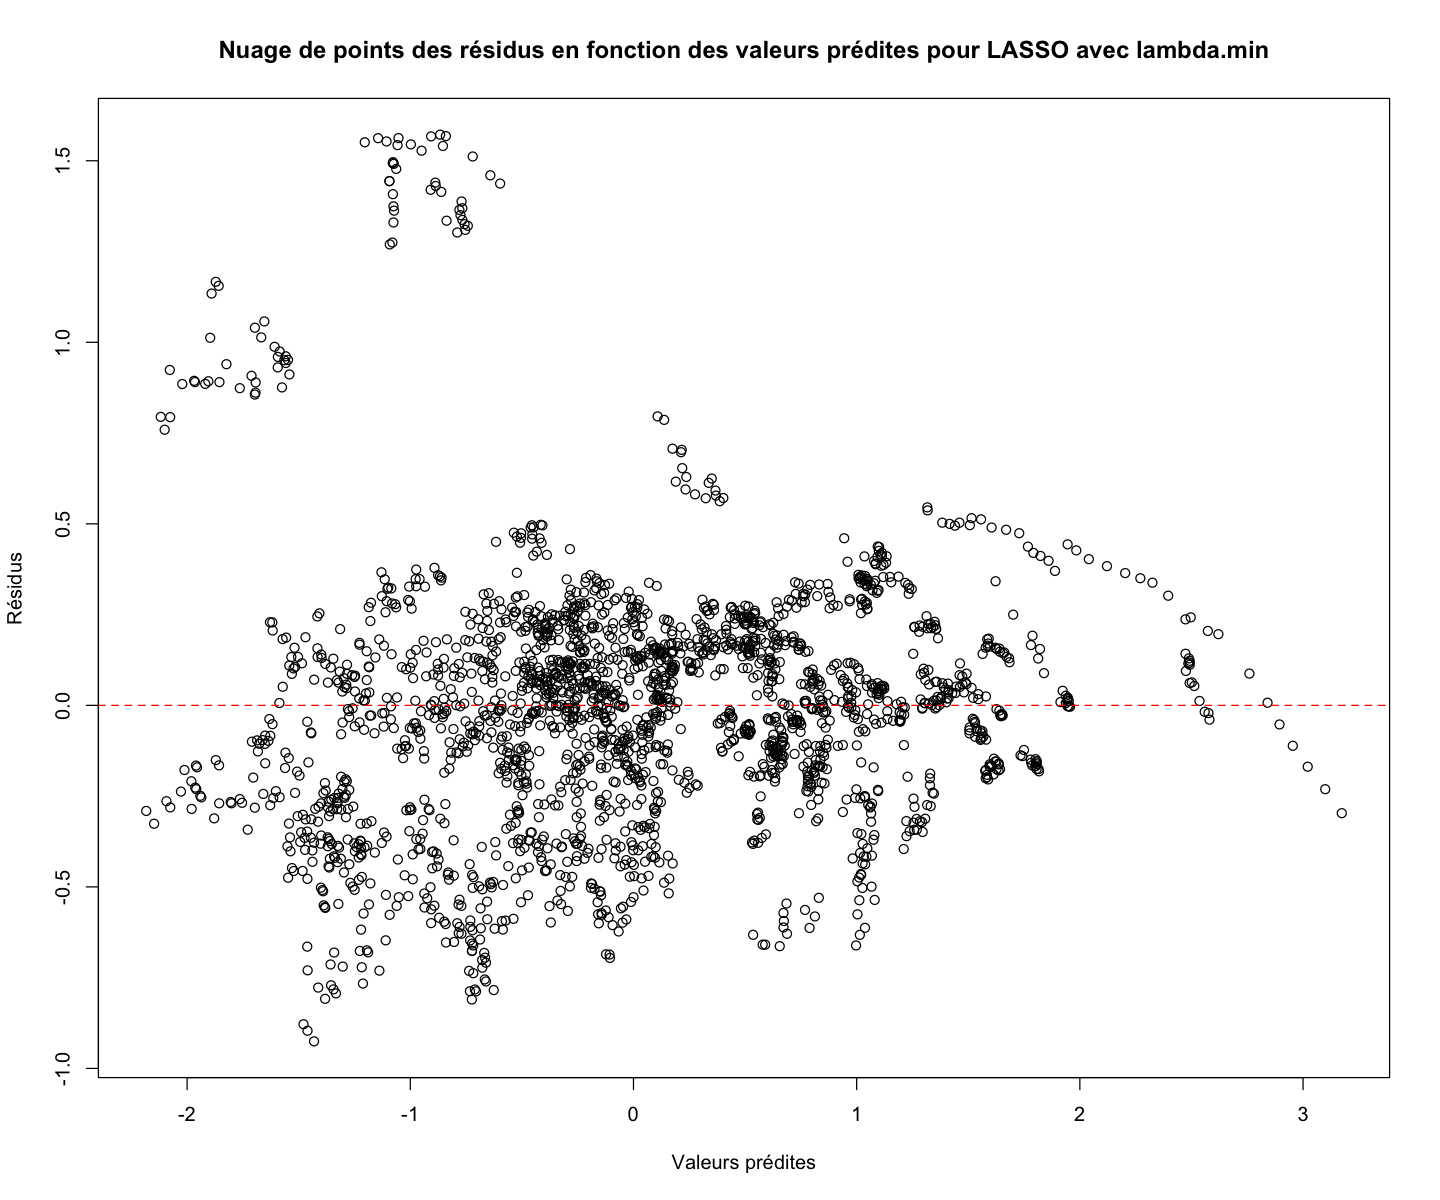

In [338]:
plot(fitted.values, residuals,
     xlab = "Valeurs prédites", ylab = "Résidus",
     main = "Nuage de points des résidus en fonction des valeurs prédites pour modèle linéaire sans sélection de variable")
abline(h = 0, lty = 2, col = "red")  # Ajouter la ligne y = 0 en rouge en pointillés


plot(fitted.values_bic, residuals_bic,
     xlab = "Valeurs prédites", ylab = "Résidus",
     main = "Nuage de points des résidus en fonction des valeurs prédites pour modèle linéaire avec sélection de variable (critère BIC)")
abline(h = 0, lty = 2, col = "red")  # Ajouter la ligne y = 0 en rouge en pointillés

plot(fitted.values_lasso_min, residuals_lasso_min,
     xlab = "Valeurs prédites", ylab = "Résidus",
     main = "Nuage de points des résidus en fonction des valeurs prédites pour LASSO avec lambda.min")
abline(h = 0, lty = 2, col = "red")  # Ajouter la ligne y = 0 en rouge en pointillés


Calculons le critère MSE (mean squared errors) pour chaque modèle : 

In [339]:
res_ancova <- resid(ancova_model)

# Calculer la moyenne des carrés des résidus
mse_ancova <- mean(res_ancova^2)

# Afficher la moyenne des carrés des résidus pour le modèle initial
paste("Modèle linéaire sans sélection de variables (ANCOVA) :", mse_ancova)

res_bic <- resid(bic_model)

# Calculer la moyenne des carrés des résidus
mse_bic <- mean(res_bic^2)
mse_lasso = mean(residuals_lasso_min^2)
# Afficher la moyenne des carrés des résidus pour le modèle sélectionné avec BIC
paste("Modèle linéaire avec sélection de variables BIC:", mse_bic)

paste("LASSO avec lambda.min:",mse_lasso)


[1] "Modèle linéaire sans sélection de variables (ANCOVA) : 0.119115292992101"

[1] "Modèle linéaire avec sélection de variables BIC: 0.119484182878135"

[1] "LASSO avec lambda.min: 0.120393321081395"

On remarque ici que le score obtenu par LASSO est moins bon par rapport au modèle linéaire sans sélection de variable.

Maintenant, estimons l'erreur du modèle linéaire simple sans sélection de variables et du modèle avec LASSO par validation croisée :

In [340]:
V=10 ; nV=floor(nrow(datappr1)/V)
S=sample(1:nrow(datappr),replace=FALSE)
error.CV = c()
for(v in 1:V)
{ # Rq : les deux dernières obs sont tjs dans l'échantillon d'apprentissage...
    datappr.learn=datappr1[-c(S[(nV*(v-1)):(nV*v)]),] 
    datappr.valid=datappr1[c(S[(nV*(v-1)):(nV*v)]),]
    error.CV=c(error.CV,mean((datappr.valid$Value_co2_emissions_kt_by_country-predict(aov(Value_co2_emissions_kt_by_country ~ ., data=datappr.learn),newdata=datappr.valid))^2))
}
mean(error.CV)



[1] 0.1228976

Pour le modèle linéaire avec sélection de variable (critère BIC) : 

In [341]:
V <- 10
nV <- floor(nrow(datappr1) / V)
S <- sample(1:nrow(datappr1), replace = FALSE)
error.CV <- c()

for (v in 1:V) {
  datappr.learn <- datappr1[-c(S[(nV * (v - 1)):(nV * v)]), ]
  datappr.valid <- datappr1[c(S[(nV * (v - 1)):(nV * v)]), ]
  
  # Effectuer une sélection de variables en utilisant le critère BIC sur l'échantillon d'apprentissage
  bic_model <- step(lm(Value_co2_emissions_kt_by_country ~ ., data = datappr.learn), direction = "both", k = log(nrow(datappr.learn)))
  
  # Prédire les valeurs pour l'échantillon de validation avec le modèle sélectionné avec BIC
  pred_valid <- predict(bic_model, newdata = datappr.valid)
  
  # Calculer l'erreur quadratique moyenne pour cet échantillon de validation
  error.CV <- c(error.CV, mean((datappr.valid$Value_co2_emissions_kt_by_country - pred_valid)^2))
}

# Calculer la moyenne des erreurs quadratiques moyennes sur tous les échantillons de validation
mean_error.CV <- mean(error.CV)

# Afficher la moyenne des erreurs quadratiques moyennes pour la validation croisée avec BIC
mean_error.CV


Start:  AIC=-4052.03
Value_co2_emissions_kt_by_country ~ Year + Access.to.electricity....of.population. + 
    Access.to.clean.fuels.for.cooking + Renewable.energy.share.in.the.total.final.energy.consumption.... + 
    Electricity.from.nuclear..TWh. + Electricity.from.renewables..TWh. + 
    Low.carbon.electricity....electricity. + Primary.energy.consumption.per.capita..kWh.person. + 
    Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. + 
    gdp_growth + gdp_per_capita + Density.n.P.Km2. + Land.Area.Km2. + 
    Latitude + Longitude

                                                                   Df Sum of Sq
- Year                                                             19      0.98
- gdp_growth                                                        1      0.25
- gdp_per_capita                                                    1      0.62
<none>                                                                         
- Access.to.clean.fuels.for.cooking             

[1] 0.1227425

In [342]:
print(reg.lasso.cv)


Call:  cv.glmnet(x = x, y = y, alpha = 1) 

Measure: Mean-Squared Error 

      Lambda Index Measure       SE Nonzero
min 0.006761    49  0.1225 0.004277      13
1se 0.022660    36  0.1265 0.004317      12


Cependant, ici on remarque que l'erreur du modèle linéaire est bien plus grande que celle du modèle avec LASSO.

En conclusion, le MSE pénalise plus les plus grandes erreurs (car carré) contrairement à l'erreur du modèle.

### 8.4 Prévision de l'échantillon test

Nous allons prédire l'échantillon test avec les modèles précèdents. Nous allons utilisés deux erreurs, l'erreur quadratique de régression et la matrice de confusion pour le dépassement de seuil.

In [343]:
moyenne_co2 <- mean(datappr$Value_co2_emissions_kt_by_country)
moyenne_co2

[1] -0.0001064092

Pour le modèle linéaire sans sélection de variable : 

In [344]:
pred.glm_sans_selection <- predict(ancova_model, newdata = datestr1)
# Erreur quadratique moyenne de prévision (MSE)
mse_lin = sum((pred.glm_sans_selection - datestr1[, "Value_co2_emissions_kt_by_country"])^2) / nrow(datestr1)
mse_lin

[1] 0.1541924

In [345]:
table(pred.glm_sans_selection>moyenne_co2,datestr1[,"Value_co2_emissions_kt_by_country"]>moyenne_co2)

       
        FALSE TRUE
  FALSE   259   33
  TRUE     24  258

Pour le modèle linéaire avec sélection de variable (critère BIC) : 

In [346]:
pred.glm_avec_selection <- predict(bic_model, newdata = datestr1)
# Erreur quadratique moyenne de prévision (MSE)
mse_bic = sum((pred.glm_avec_selection - datestr1[, "Value_co2_emissions_kt_by_country"])^2) / nrow(datestr1)
mse_bic

[1] 0.1515715

In [347]:
table(pred.glm_avec_selection>moyenne_co2,datestr1[,"Value_co2_emissions_kt_by_country"]>moyenne_co2)

       
        FALSE TRUE
  FALSE   259   32
  TRUE     24  259

Pour le modèle linéaire avec LASSO (lambda.min) : 

In [348]:
x.mat <- model.matrix(Value_co2_emissions_kt_by_country ~ . - 1, data = datestr1)[,-1]
pred.glm_lasso_min <- predict(reg.lasso.cv, newx = x.mat, s = "lambda.min")
mse_lasso = sum((pred.glm_lasso_min - datestr1[, "Value_co2_emissions_kt_by_country"])^2) / nrow(datestr1)
mse_lasso

[1] 0.1520428

In [349]:
table(pred.glm_lasso_min>moyenne_co2,datestr1[,"Value_co2_emissions_kt_by_country"]>moyenne_co2)

       
        FALSE TRUE
  FALSE   260   32
  TRUE     23  259

On constate que le modèle linéaire avec LASSO (lambda.min) est le modèle qui marche le mieux sur l'échantillon test parmi tous les modèles linéaires.

On peut regarder maintenant la courbe ROC : 

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(actual_binary, pred.glm_lasso_min):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases



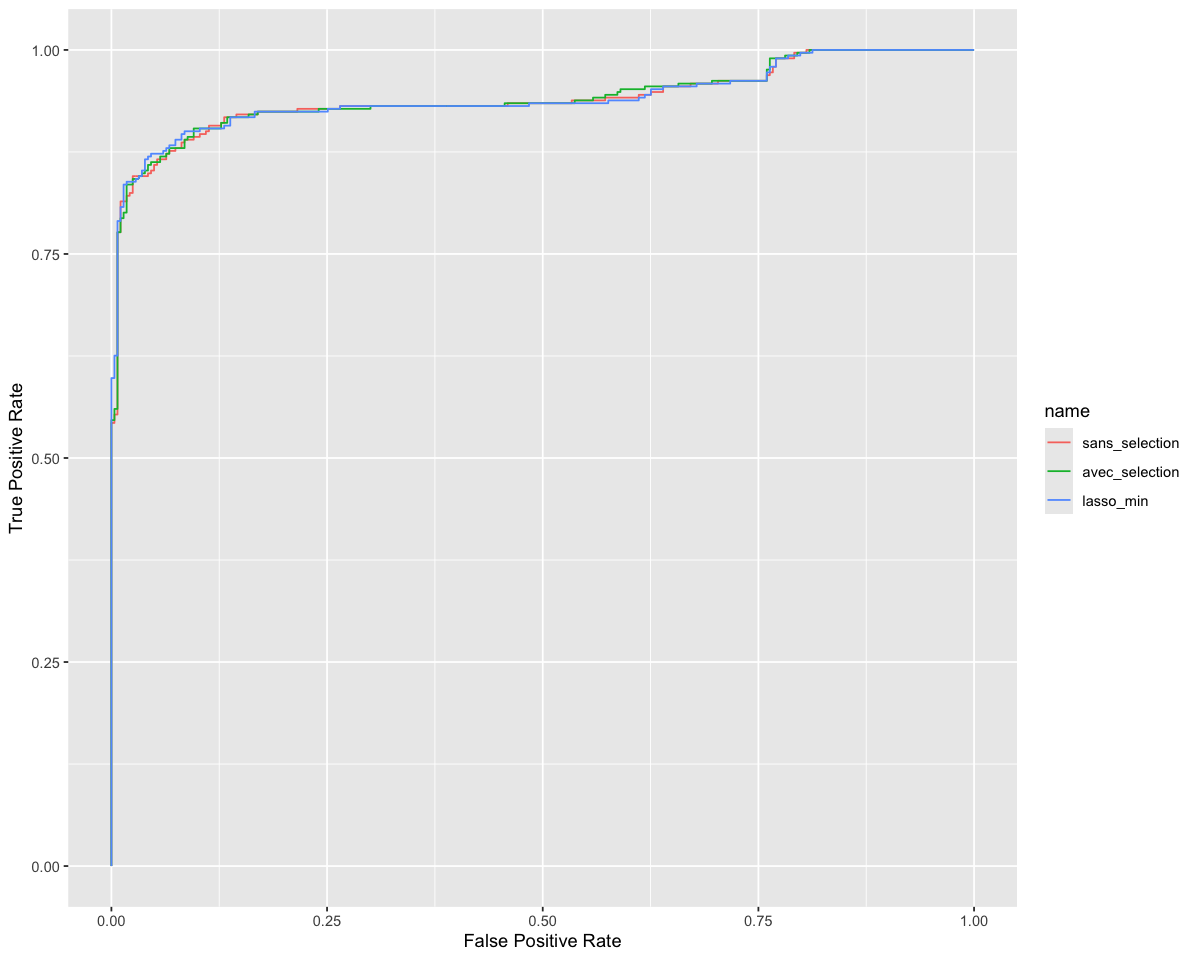

In [350]:
library(pROC)

# Supposons que pred.glm_sans_selection, pred.glm_avec_selection, pred.glm_lasso_min et pred.glm_lasso_1se
# sont les sorties de vos modèles de régression logistique.
# datestr1["Value_co2_emissions_kt_by_country"] est la variable que vous prédisez.

# Définir les prédictions binaires en fonction de la valeur moyenne du CO2
pred_binary_sans <- as.numeric(pred.glm_sans_selection > moyenne_co2)
pred_binary_avec <- as.numeric(pred.glm_avec_selection > moyenne_co2)
pred_binary_lasso_min <- as.numeric(pred.glm_lasso_min > moyenne_co2)

actual_binary <- as.numeric(datestr1[,"Value_co2_emissions_kt_by_country"] > moyenne_co2)

# Créer la courbe ROC pour chaque modèle en utilisant les prédictions binaires
rocobj <- list()
rocobj$sans_selection <- roc(actual_binary, pred.glm_sans_selection)
rocobj$avec_selection <- roc(actual_binary, pred.glm_avec_selection)
rocobj$lasso_min <- roc(actual_binary, pred.glm_lasso_min)


# Tracer la courbe ROC
options(repr.plot.width = 10, repr.plot.height = 8)
ggroc(rocobj, legacy.axes = TRUE) +
  xlab("False Positive Rate") +
  ylab("True Positive Rate")


## 9. Prévision par SVM

La Machine à Vecteurs de Support (SVM) est un modèle d'apprentissage supervisé utilisé pour la classification et la régression. Elle cherche à trouver un hyperplan dans un espace de données de grande dimension qui sépare les exemples de différentes classes de manière optimale. La SVM maximise les marges entre les exemples de différentes classes et utilise les vecteurs de support comme points clés pour la classification. Elle peut être étendue pour traiter des données non linéaires en utilisant des noyaux. Les SVM sont efficaces dans des espaces de grande dimension et sont robustes face à la malédiction de la dimensionnalité, mais elles peuvent être sensibles au choix des paramètres.

In [351]:
library(e1071)

In [352]:
# Define a vector of kernels to test
kernels <- c("linear", "radial", "polynomial")

# Initialize variables to store results
best_kernel <- NULL
best_accuracy <- 0

# Loop through each kernel
for (kernel in kernels) {
  # Train SVM model with current kernel
  svm_model <- svm(Value_co2_emissions_kt_by_country ~ ., data = datappr1, kernel = kernel)
 
  # Perform cross-validation
  accuracy <- crossprod(predict(svm_model, datappr1), datappr1$Value_co2_emissions_kt_by_country)
 
  # Check if current kernel is better than previous ones
  if (accuracy > best_accuracy) {
	best_accuracy <- accuracy
	best_kernel <- kernel
  }
}

# Print best kernel and its accuracy
cat("Best kernel:", best_kernel, "\n")
cat("Accuracy:", best_accuracy, "\n")

# Train SVM model with the best kernel
best_svm_model <- svm(Value_co2_emissions_kt_by_country ~ ., data = datappr1, kernel = best_kernel)
summary(best_svm_model)


Best kernel: radial 
Accuracy: 2253.195 



Call:
svm(formula = Value_co2_emissions_kt_by_country ~ ., data = datappr1, 
    kernel = best_kernel)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.02857143 
    epsilon:  0.1 


Number of Support Vectors:  725






In [353]:
#svm.reg.tune = tune.svm(Value_co2_emissions_kt_by_country ~ ., data = datappr1, cost = seq(22, 30, by = 0.5),
#gamma = seq(0.01, 0.05, by = 0.02))
#plot(svm.reg.tune)


In [354]:
svm.reg.tune$best.parameters
svm.reg=svm(Value_co2_emissions_kt_by_country~.,data=datappr1,cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma)

gamma cost
50 0.03  30

In [355]:
svm.reg = svm(Value_co2_emissions_kt_by_country ~ ., data = datappr1, cost = svm.reg.tune$best.parameters$cost,
	gamma = svm.reg.tune$best.parameters$gamma)
summary(svm.reg)



Call:
svm(formula = Value_co2_emissions_kt_by_country ~ ., data = datappr1, 
    cost = svm.reg.tune$best.parameters$cost, gamma = svm.reg.tune$best.parameters$gamma)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  30 
      gamma:  0.03 
    epsilon:  0.1 


Number of Support Vectors:  574






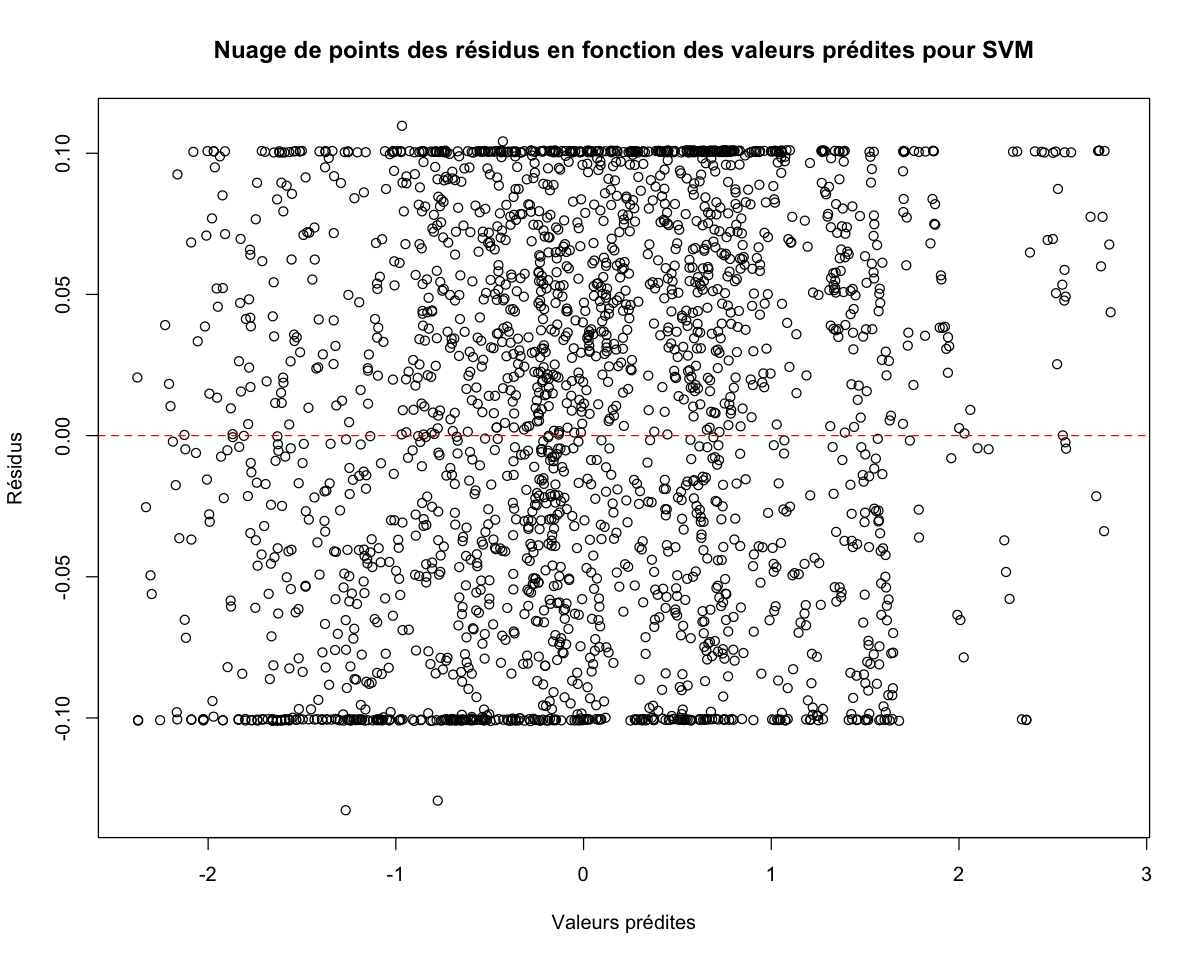

In [356]:
# Prédire les valeurs ajustées pour le modèle SVM
fitted.values_svm <- predict(svm.reg, newdata = datappr1)

# Calculer les résidus
residuals_svm <- datappr1$Value_co2_emissions_kt_by_country - fitted.values_svm

# Tracer le graphique des résidus en fonction des valeurs prédites
plot(fitted.values_svm, residuals_svm,
     xlab = "Valeurs prédites", ylab = "Résidus",
     main = "Nuage de points des résidus en fonction des valeurs prédites pour SVM")
abline(h = 0, lty = 2, col = "red")  # Ajouter la ligne y = 0 en rouge en pointillés


On regarde maintenant le MSE (mean squared error)

In [357]:
pred.svmr=predict(svm.reg,newdata=datestr1)
# Erreur quadratique moyenne de prévision
mse_svm = sum((pred.svmr-datestr1[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr1)
mse_svm

[1] 0.01117872

In [358]:
moyenne_co2 <- mean(datappr1$Value_co2_emissions_kt_by_country)
moyenne_co2

[1] -0.0001064092

Matrice de confusion :

In [359]:
table(pred.svmr>moyenne_co2,datestr1[,"Value_co2_emissions_kt_by_country"]>moyenne_co2)

       
        FALSE TRUE
  FALSE   278    4
  TRUE      5  287

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



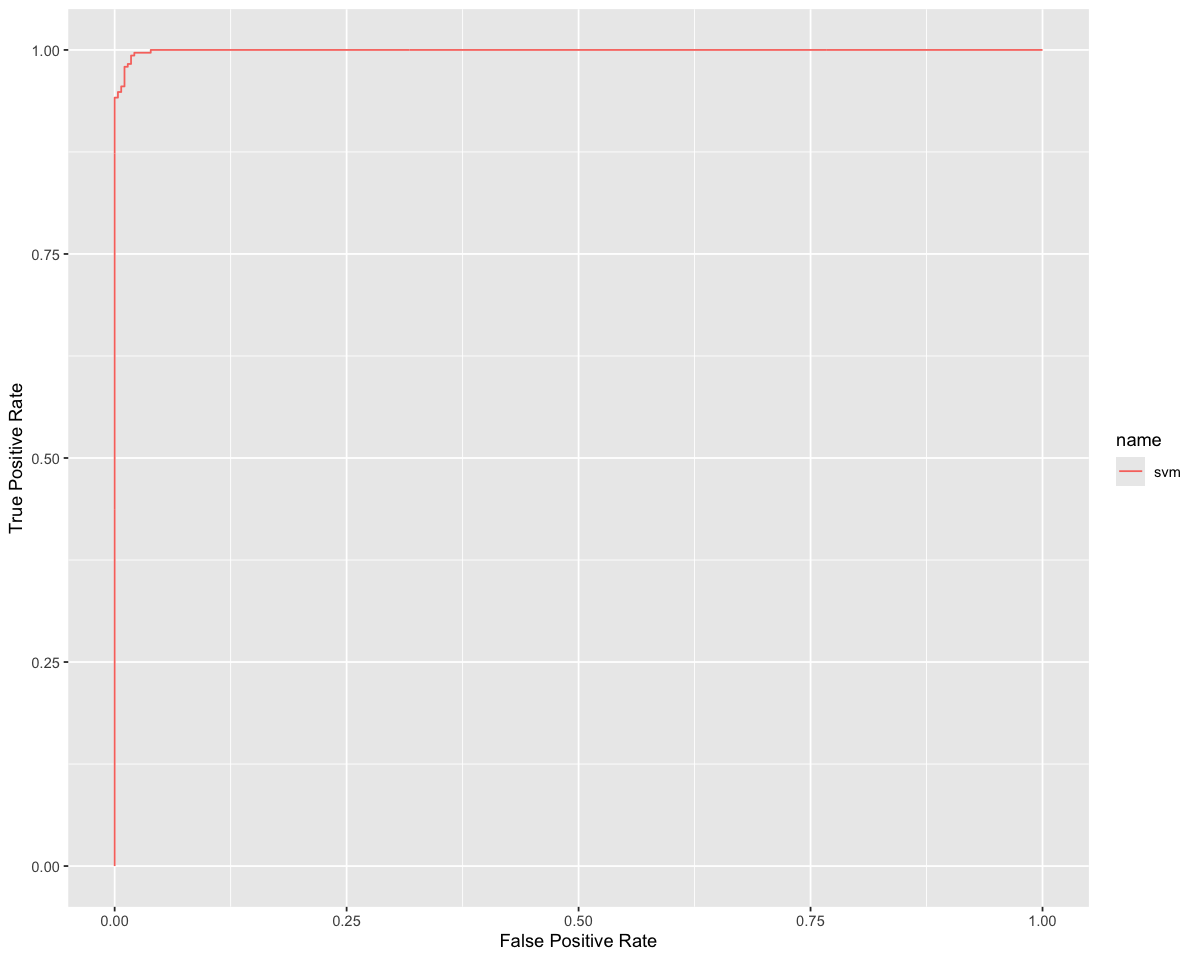

In [360]:
library(pROC)

# Supposons que pred.boostr soit la sortie de votre modèle de prédiction
# datestr["Value_co2_emissions_kt_by_country"] est la variable que vous prédisez

# Définir les prédictions binaires en fonction de la valeur moyenne du CO2
pred_binary <- pred.svmr > moyenne_co2
actual_binary <- datestr[,"Value_co2_emissions_kt_by_country"] > moyenne_co2

# Créer la courbe ROC pour chaque modèle en utilisant les prédictions binaires
rocobj <- list()
rocobj$svm <- roc(actual_binary, pred.svmr)


# Tracer la courbe ROC
options(repr.plot.width = 10, repr.plot.height = 8)
ggroc(rocobj, legacy.axes = TRUE) +
  xlab("False Positive Rate") +
  ylab("True Positive Rate")


## 10. Arbre Binaire

Nous allons maintenant faire de l'arbre binaire.

In [361]:
library(rpart)

On retire la variable Entity et Electricity.from.fossil.fuels..TWh

In [362]:
tree.reg=rpart(Value_co2_emissions_kt_by_country~.,data=datappr1,control=rpart.control(cp=0.001))

Warning message:
“labs do not fit even at cex 0.15, there may be some overplotting”


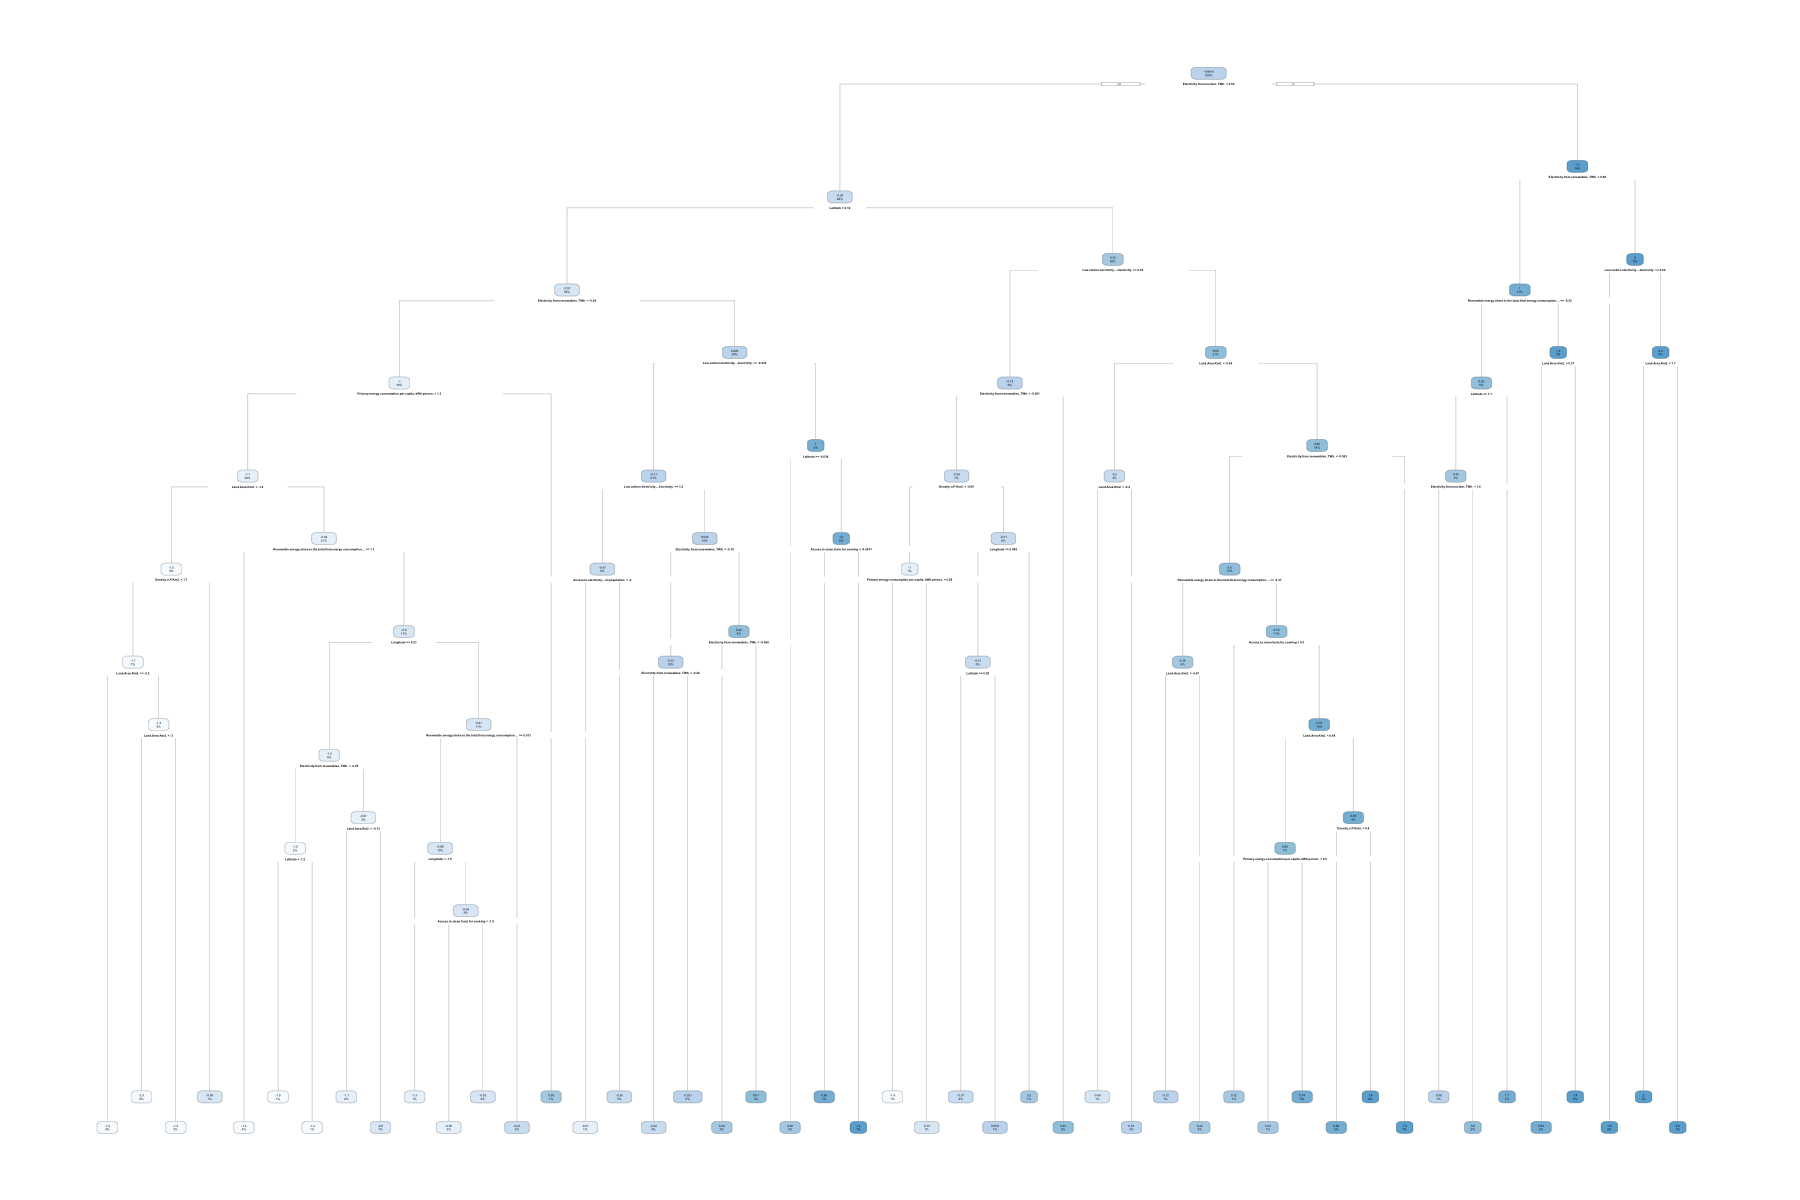

In [363]:
library(rpart.plot)
options(repr.plot.width = 15, repr.plot.height = 10)
rpart.plot(tree.reg)

L'arbre est illisible et présente trop de feuilles pour une bonne prévision (sur-apprentissage), il est nécessaire d'en réduire le nombre par élagage. Les commandes suivantes calculent les prévisions obtenues par validation croisée 10-fold pour chaque arbre élagué suivant les valeurs successives du coefficient de complexité.

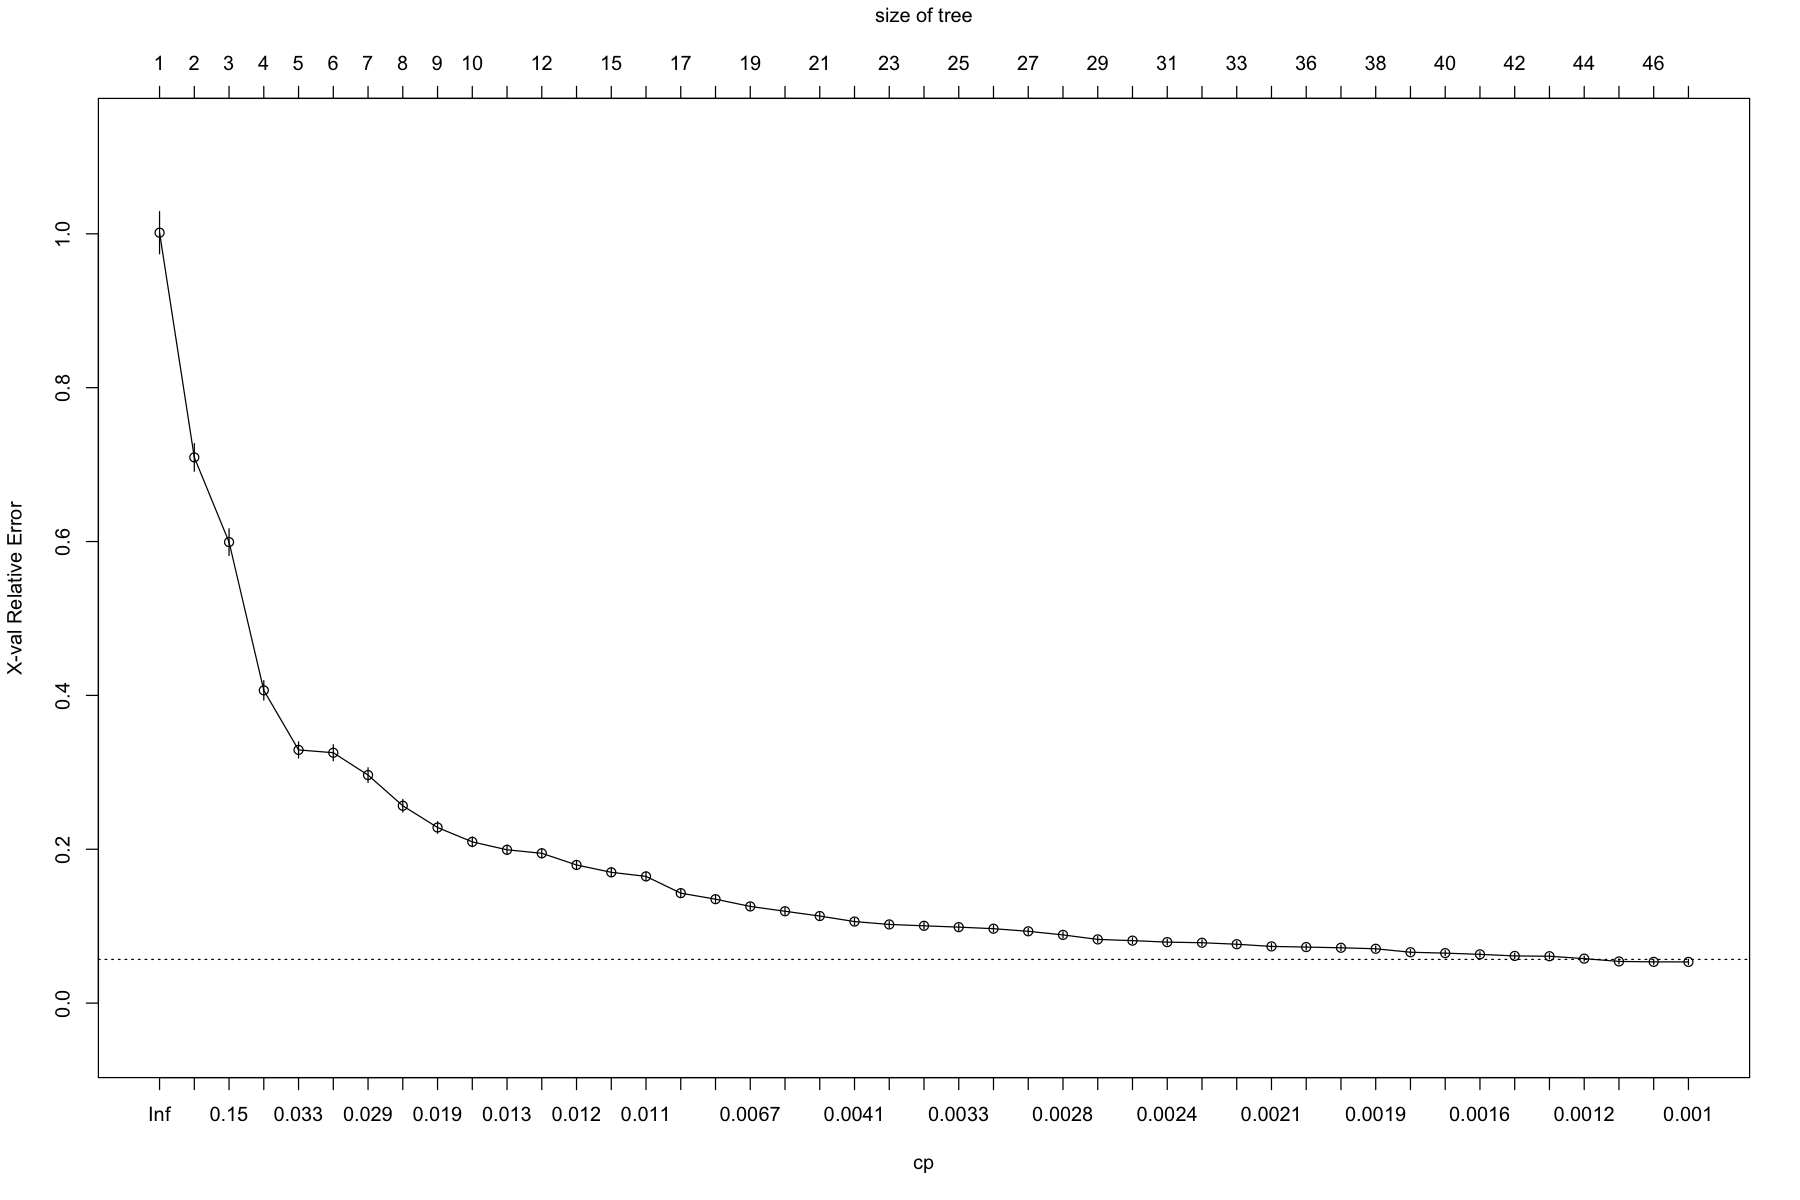

In [364]:

xmat<-xpred.rpart(tree.reg,xval=10) 
# one row for each observation and one column for each complexity value

# Cross-validation error par valeur de CP
CVerr<-apply((xmat-datappr1[,"Value_co2_emissions_kt_by_country"])^2,2,sum)

plotcp(tree.reg)

On prend la valeur de cp qui correspond à la plus petite erreur : 

[1] 0.001005442

Warning message:
“labs do not fit even at cex 0.15, there may be some overplotting”


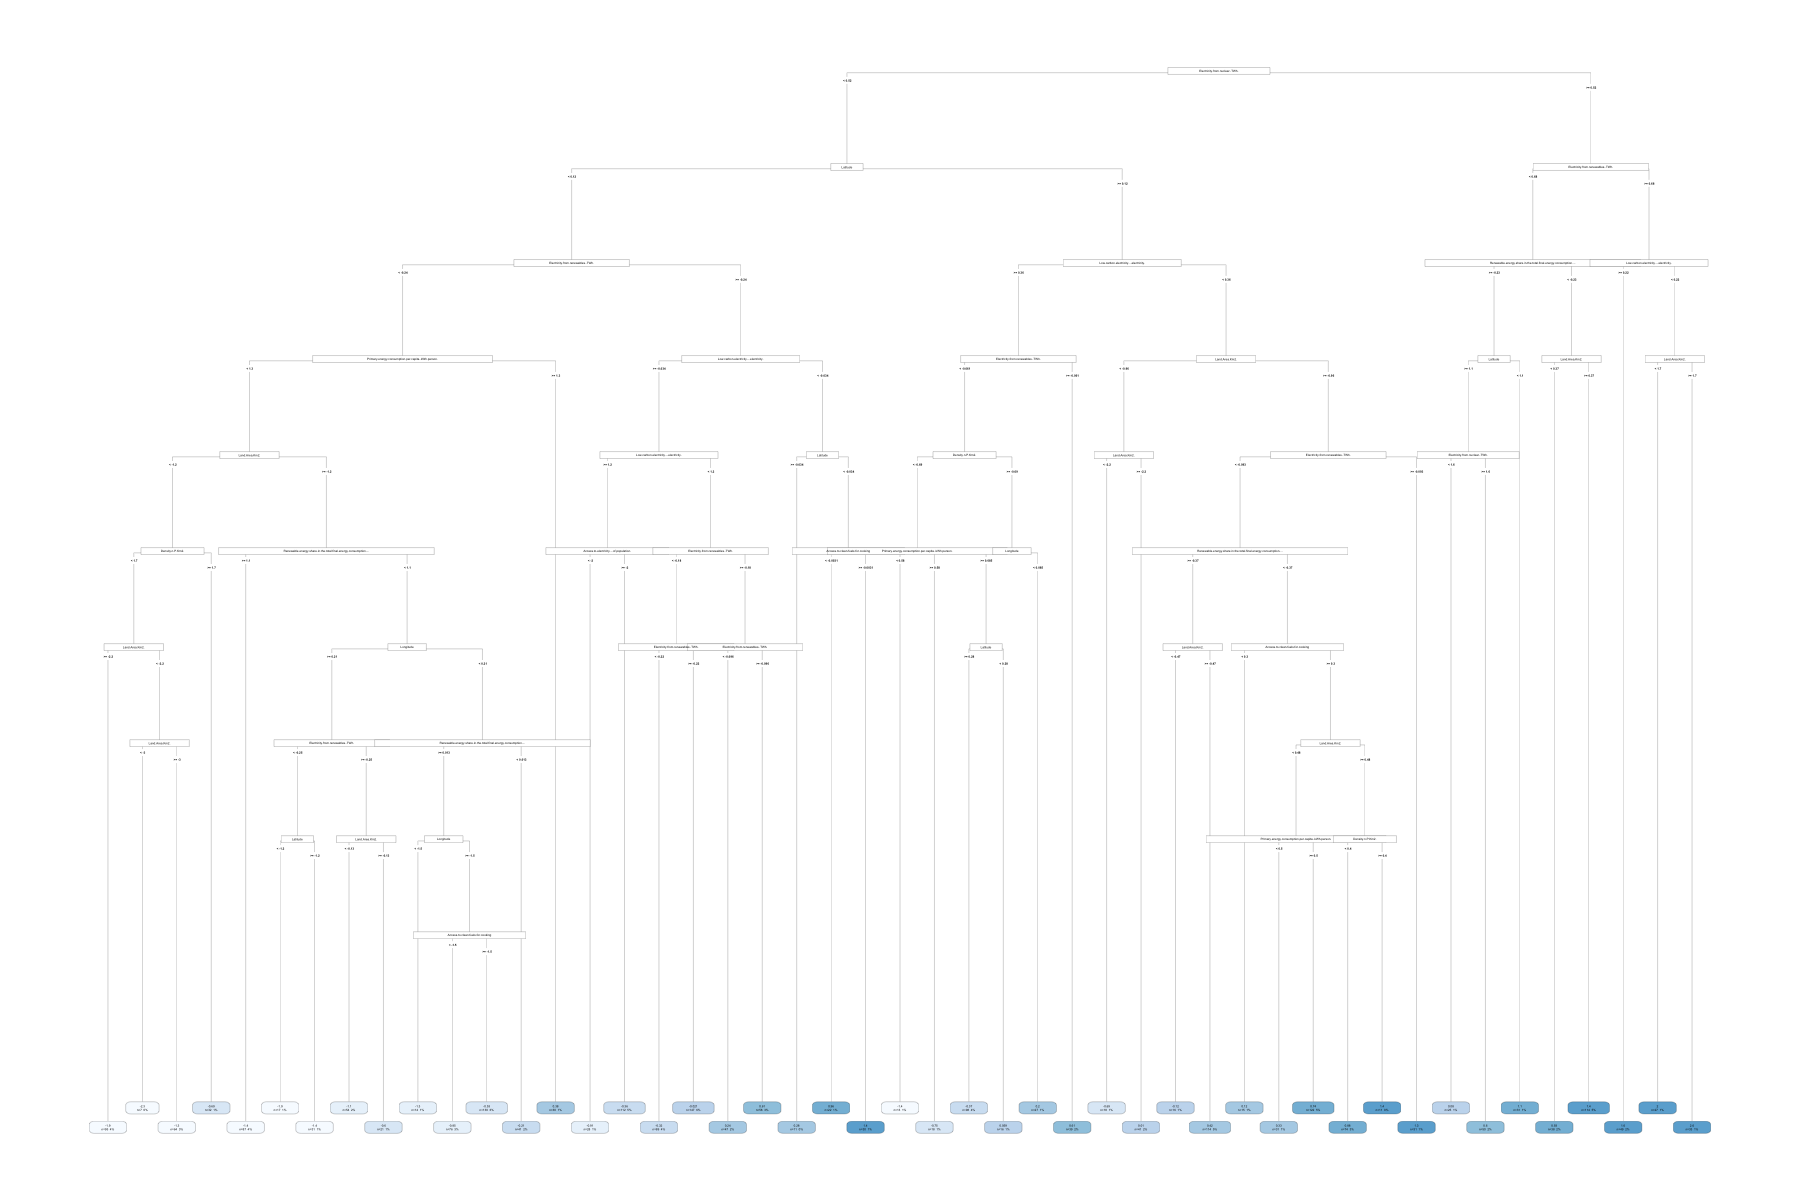

In [365]:
as.numeric(attributes(which.min(CVerr))$names)
tree.reg=rpart(Value_co2_emissions_kt_by_country~.,data=datappr1,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))
rpart.plot(tree.reg,type=5,extra=101)

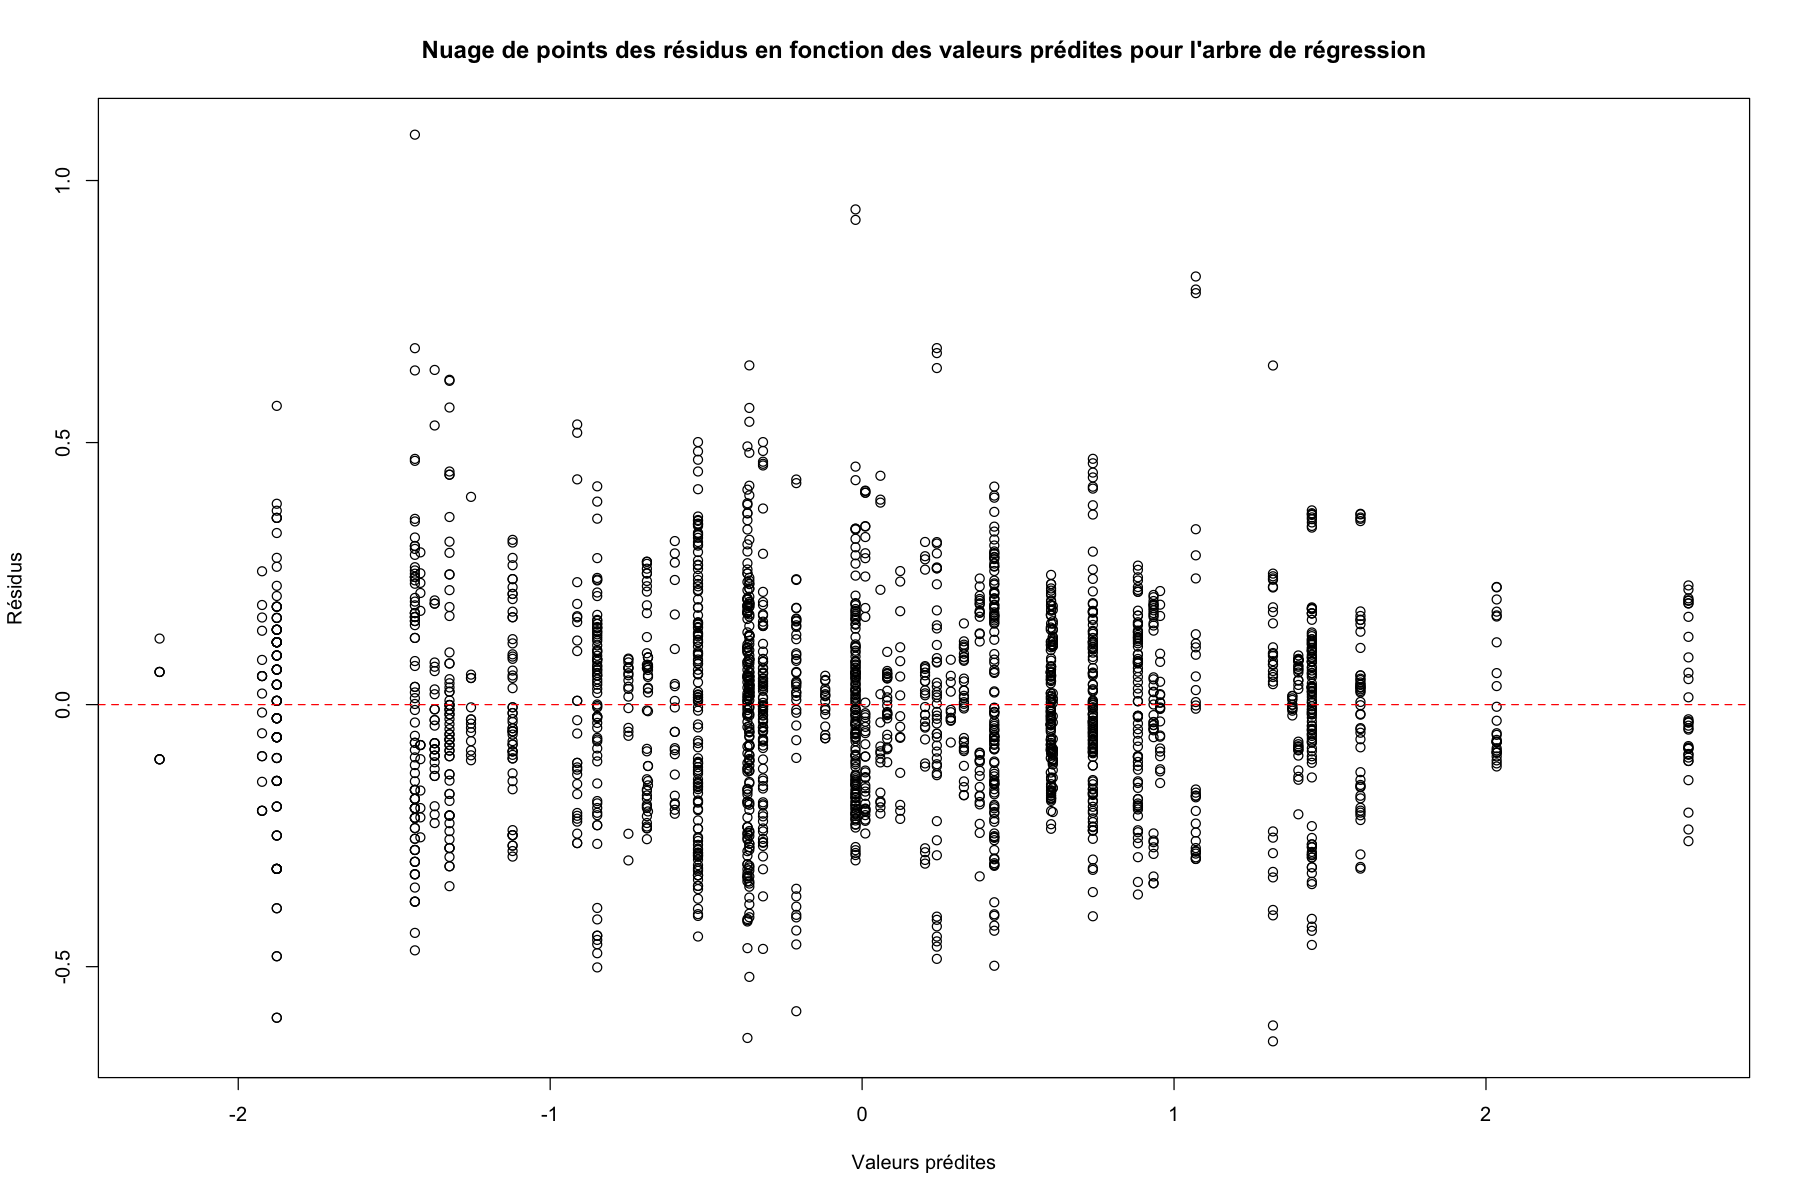

In [366]:
# Prédire les valeurs ajustées pour le nouvel arbre
fitted_values <- predict(tree.reg, type = "vector")

# Calculer les résidus
residuals <- datappr1$Value_co2_emissions_kt_by_country - fitted_values

# Tracer le graphique des résidus en fonction des valeurs prédites
plot(fitted_values, residuals,
     xlab = "Valeurs prédites", ylab = "Résidus",
     main = "Nuage de points des résidus en fonction des valeurs prédites pour l'arbre de régression")
abline(h = 0, lty = 2, col = "red")  # Ajouter la ligne y = 0 en rouge en pointillés


On regarde le MSE (mean-squared error) : 

In [367]:
# Calcul des prévisions
pred.treer=predict(tree.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision en régression
mse_tree = sum((pred.treer-datestr1[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr)
mse_tree

[1] 0.04426345

On regarde la matrice de confusion :

In [368]:
library(caret)

confusionMatrix(as.factor(pred.treer>moyenne_co2),as.factor(datestr1[,"Value_co2_emissions_kt_by_country"]>moyenne_co2))$table

          Reference
Prediction FALSE TRUE
     FALSE   269   10
     TRUE     14  281

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



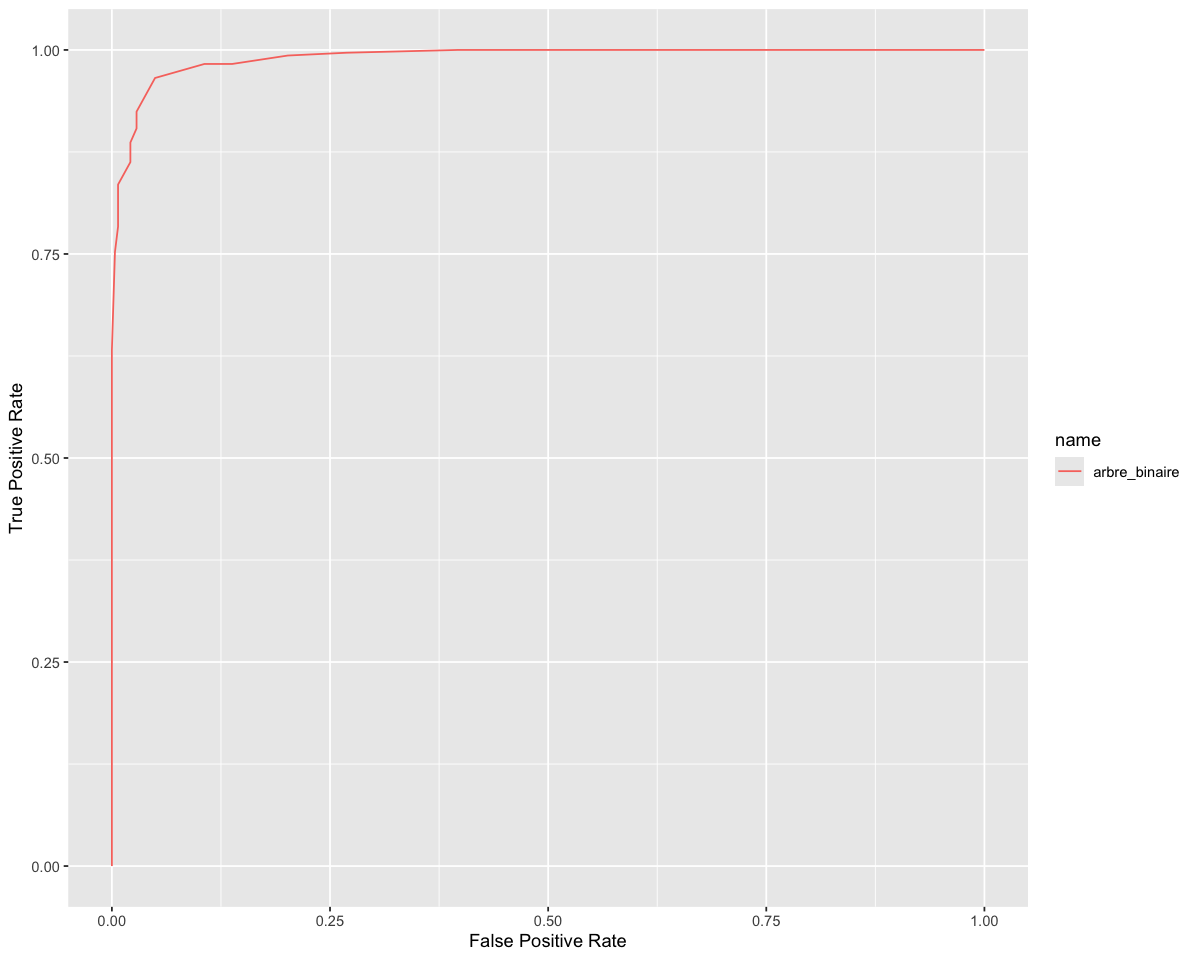

In [369]:
library(pROC)

# Supposons que pred.boostr soit la sortie de votre modèle de prédiction
# datestr["Value_co2_emissions_kt_by_country"] est la variable que vous prédisez

# Définir les prédictions binaires en fonction de la valeur moyenne du CO2
pred_binary <- pred.treer > moyenne_co2
actual_binary <- datestr[,"Value_co2_emissions_kt_by_country"] > moyenne_co2

# Créer la courbe ROC pour chaque modèle en utilisant les prédictions binaires
rocobj <- list()
rocobj$arbre_binaire <- roc(actual_binary, pred.treer)


# Tracer la courbe ROC
options(repr.plot.width = 10, repr.plot.height = 8)
ggroc(rocobj, legacy.axes = TRUE) +
  xlab("False Positive Rate") +
  ylab("True Positive Rate")


## 11. Random Forest

In [370]:
library(randomForest)

In [371]:
length(datestr1[,"Value_co2_emissions_kt_by_country"])

[1] 574

In [372]:

rf.reg=randomForest(Value_co2_emissions_kt_by_country~., data=datappr1,xtest=datestr1[,-10],ytest=datestr1[,"Value_co2_emissions_kt_by_country"],
   ntree=500,do.trace=50,importance=TRUE)
attributes(rf.reg)
rf.reg$mtry

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 | 0.006867     0.68 | 0.005111     0.54 |
 100 | 0.006144     0.61 | 0.004761     0.50 |
 150 |  0.00586     0.58 | 0.004594     0.48 |
 200 | 0.005668     0.56 | 0.004708     0.50 |
 250 | 0.005467     0.54 | 0.004664     0.49 |
 300 | 0.005438     0.54 | 0.004608     0.48 |
 350 | 0.005365     0.53 | 0.004585     0.48 |
 400 | 0.005364     0.53 | 0.004585     0.48 |
 450 | 0.005298     0.52 | 0.004601     0.48 |
 500 | 0.005241     0.52 | 0.004572     0.48 |


$names
 [1] "call"            "type"            "predicted"       "mse"            
 [5] "rsq"             "oob.times"       "importance"      "importanceSD"   
 [9] "localImportance" "proximity"       "ntree"           "mtry"           
[13] "forest"          "coefs"           "y"               "test"           
[17] "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

[1] 5

On affiche le graphe des résidus en fonction des valeurs prédites :

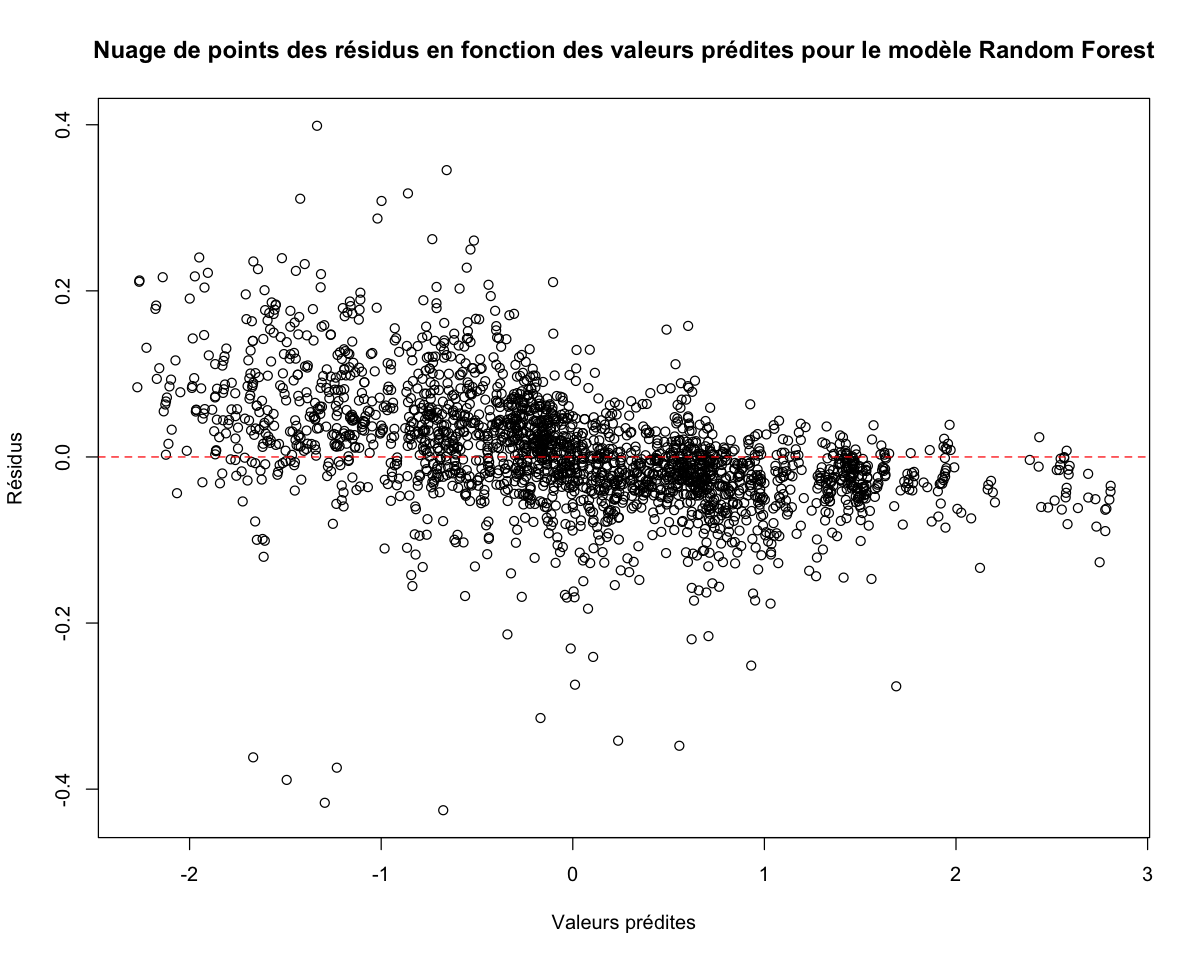

In [373]:
# Prédire les valeurs ajustées pour le modèle Random Forest
fitted_values_rf <- rf.reg$predicted

# Calculer les résidus
residuals_rf <- rf.reg$predicted - datappr1[,"Value_co2_emissions_kt_by_country"]

# Tracer le graphique des résidus en fonction des valeurs prédites
plot(fitted_values_rf, residuals_rf,
     xlab = "Valeurs prédites", ylab = "Résidus",
     main = "Nuage de points des résidus en fonction des valeurs prédites pour le modèle Random Forest")
abline(h = 0, lty = 2, col = "red")  # Ajouter la ligne y = 0 en rouge en pointillés


### 11.1 Prévision de l'échantillon test

In [374]:
# Forêts aléatoires
pred.rfr=rf.reg$test$predicted
# Erreur quadratique moyenne de prévision`
mse_rf = sum((pred.rfr-datestr1[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr1)
mse_rf

[1] 0.004571748

In [375]:
table(pred.rfr>moyenne_co2,datestr1[,"Value_co2_emissions_kt_by_country"]>moyenne_co2)

       
        FALSE TRUE
  FALSE   281    3
  TRUE      2  288

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



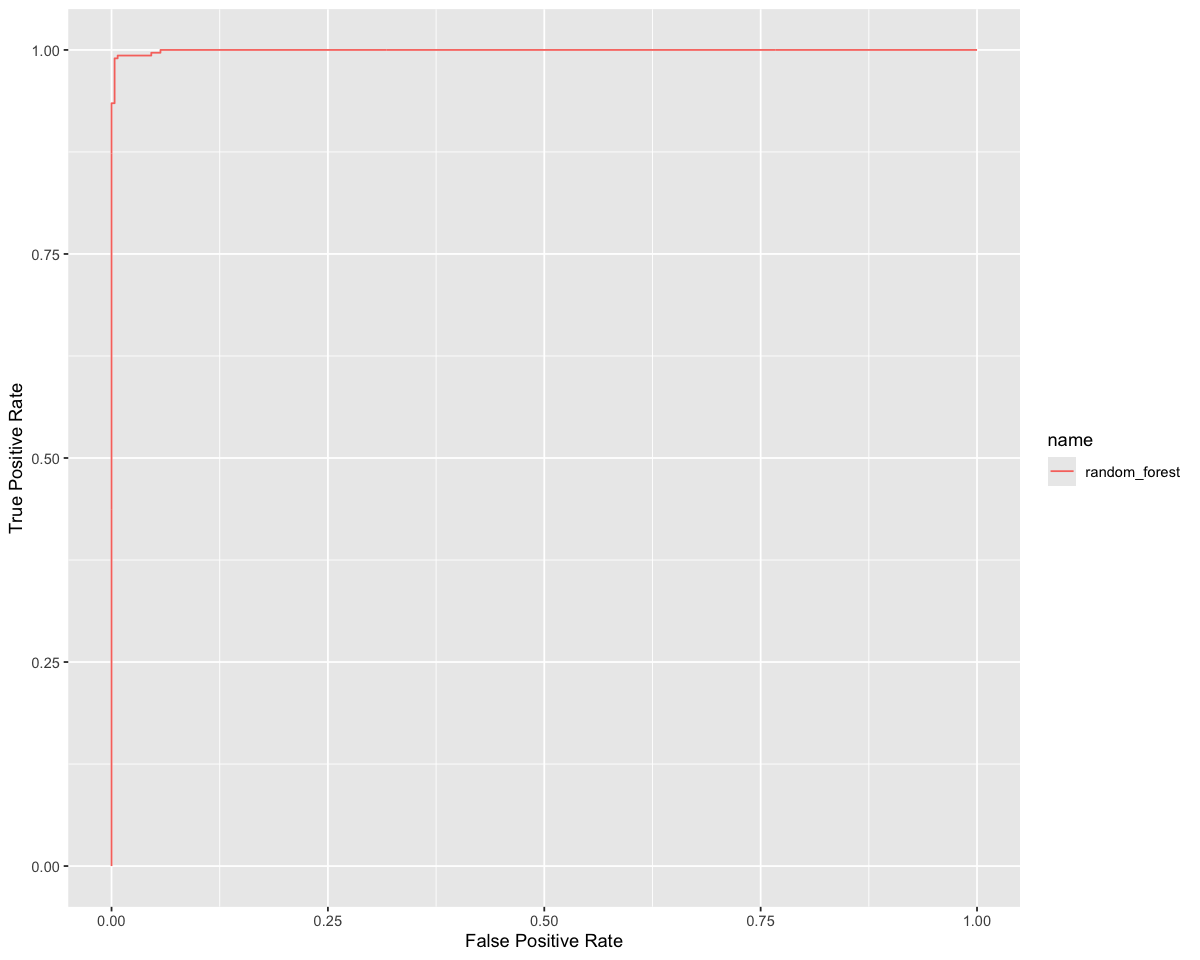

In [376]:
library(pROC)

# Supposons que pred.boostr soit la sortie de votre modèle de prédiction
# datestr["Value_co2_emissions_kt_by_country"] est la variable que vous prédisez

# Définir les prédictions binaires en fonction de la valeur moyenne du CO2
pred_binary <- pred.rfr > moyenne_co2
actual_binary <- datestr[,"Value_co2_emissions_kt_by_country"] > moyenne_co2

# Créer la courbe ROC pour chaque modèle en utilisant les prédictions binaires
rocobj <- list()
rocobj$random_forest <- roc(actual_binary, pred.rfr)


# Tracer la courbe ROC
options(repr.plot.width = 10, repr.plot.height = 8)
ggroc(rocobj, legacy.axes = TRUE) +
  xlab("False Positive Rate") +
  ylab("True Positive Rate")


## 12. Boosting

Le boosting est une technique d'apprentissage automatique qui combine plusieurs modèles d'apprentissage faibles pour créer un modèle plus puissant. Il fonctionne en entraînant itérativement des modèles sur les données, en mettant davantage l'accent sur les exemples mal classés par les modèles précédents. À chaque itération, de nouveaux modèles sont ajoutés à l'ensemble, chacun se concentrant sur les erreurs des modèles précédents. En fin de compte, les prédictions des modèles faibles sont pondérées et combinées pour former une prédiction finale. Cette approche séquentielle permet au modèle global de s'améliorer progressivement, aboutissant souvent à des performances prédictives supérieures.

In [377]:
library(gbm)

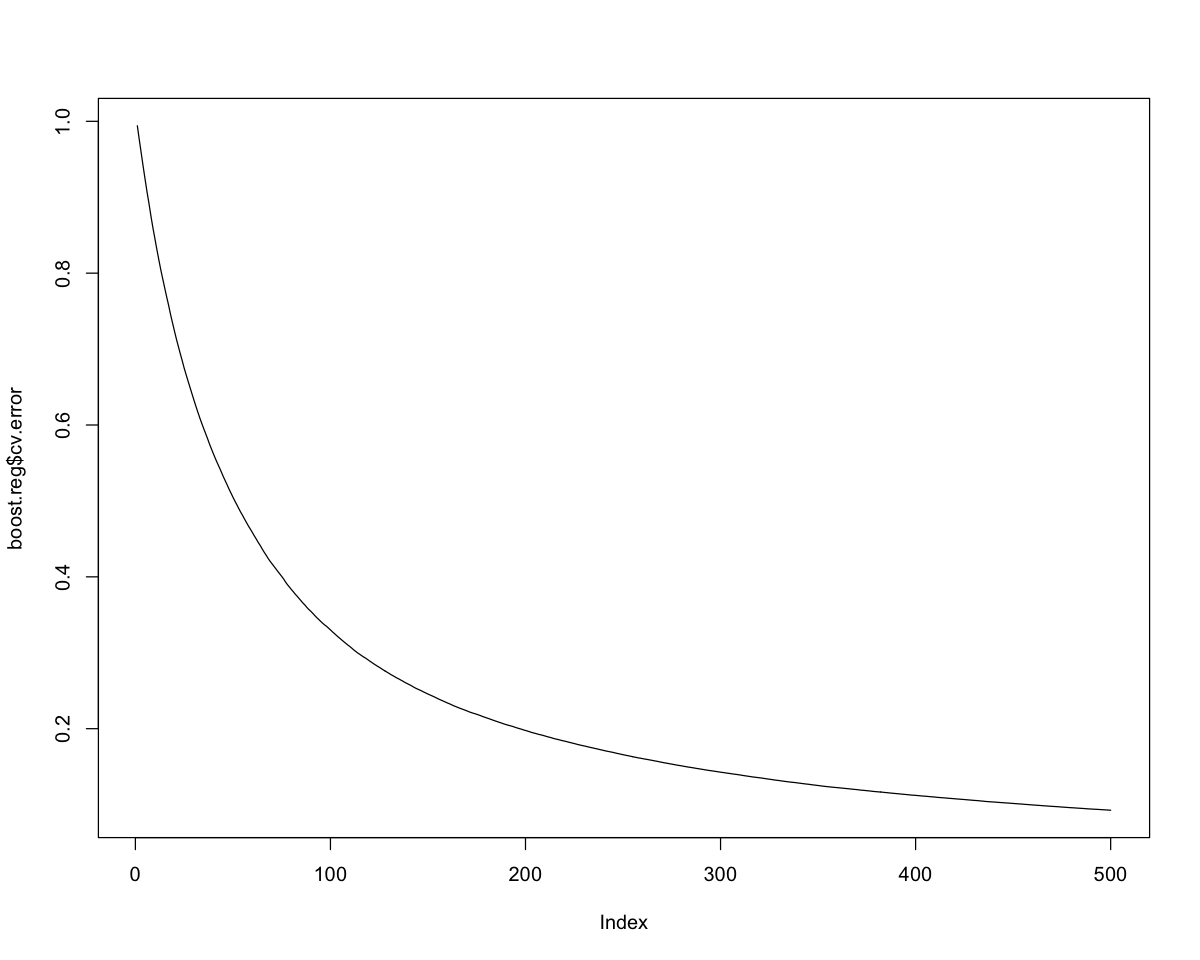

In [378]:
boost.reg = gbm(Value_co2_emissions_kt_by_country ~ ., data = datappr1, distribution = "gaussian", n.trees = 500, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.03, verbose = FALSE)
# fixer verbose à FALSE pour éviter trop de sorties
plot(boost.reg$cv.error, type = "l")

Déterminons le nombre optimal d'itérations : 

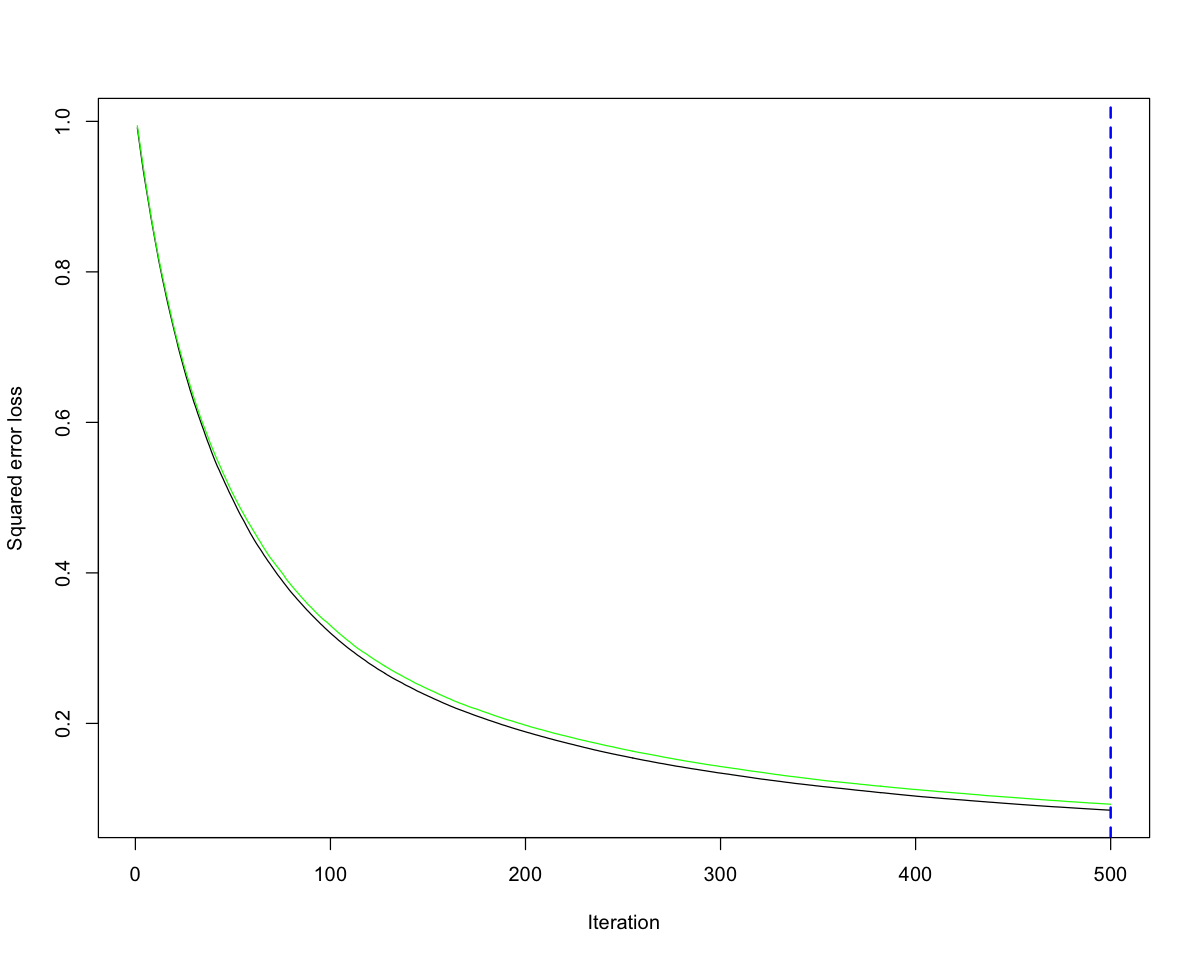

In [379]:
best.iter=gbm.perf(boost.reg,method="cv")

In [ ]:
library(caret)
library(gbm)

# Définition des contrôles pour la validation croisée
ctrl <- trainControl(method = "cv",  # Validation croisée
                     number = 10,    # Nombre de folds
                     verboseIter = TRUE)  # Afficher les résultats à chaque itération

# Grille des hyperparamètres à explorer
grid <- expand.grid(n.trees = c(100, 500, 1000),  # Nombre d'arbres
                    shrinkage = c(0.01, 0.03, 0.05),  # Taux d'apprentissage
                    interaction.depth = c(1, 3, 5),  # Profondeur d'interaction
                    n.minobsinnode = c(5, 10, 15))  # Nombre minimum d'observations par nœud

# Entraînement du modèle avec recherche des meilleurs hyperparamètres
boost_reg <- train(Value_co2_emissions_kt_by_country ~ .,  # Formule du modèle
                   data = datappr1,                        # Données d'entraînement
                   method = "gbm",                         # Méthode GBM
                   trControl = ctrl,                       # Contrôles de la validation croisée
                   tuneGrid = grid,                        # Grille des hyperparamètres à explorer
                   verbose = FALSE)                        # Désactiver les sorties verbeuses

# Affichage des résultats
#print(boost_reg)

# Tracé de l'erreur de validation croisée pour chaque combinaison d'hyperparamètres
plot(boost_reg)


+ Fold01: shrinkage=0.01, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.01, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold01: shrinkage=0.01, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.01, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold01: shrinkage=0.01, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.01, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold01: shrinkage=0.01, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.01, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold01: shrinkage=0.01, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.01, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold01: shrinkage=0.01, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.01, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold01: shrinkage=0.01, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.01, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold01: shrinkage=0.01, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.01, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold01: shrinkage=0.01, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.01, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold01: shrinkage=0.03, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.03, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold01: shrinkage=0.03, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.03, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold01: shrinkage=0.03, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.03, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold01: shrinkage=0.03, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.03, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold01: shrinkage=0.03, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.03, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold01: shrinkage=0.03, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.03, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold01: shrinkage=0.03, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.03, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold01: shrinkage=0.03, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.03, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold01: shrinkage=0.03, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.03, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold01: shrinkage=0.05, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.05, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold01: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold01: shrinkage=0.05, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.05, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold01: shrinkage=0.05, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.05, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold01: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold01: shrinkage=0.05, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.05, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold01: shrinkage=0.05, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.05, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold01: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold01: shrinkage=0.05, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold01: shrinkage=0.05, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold02: shrinkage=0.01, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.01, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold02: shrinkage=0.01, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.01, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold02: shrinkage=0.01, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.01, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold02: shrinkage=0.01, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.01, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold02: shrinkage=0.01, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.01, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold02: shrinkage=0.01, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.01, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold02: shrinkage=0.01, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.01, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold02: shrinkage=0.01, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.01, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold02: shrinkage=0.01, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.01, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold02: shrinkage=0.03, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.03, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold02: shrinkage=0.03, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.03, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold02: shrinkage=0.03, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.03, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold02: shrinkage=0.03, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.03, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold02: shrinkage=0.03, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.03, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold02: shrinkage=0.03, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.03, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold02: shrinkage=0.03, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.03, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold02: shrinkage=0.03, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.03, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold02: shrinkage=0.03, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.03, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold02: shrinkage=0.05, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.05, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold02: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold02: shrinkage=0.05, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.05, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold02: shrinkage=0.05, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.05, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold02: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold02: shrinkage=0.05, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.05, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold02: shrinkage=0.05, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.05, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold02: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold02: shrinkage=0.05, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold02: shrinkage=0.05, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold03: shrinkage=0.01, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.01, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold03: shrinkage=0.01, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.01, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold03: shrinkage=0.01, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.01, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold03: shrinkage=0.01, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.01, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold03: shrinkage=0.01, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.01, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold03: shrinkage=0.01, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.01, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold03: shrinkage=0.01, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.01, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold03: shrinkage=0.01, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.01, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold03: shrinkage=0.01, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.01, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold03: shrinkage=0.03, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.03, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold03: shrinkage=0.03, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.03, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold03: shrinkage=0.03, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.03, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold03: shrinkage=0.03, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.03, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold03: shrinkage=0.03, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.03, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold03: shrinkage=0.03, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.03, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold03: shrinkage=0.03, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.03, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold03: shrinkage=0.03, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.03, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold03: shrinkage=0.03, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.03, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold03: shrinkage=0.05, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.05, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold03: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold03: shrinkage=0.05, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.05, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold03: shrinkage=0.05, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.05, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold03: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold03: shrinkage=0.05, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.05, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold03: shrinkage=0.05, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.05, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold03: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold03: shrinkage=0.05, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold03: shrinkage=0.05, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold04: shrinkage=0.01, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.01, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold04: shrinkage=0.01, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.01, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold04: shrinkage=0.01, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.01, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold04: shrinkage=0.01, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.01, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold04: shrinkage=0.01, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.01, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold04: shrinkage=0.01, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.01, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold04: shrinkage=0.01, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.01, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold04: shrinkage=0.01, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.01, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold04: shrinkage=0.01, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.01, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold04: shrinkage=0.03, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.03, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold04: shrinkage=0.03, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.03, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold04: shrinkage=0.03, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.03, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold04: shrinkage=0.03, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.03, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold04: shrinkage=0.03, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.03, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold04: shrinkage=0.03, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.03, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold04: shrinkage=0.03, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.03, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold04: shrinkage=0.03, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.03, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold04: shrinkage=0.03, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.03, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold04: shrinkage=0.05, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.05, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold04: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold04: shrinkage=0.05, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.05, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold04: shrinkage=0.05, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.05, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold04: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold04: shrinkage=0.05, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.05, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold04: shrinkage=0.05, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.05, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold04: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold04: shrinkage=0.05, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold04: shrinkage=0.05, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold05: shrinkage=0.01, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.01, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold05: shrinkage=0.01, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.01, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold05: shrinkage=0.01, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.01, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold05: shrinkage=0.01, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.01, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold05: shrinkage=0.01, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.01, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold05: shrinkage=0.01, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.01, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold05: shrinkage=0.01, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.01, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold05: shrinkage=0.01, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.01, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold05: shrinkage=0.01, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.01, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold05: shrinkage=0.03, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.03, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold05: shrinkage=0.03, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.03, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold05: shrinkage=0.03, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.03, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold05: shrinkage=0.03, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.03, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold05: shrinkage=0.03, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.03, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold05: shrinkage=0.03, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.03, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold05: shrinkage=0.03, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.03, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold05: shrinkage=0.03, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.03, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold05: shrinkage=0.03, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.03, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold05: shrinkage=0.05, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.05, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold05: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold05: shrinkage=0.05, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.05, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold05: shrinkage=0.05, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.05, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold05: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold05: shrinkage=0.05, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.05, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold05: shrinkage=0.05, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.05, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold05: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold05: shrinkage=0.05, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold05: shrinkage=0.05, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold06: shrinkage=0.01, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.01, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold06: shrinkage=0.01, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.01, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold06: shrinkage=0.01, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.01, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold06: shrinkage=0.01, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.01, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold06: shrinkage=0.01, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.01, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold06: shrinkage=0.01, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.01, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold06: shrinkage=0.01, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.01, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold06: shrinkage=0.01, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.01, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold06: shrinkage=0.01, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.01, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold06: shrinkage=0.03, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.03, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold06: shrinkage=0.03, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.03, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold06: shrinkage=0.03, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.03, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold06: shrinkage=0.03, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.03, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold06: shrinkage=0.03, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.03, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold06: shrinkage=0.03, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.03, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold06: shrinkage=0.03, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.03, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold06: shrinkage=0.03, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.03, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold06: shrinkage=0.03, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.03, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold06: shrinkage=0.05, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.05, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold06: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold06: shrinkage=0.05, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.05, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold06: shrinkage=0.05, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.05, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold06: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold06: shrinkage=0.05, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.05, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold06: shrinkage=0.05, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.05, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold06: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold06: shrinkage=0.05, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold06: shrinkage=0.05, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold07: shrinkage=0.01, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.01, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold07: shrinkage=0.01, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.01, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold07: shrinkage=0.01, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.01, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold07: shrinkage=0.01, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.01, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold07: shrinkage=0.01, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.01, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold07: shrinkage=0.01, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.01, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold07: shrinkage=0.01, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.01, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold07: shrinkage=0.01, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.01, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold07: shrinkage=0.01, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.01, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold07: shrinkage=0.03, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.03, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold07: shrinkage=0.03, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.03, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold07: shrinkage=0.03, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.03, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold07: shrinkage=0.03, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.03, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold07: shrinkage=0.03, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.03, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold07: shrinkage=0.03, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.03, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold07: shrinkage=0.03, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.03, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold07: shrinkage=0.03, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.03, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold07: shrinkage=0.03, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.03, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold07: shrinkage=0.05, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.05, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold07: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold07: shrinkage=0.05, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.05, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold07: shrinkage=0.05, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.05, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold07: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold07: shrinkage=0.05, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.05, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold07: shrinkage=0.05, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.05, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold07: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold07: shrinkage=0.05, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold07: shrinkage=0.05, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold08: shrinkage=0.01, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.01, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold08: shrinkage=0.01, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.01, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold08: shrinkage=0.01, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.01, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold08: shrinkage=0.01, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.01, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold08: shrinkage=0.01, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.01, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold08: shrinkage=0.01, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.01, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold08: shrinkage=0.01, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.01, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold08: shrinkage=0.01, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.01, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold08: shrinkage=0.01, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.01, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold08: shrinkage=0.03, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.03, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold08: shrinkage=0.03, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.03, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold08: shrinkage=0.03, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.03, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold08: shrinkage=0.03, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.03, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold08: shrinkage=0.03, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.03, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold08: shrinkage=0.03, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.03, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold08: shrinkage=0.03, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.03, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold08: shrinkage=0.03, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.03, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold08: shrinkage=0.03, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.03, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold08: shrinkage=0.05, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.05, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold08: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.05, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold08: shrinkage=0.05, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.05, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold08: shrinkage=0.05, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.05, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold08: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.05, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold08: shrinkage=0.05, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.05, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold08: shrinkage=0.05, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.05, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold08: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.05, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold08: shrinkage=0.05, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold08: shrinkage=0.05, interaction.depth=5, n.minobsinnode=15, n.trees=1000 
+ Fold09: shrinkage=0.01, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold09: shrinkage=0.01, interaction.depth=1, n.minobsinnode= 5, n.trees=1000 
+ Fold09: shrinkage=0.01, interaction.depth=1, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold09: shrinkage=0.01, interaction.depth=1, n.minobsinnode=10, n.trees=1000 
+ Fold09: shrinkage=0.01, interaction.depth=1, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold09: shrinkage=0.01, interaction.depth=1, n.minobsinnode=15, n.trees=1000 
+ Fold09: shrinkage=0.01, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold09: shrinkage=0.01, interaction.depth=3, n.minobsinnode= 5, n.trees=1000 
+ Fold09: shrinkage=0.01, interaction.depth=3, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold09: shrinkage=0.01, interaction.depth=3, n.minobsinnode=10, n.trees=1000 
+ Fold09: shrinkage=0.01, interaction.depth=3, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold09: shrinkage=0.01, interaction.depth=3, n.minobsinnode=15, n.trees=1000 
+ Fold09: shrinkage=0.01, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold09: shrinkage=0.01, interaction.depth=5, n.minobsinnode= 5, n.trees=1000 
+ Fold09: shrinkage=0.01, interaction.depth=5, n.minobsinnode=10, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


- Fold09: shrinkage=0.01, interaction.depth=5, n.minobsinnode=10, n.trees=1000 
+ Fold09: shrinkage=0.01, interaction.depth=5, n.minobsinnode=15, n.trees=1000 


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”


In [ ]:
print(boost_reg$bestTune)

Traçon le graphe des résidus en fonction des valeurs prédites : 

In [ ]:
fit.boostr=boost.reg$fit
res.boostr=fit.boostr-datappr1[,"Value_co2_emissions_kt_by_country"]


plot(fit.boostr, res.boostr,
     xlab = "Valeurs prédites", ylab = "Résidus",
     main = "Nuage de points des résidus en fonction des valeurs prédites pour le modèle Random Forest")
abline(h = 0, lty = 2, col = "red")  # Ajouter la ligne y = 0 en rouge en pointillés

### 11.2 Prévision de l'échantillon test

On peut regarder le MSE : 

In [ ]:
 pred.boostr=predict(boost.reg,newdata=datestr1,n.trees=best.iter)
# Erreur quadratique moyenne de prévision
mse_boost = sum((pred.boostr-datestr1[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr1)
mse_boost

Regardons la matrice de confusion :

In [ ]:
table(pred.boostr>moyenne_co2,datestr[,"Value_co2_emissions_kt_by_country"]>moyenne_co2)

In [ ]:
library(pROC)

# Supposons que pred.boostr soit la sortie de votre modèle de prédiction
# datestr["Value_co2_emissions_kt_by_country"] est la variable que vous prédisez

# Définir les prédictions binaires en fonction de la valeur moyenne du CO2
pred_binary <- pred.boostr > moyenne_co2
actual_binary <- datestr[,"Value_co2_emissions_kt_by_country"] > moyenne_co2

# Créer la courbe ROC pour chaque modèle en utilisant les prédictions binaires
rocobj <- list()
rocobj$boosting <- roc(actual_binary, pred.boostr)


# Tracer la courbe ROC
options(repr.plot.width = 10, repr.plot.height = 8)
ggroc(rocobj, legacy.axes = TRUE) +
  xlab("False Positive Rate") +
  ylab("True Positive Rate")




## 12. Réseau de neurones

Les réseaux de neurones sont des modèles d'apprentissage automatique inspirés du fonctionnement du cerveau humain. Ils sont composés de couches de neurones interconnectés, chaque neurone étant une unité de calcul qui traite l'information et passe ses résultats à la couche suivante. L'apprentissage se produit par l'ajustement des poids des connexions entre les neurones, ce qui permet au réseau de capturer des modèles complexes dans les données. Grâce à des algorithmes d'optimisation tels que la rétropropagation du gradient, le réseau de neurones est entraîné à minimiser une fonction de perte, ce qui améliore ses performances prédictives au fil du temps. Les réseaux de neurones sont utilisés dans une variété de tâches, allant de la classification d'images à la prédiction de séries temporelles, en passant par la traduction automatique.

In [ ]:
library(MASS)
library(nnet)

In [2]:
datappr1 <- datappr[, !(names(datappr) %in% c("Entity", "Electricity.from.fossil.fuels..TWh.","Year"))]


datestr1 <- datestr[, !(names(datappr) %in% c("Entity", "Electricity.from.fossil.fuels..TWh.","Year"))]


head(datappr1)

ERROR: Error in eval(expr, envir, enclos): objet 'datappr' introuvable


In [ ]:
nnet.reg=nnet(Value_co2_emissions_kt_by_country~.,data=datappr1,size=2,decay=2,linout=TRUE,maxit=500) 
summary(nnet.reg)

Nous allons optimiser le paramètre "decay" (le taux de régularisation) par validation croisée : 

In [ ]:
library(e1071)
#nnettune = tune.nnet(Value_co2_emissions_kt_by_country~.,data=datappr1,size=c(1,2,3,4),decay=c(0.3,2,4,5),maxit=200,linout=TRUE)
#plot(nnettune)

#nnettune$best.parameters

In [29]:
library(nnet)

# Définition des paramètres à optimiser
param_grid <- expand.grid(size = c(1, 2, 3, 4, 5), decay = c(0.1, 0.2, 0.5, 1, 2))

# Fonction pour évaluer les performances du modèle avec les hyperparamètres donnés
evaluate_model <- function(size, decay) {
  model <- nnet(Value_co2_emissions_kt_by_country ~ ., data = datappr1, size = size, decay = decay, linout = TRUE, maxit = 500)
  return(list(model = model, summary = summary(model)))
}

# Évaluation des performances pour chaque combinaison d'hyperparamètres
results <- lapply(1:nrow(param_grid), function(i) {
  evaluate_model(param_grid$size[i], param_grid$decay[i])
})

# Sélection du modèle avec les meilleures performances
best_model_index <- which.max(sapply(results, function(x) x$model$dev))
best_model <- results[[best_model_index]]
best_summary <- best_model$summary

# Affichage du meilleur modèle et de son résumé
print(best_model$model)
print(best_summary)


# weights:  37
initial  value 3229.901045 
iter  10 value 1375.471518
iter  20 value 750.987915
iter  30 value 456.196427
iter  40 value 423.130077
iter  50 value 350.260256
iter  60 value 282.505345
iter  70 value 270.737934
iter  80 value 270.085401
iter  90 value 269.763650
iter 100 value 269.585544
iter 110 value 269.557899
iter 110 value 269.557896
iter 120 value 269.557755
final  value 269.557739 
converged
# weights:  73
initial  value 2531.907311 
iter  10 value 1041.865900
iter  20 value 611.929631
iter  30 value 461.843759
iter  40 value 327.479531
iter  50 value 230.777821
iter  60 value 180.931166
iter  70 value 161.741327
iter  80 value 136.437618
iter  90 value 117.449306
iter 100 value 106.074805
iter 110 value 102.047893
iter 120 value 99.342254
iter 130 value 96.148293
iter 140 value 94.975647
iter 150 value 94.323684
iter 160 value 93.655694
iter 170 value 93.335044
iter 180 value 92.829560
iter 190 value 92.191444
iter 200 value 91.700125
iter 210 value 91.308587
ite

ERROR: Error in which.max(sapply(results, function(x) x$model$dev)): l'objet 'list' ne peut être converti automatiquement en un type 'double'


In [30]:
print(nnet_reg$bestTune)

ERROR: Error in h(simpleError(msg, call)): erreur d'ï¿½valuation de l'argument 'x' lors de la sï¿½lection d'une mï¿½thode pour la fonction 'print' : objet 'nnet_reg' introuvable


Nous pouvons tracer le graphe des résidus en fonction des valeurs prédites :

In [ ]:
#nnet.reg=nnet(Value_co2_emissions_kt_by_country~.,data=datappr1,size=3,decay=4,linout=TRUE,maxit=500) 

In [ ]:
fit.nnetr=predict(nnet.reg,data=datappr1)
res.nnetr=fit.nnetr-datappr1[,"Value_co2_emissions_kt_by_country"]

plot(fit.nnetr, res.nnetr,
     xlab = "Valeurs prédites", ylab = "Résidus",
     main = "Nuage de points des résidus en fonction des valeurs prédites pour le modèle Random Forest")
abline(h = 0, lty = 2, col = "red")  # Ajouter la ligne y = 0 en rouge en pointillés

### 12.1 Prévision de l'échantillon test

On peut calculer le MSE : 

In [ ]:
# Calcul des prévisions
pred.nnetr=predict(nnet.reg,newdata=datestr1)

# Erreur quadratique moyenne de prévision
mse_nn = sum((pred.nnetr-datestr1[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr1)
mse_nn

On peut aussi observer la matrice de confusion:

In [ ]:
table(pred.nnetr>moyenne_co2,datestr[,"Value_co2_emissions_kt_by_country"]>moyenne_co2)

## 13. Comparaison des méthodes

On affiche la courbe ROC : 

In [ ]:
library(pROC)

# Supposons que pred.boostr soit la sortie de votre modèle de prédiction
# datestr["Value_co2_emissions_kt_by_country"] est la variable que vous prédisez

# Définir les prédictions binaires en fonction de la valeur moyenne du CO2
pred_binary <- pred.boostr > moyenne_co2
actual_binary <- datestr[,"Value_co2_emissions_kt_by_country"] > moyenne_co2

pred_binary <- pred.treer > moyenne_co2
pred_binary <- pred.svmr > moyenne_co2
pred_binary <- pred.rfr > moyenne_co2
pred_binary <- pred.boostr > moyenne_co2
pred_binary <- pred.nnetr > moyenne_co2
pred_binary_sans <- as.numeric(pred.glm_sans_selection > moyenne_co2)
pred_binary_avec <- as.numeric(pred.glm_avec_selection > moyenne_co2)
pred_binary_lasso_min <- as.numeric(pred.glm_lasso_min > moyenne_co2)

# Créer la courbe ROC pour chaque modèle en utilisant les prédictions binaires
rocobj <- list()
rocobj$boosting <- roc(actual_binary, pred.boostr)
rocobj$arbre_binaire <- roc(actual_binary, pred.treer)
rocobj$svm <- roc(actual_binary, pred.svmr)
rocobj$random_forest <- roc(actual_binary, pred.rfr)
rocobj$neural_network <- roc(actual_binary, pred.nnetr)
rocobj$sans_selection <- roc(actual_binary, pred.glm_sans_selection)
rocobj$avec_selection <- roc(actual_binary, pred.glm_avec_selection)
rocobj$lasso_min <- roc(actual_binary, pred.glm_lasso_min)



# Tracer la courbe ROC
options(repr.plot.width = 10, repr.plot.height = 8)
ggroc(rocobj, legacy.axes = TRUE) +
  xlab("False Positive Rate") +
  ylab("True Positive Rate")


Comparaison des MSE : 

In [ ]:
all_mse <- c(mse_lin, mse_bic, mse_lasso, mse_svm, mse_boost, mse_tree, mse_rf, mse_nn)

# Données des MSE
mse_values <- c(mse_lin, mse_bic, mse_lasso, mse_svm, mse_boost, mse_tree, mse_rf, mse_nn)

# Noms des méthodes
method_names <- c("Linear", "BIC", "LASSO", "SVM", "Boost", "Tree", "RF", "NN")

# Création de l'histogramme
barplot(mse_values, 
        names.arg = method_names,
        main="Histogramme des MSE par méthode",
        xlab="Méthode",
        ylab="MSE",
        col="lightblue",
        border="black",
        ylim=c(0, max(mse_values)+0.05),
        las=2  # Tournez les étiquettes de l'axe x de 90 degrés
)

# Ajouter les valeurs sur les barres
#text(x = barplot(mse_values) + 0.25, y = mse_values, labels = mse_values, cex=0.7, col="black", pos=3)
